In [1]:
import os
import json 

from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem import rdMolDescriptors as rdMD
from rdkit.Chem.Draw import MolToImage
from urllib.request import urlopen, Request

from Bio import SeqIO
from io import StringIO

from PyBioMed import Pymolecule
from PyBioMed.PyGetMol import Getmol
from pubchempy import get_compounds
from PyBioMed.PyInteraction.PyInteraction import CalculateInteraction2
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PyBioMed.PyMolecule import moe
from PyBioMed.PyMolecule import connectivity, topology
from PyBioMed.PyMolecule.cats2d import CATS2D  # Correct import for CATS2D descriptor
from PyBioMed import PyProtein
from PyBioMed.PyProtein import AAComposition, CTD
from PyBioMed.PyGetMol.Getmol import ReadMolFromSmile

from IPython.display import display

from rich.console import Console

from PyBioMed import PyMolecule # See if PyMolecule has classes/functions you need
# Initialize the rich console for colored output
console = Console()


# Example Drugank SMILES list

In [4]:

dbids = ["DB00787", "DB01004", "DB00199", "DB00684", "DB00440", "DB01165", "DB00537", "DB00768"]
smiles_dict = {}

for dbid in dbids:
    print(f"Processing {dbid}")
    try:
        # Search by name or DrugBank ID
        compound = get_compounds(dbid, "name")
        if compound:
            smiles_dict[dbid] = compound[0].isomeric_smiles
        else:
            smiles_dict[dbid] = "Error: Compound not found in PubChem"
    except Exception as e:
        smiles_dict[dbid] = f"Error: {e}"

print("\nFinal SMILES Dictionary:")
print(smiles_dict)


Processing DB00787
Processing DB01004
Processing DB00199
Processing DB00684
Processing DB00440
Processing DB01165
Processing DB00537
Processing DB00768

Final SMILES Dictionary:
{'DB00787': 'C1=NC2=C(N1COCCO)N=C(NC2=O)N', 'DB01004': 'C1=NC2=C(N1COC(CO)CO)N=C(NC2=O)N', 'DB00199': 'CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O', 'DB00684': 'C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1N)O[C@@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O)N)O)O)O[C@@H]3[C@@H](C[C@@H]([C@H](O3)CN)O)N)N', 'DB00440': 'COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N', 'DB01165': 'CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O', 'DB00537': 'C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O', 'DB00768': 'CN(C)CC/C=C\\1/C2=CC=CC=C2COC3=C1C=C(C=C3)CC(=O)O'}


# Script for Processing Molecular Descriptors

========================================

Processing drug with Drug bank ID: DB00787

Drug in SMILES format: C1=NC2=C(N1COCCO)N=C(NC2=O)N

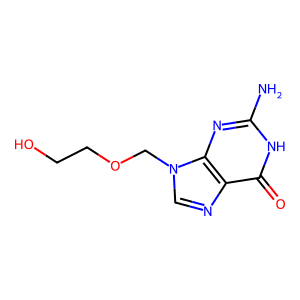

Connectivity Descriptors:
{'Chi0': 11.544, 'Chi1': 7.72, 'mChi1': 0.454, 'Chi2': 6.715, 'Chi3': 5.384, 'Chi4': 4.643, 'Chi5': 3.437, 'Chi6': 
2.604, 'Chi7': 1.716, 'Chi8': 1.102, 'Chi9': 0.647, 'Chi10': 0.296, 'Chi3c': 0.963, 'Chi4c': 0.004, 'Chi4pc': 
0.004, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.096, 'Chi6ch': 0.056, 'knotp': 0.959, 'Chiv0': 8.381, 'Chiv1': 
4.613, 'Chiv2': 3.099, 'Chiv3': 1.959, 'Chiv4': 1.293, 'Chiv5': 0.786, 'Chiv6': 0.44, 'Chiv7': 0.233, 'Chiv8': 
0.12, 'Chiv9': 0.051, 'Chiv10': 0.019, 'dchi0': 3.162, 'dchi1': 3.106, 'dchi2': 3.616, 'dchi3': 3.425, 'dchi4': 
3.351, 'Chiv3c': 0.313, 'Chiv4c': 0.0, 'Chiv4pc': 0.573, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.029, 
'Chiv6ch': 0.014, 'knotpv': 0.26}

Topology Descriptors:
{'W': 453.0, 'AW': 3.775, 'J': 1.869, 'Tigdi': 3.321, 'Xu': 16.105, 'GMTI': 3.257, 'Pol': 22.0, 'DZ': 37.5, 'Ipc': 
3.77, 'BertzCT': 2.737, 'Thara': 46.951, 'Tsch': 1899.0, 'ZM1': 80, 'ZM2': 93, 'MZM1': 5.556, 'MZM2': 0.954, 
'Qindex': 11.0, 'Platt': 46, 'diametert': 9.0, 'radiust': 5.0, 'petitjeant': 0.444, 'Sito': 4.794, 'Hato': 1.846, 
'Geto': 1.993, 'Arto': 2.125, 'GMTIV': 3.852, 'IDET': 288.387, 'IDE': 3.061, 'ISIZ': 128.382, 'IVDE': 23.635, 
'TIAC': 49.964, 'Gravto': 47.303, 'Hatov': 3.516, 'Sitov': 21.229, 'Getov': 3.769}

CATS2D Descriptors:
{'CATS_DD0': 0.5, 'CATS_DD1': 0.0, 'CATS_DD2': 0.167, 'CATS_DD3': 0.0, 'CATS_DD4': 0.0, 'CATS_DD5': 0.0, 
'CATS_DD6': 0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.333, 'CATS_DA0': 0.056, 'CATS_DA1': 0.0, 
'CATS_DA2': 0.167, 'CATS_DA3': 0.111, 'CATS_DA4': 0.167, 'CATS_DA5': 0.111, 'CATS_DA6': 0.111, 'CATS_DA7': 0.111, 
'CATS_DA8': 0.0, 'CATS_DA9': 0.167, 'CATS_DP0': 0.333, 'CATS_DP1': 0.0, 'CATS_DP2': 0.333, 'CATS_DP3': 0.0, 
'CATS_DP4': 0.0, 'CATS_DP5': 0.0, 'CATS_DP6': 0.0, 'CATS_DP7': 0.0, 'CATS_DP8': 0.0, 'CATS_DP9': 0.333, 'CATS_DN0':
0, 'CATS_DN1': 0, 'CATS_DN2': 0, 'CATS_DN3': 0, 'CATS_DN4': 0, 'CATS_DN5': 0, 'CATS_DN6': 0, 'CATS_DN7': 0, 
'CATS_DN8': 0, 'CATS_DN9': 0, 'CATS_DL0': 0, 'CATS_DL1': 0, 'CATS_DL2': 0, 'CATS_DL3': 0, 'CATS_DL4': 0, 
'CATS_DL5': 0, 'CATS_DL6': 0, 'CATS_DL7': 0, 'CATS_DL8': 0, 'CATS_DL9': 0, 'CATS_AA0': 0.286, 'CATS_AA1': 0.0, 
'CATS_AA2': 0.143, 'CATS_AA3': 0.143, 'CATS_AA4': 0.19, 'CATS_AA5': 0.048, 'CATS_AA6': 0.048, 'CATS_AA7': 0.095, 
'CATS_AA8': 0.0, 'CATS_AA9': 0.048, 'CATS_AP0': 0.0, 'CATS_AP1': 0.0, 'CATS_AP2': 0.167, 'CATS_AP3': 0.0, 
'CATS_AP4': 0.333, 'CATS_AP5': 0.167, 'CATS_AP6': 0.167, 'CATS_AP7': 0.0, 'CATS_AP8': 0.0, 'CATS_AP9': 0.167, 
'CATS_AN0': 0, 'CATS_AN1': 0, 'CATS_AN2': 0, 'CATS_AN3': 0, 'CATS_AN4': 0, 'CATS_AN5': 0, 'CATS_AN6': 0, 
'CATS_AN7': 0, 'CATS_AN8': 0, 'CATS_AN9': 0, 'CATS_AL0': 0, 'CATS_AL1': 0, 'CATS_AL2': 0, 'CATS_AL3': 0, 
'CATS_AL4': 0, 'CATS_AL5': 0, 'CATS_AL6': 0, 'CATS_AL7': 0, 'CATS_AL8': 0, 'CATS_AL9': 0, 'CATS_PP0': 1.0, 
'CATS_PP1': 0.0, 'CATS_PP2': 0.0, 'CATS_PP3': 0.0, 'CATS_PP4': 0.0, 'CATS_PP5': 0.0, 'CATS_PP6': 0.0, 'CATS_PP7': 
0.0, 'CATS_PP8': 0.0, 'CATS_PP9': 0.0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 'CATS_PN4': 0, 
'CATS_PN5': 0, 'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0, 'CATS_PL1': 0, 
'CATS_PL2': 0, 'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 'CATS_PL7': 0, 'CATS_PL8': 0, 
'CATS_PL9': 0, 'CATS_NN0': 0, 'CATS_NN1': 0, 'CATS_NN2': 0, 'CATS_NN3': 0, 'CATS_NN4': 0, 'CATS_NN5': 0, 
'CATS_NN6': 0, 'CATS_NN7': 0, 'CATS_NN8': 0, 'CATS_NN9': 0, 'CATS_NL0': 0, 'CATS_NL1': 0, 'CATS_NL2': 0, 
'CATS_NL3': 0, 'CATS_NL4': 0, 'CATS_NL5': 0, 'CATS_NL6': 0, 'CATS_NL7': 0, 'CATS_NL8': 0, 'CATS_NL9': 0, 
'CATS_LL0': 0, 'CATS_LL1': 0, 'CATS_LL2': 0, 'CATS_LL3': 0, 'CATS_LL4': 0, 'CATS_LL5': 0, 'CATS_LL6': 0, 
'CATS_LL7': 0, 'CATS_LL8': 0, 'CATS_LL9': 0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 0, 
'Sfinger8': 0, 'Sfinger9': 3, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 1, 'Sfinger13': 0, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 0, 'Sfinger17': 1, 'Sfinger18': 2, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 1, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 1, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 2, 'Sfinger30': 0, 'Sfinger31': 0, 'Sfinger32': 1, 'Sfinger33': 0, 'Sfinger34': 1, 'Sfinger35': 1, 
'Sfinger36': 1, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 0.0, 'S8': 
0.0, 'S9': 0.3, 'S10': 0.0, 'S11': 0.0, 'S12': 1.434, 'S13': 0.0, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 'S17': 0.029,
'S18': 0.57, 'S19': 0.0, 'S20': 0.0, 'S21': 5.419, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 2.348, 'S26': 0.0, 
'S27': 0.0, 'S28': 0.0, 'S29': 7.852, 'S30': 0.0, 'S31': 0.0, 'S32': 1.538, 'S33': 0.0, 'S34': 8.556, 'S35': 
11.411, 'S36': 5.095, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 'S44': 
0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 0.0, 
'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 'S63': 
0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 0.0, 
'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 0, 'Smax7': 0, 'Smax8': 0.207, 'Smax9': 0, 'Smax10': 0, 
'Smax11': 1.434, 'Smax12': 0, 'Smax13': 0, 'Smax14': 0, 'Smax15': 0, 'Smax16': 0.029, 'Smax17': 0.36, 'Smax18': 0, 
'Smax19': 0, 'Smax20': 5.419, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 2.348, 'Smax25': 0, 'Smax26': 0, 
'Smax27': 0, 'Smax28': 3.955, 'Smax29': 0, 'Smax30': 0, 'Smax31': 1.538, 'Smax32': 0, 'Smax33': 8.556, 'Smax34': 
11.411, 'Smax35': 5.095, 'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 'Smax42': 0,
'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 0, 'Smax51': 
0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 'Smax59': 0, 
'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 0, 'Smax68': 
0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 'Smax76': 0, 
'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 'Smin6': 0, 
'Smin7': 0, 'Smin8': -0.067, 'Smin9': 0, 'Smin10': 0, 'Smin11': 1.434, 'Smin12': 0, 'Smin13': 0, 'Smin14': 0, 
'Smin15': 0, 'Smin16': 0.029, 'Smin17': 0.21, 'Smin18': 0, 'Smin19': 0, 'Smin20': 5.419, 'Smin21': 0, 'Smin22': 0, 
'Smin23': 0, 'Smin24': 2.348, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 3.897, 'Smin29': 0, 'Smin30': 0, 
'Smin31': 1.538, 'Smin32': 0, 'Smin33': 8.556, 'Smin34': 11.411, 'Smin35': 5.095, 'Smin36': 0, 'Smin37': 0, 
'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 'Smin46': 
0, 'Smin47': 0, 'Smin48': 0,

========================================

Processing drug with Drug bank ID: DB01004

Drug in SMILES format: C1=NC2=C(N1COC(CO)CO)N=C(NC2=O)N

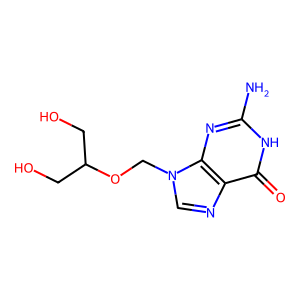

Connectivity Descriptors:
{'Chi0': 13.121, 'Chi1': 8.651, 'mChi1': 0.455, 'Chi2': 7.479, 'Chi3': 6.306, 'Chi4': 5.133, 'Chi5': 3.6, 'Chi6': 
2.799, 'Chi7': 1.87, 'Chi8': 1.276, 'Chi9': 0.805, 'Chi10': 0.385, 'Chi3c': 1.167, 'Chi4c': 0.002, 'Chi4pc': 0.002,
'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.096, 'Chi6ch': 0.056, 'knotp': 1.165, 'Chiv0': 9.406, 'Chiv1': 5.193, 
'Chiv2': 3.621, 'Chiv3': 2.35, 'Chiv4': 1.414, 'Chiv5': 0.837, 'Chiv6': 0.481, 'Chiv7': 0.258, 'Chiv8': 0.143, 
'Chiv9': 0.064, 'Chiv10': 0.025, 'dchi0': 3.715, 'dchi1': 3.458, 'dchi2': 3.858, 'dchi3': 3.957, 'dchi4': 3.719, 
'Chiv3c': 0.431, 'Chiv4c': 0.0, 'Chiv4pc': 0.761, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.029, 'Chiv6ch': 
0.014, 'knotpv': 0.331}

Topology Descriptors:
{'W': 632.0, 'AW': 4.131, 'J': 1.866, 'Tigdi': 3.486, 'Xu': 17.957, 'GMTI': 3.398, 'Pol': 26.0, 'DZ': 42.5, 'Ipc': 
4.183, 'BertzCT': 2.769, 'Thara': 55.64, 'Tsch': 2617.0, 'ZM1': 90, 'ZM2': 105, 'MZM1': 6.667, 'MZM2': 1.162, 
'Qindex': 12.0, 'Platt': 52, 'diametert': 9.0, 'radiust': 5.0, 'petitjeant': 0.444, 'Sito': 5.271, 'Hato': 1.8, 
'Geto': 1.963, 'Arto': 2.111, 'GMTIV': 4.004, 'IDET': 389.79, 'IDE': 3.155, 'ISIZ': 153.58, 'IVDE': 27.549, 'TIAC':
57.335, 'Gravto': 54.111, 'Hatov': 3.541, 'Sitov': 23.937, 'Getov': 3.781}

CATS2D Descriptors:
{'CATS_DD0': 0.4, 'CATS_DD1': 0.0, 'CATS_DD2': 0.1, 'CATS_DD3': 0.0, 'CATS_DD4': 0.1, 'CATS_DD5': 0.0, 'CATS_DD6': 
0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.4, 'CATS_DA0': 0.074, 'CATS_DA1': 0.0, 'CATS_DA2': 0.111, 
'CATS_DA3': 0.111, 'CATS_DA4': 0.148, 'CATS_DA5': 0.111, 'CATS_DA6': 0.074, 'CATS_DA7': 0.148, 'CATS_DA8': 0.0, 
'CATS_DA9': 0.222, 'CATS_DP0': 0.25, 'CATS_DP1': 0.0, 'CATS_DP2': 0.25, 'CATS_DP3': 0.0, 'CATS_DP4': 0.0, 
'CATS_DP5': 0.0, 'CATS_DP6': 0.0, 'CATS_DP7': 0.0, 'CATS_DP8': 0.0, 'CATS_DP9': 0.5, 'CATS_DN0': 0, 'CATS_DN1': 0, 
'CATS_DN2': 0, 'CATS_DN3': 0, 'CATS_DN4': 0, 'CATS_DN5': 0, 'CATS_DN6': 0, 'CATS_DN7': 0, 'CATS_DN8': 0, 
'CATS_DN9': 0, 'CATS_DL0': 0, 'CATS_DL1': 0, 'CATS_DL2': 0, 'CATS_DL3': 0, 'CATS_DL4': 0, 'CATS_DL5': 0, 
'CATS_DL6': 0, 'CATS_DL7': 0, 'CATS_DL8': 0, 'CATS_DL9': 0, 'CATS_AA0': 0.25, 'CATS_AA1': 0.0, 'CATS_AA2': 0.107, 
'CATS_AA3': 0.143, 'CATS_AA4': 0.179, 'CATS_AA5': 0.071, 'CATS_AA6': 0.036, 'CATS_AA7': 0.143, 'CATS_AA8': 0.0, 
'CATS_AA9': 0.071, 'CATS_AP0': 0.0, 'CATS_AP1': 0.0, 'CATS_AP2': 0.143, 'CATS_AP3': 0.0, 'CATS_AP4': 0.286, 
'CATS_AP5': 0.143, 'CATS_AP6': 0.143, 'CATS_AP7': 0.0, 'CATS_AP8': 0.0, 'CATS_AP9': 0.286, 'CATS_AN0': 0, 
'CATS_AN1': 0, 'CATS_AN2': 0, 'CATS_AN3': 0, 'CATS_AN4': 0, 'CATS_AN5': 0, 'CATS_AN6': 0, 'CATS_AN7': 0, 
'CATS_AN8': 0, 'CATS_AN9': 0, 'CATS_AL0': 0, 'CATS_AL1': 0, 'CATS_AL2': 0, 'CATS_AL3': 0, 'CATS_AL4': 0, 
'CATS_AL5': 0, 'CATS_AL6': 0, 'CATS_AL7': 0, 'CATS_AL8': 0, 'CATS_AL9': 0, 'CATS_PP0': 1.0, 'CATS_PP1': 0.0, 
'CATS_PP2': 0.0, 'CATS_PP3': 0.0, 'CATS_PP4': 0.0, 'CATS_PP5': 0.0, 'CATS_PP6': 0.0, 'CATS_PP7': 0.0, 'CATS_PP8': 
0.0, 'CATS_PP9': 0.0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 
'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0, 'CATS_PL1': 0, 'CATS_PL2': 0, 
'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 'CATS_PL7': 0, 'CATS_PL8': 0, 'CATS_PL9': 0, 
'CATS_NN0': 0, 'CATS_NN1': 0, 'CATS_NN2': 0, 'CATS_NN3': 0, 'CATS_NN4': 0, 'CATS_NN5': 0, 'CATS_NN6': 0, 
'CATS_NN7': 0, 'CATS_NN8': 0, 'CATS_NN9': 0, 'CATS_NL0': 0, 'CATS_NL1': 0, 'CATS_NL2': 0, 'CATS_NL3': 0, 
'CATS_NL4': 0, 'CATS_NL5': 0, 'CATS_NL6': 0, 'CATS_NL7': 0, 'CATS_NL8': 0, 'CATS_NL9': 0, 'CATS_LL0': 0, 
'CATS_LL1': 0, 'CATS_LL2': 0, 'CATS_LL3': 0, 'CATS_LL4': 0, 'CATS_LL5': 0, 'CATS_LL6': 0, 'CATS_LL7': 0, 
'CATS_LL8': 0, 'CATS_LL9': 0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 0, 
'Sfinger8': 0, 'Sfinger9': 3, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 1, 'Sfinger13': 1, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 0, 'Sfinger17': 1, 'Sfinger18': 2, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 1, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 1, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 2, 'Sfinger30': 0, 'Sfinger31': 0, 'Sfinger32': 1, 'Sfinger33': 0, 'Sfinger34': 2, 'Sfinger35': 1, 
'Sfinger36': 1, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 0.0, 'S8': 
0.0, 'S9': -0.614, 'S10': 0.0, 'S11': 0.0, 'S12': 1.373, 'S13': -0.693, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 'S17': 
-0.018, 'S18': 0.434, 'S19': 0.0, 'S20': 0.0, 'S21': 5.432, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 2.328, 
'S26': 0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 7.829, 'S30': 0.0, 'S31': 0.0, 'S32': 1.458, 'S33': 0.0, 'S34': 17.711, 
'S35': 11.491, 'S36': 5.203, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 
'S44': 0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 
0.0, 'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 
'S63': 0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 
0.0, 'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 0, 'Smax7': 0, 'Smax8': -0.002, 'Smax9': 0, 'Smax10': 0, 
'Smax11': 1.373, 'Smax12': -0.693, 'Smax13': 0, 'Smax14': 0, 'Smax15': 0, 'Smax16': -0.018, 'Smax17': 0.283, 
'Smax18': 0, 'Smax19': 0, 'Smax20': 5.432, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 2.328, 'Smax25': 0, 
'Smax26': 0, 'Smax27': 0, 'Smax28': 3.944, 'Smax29': 0, 'Smax30': 0, 'Smax31': 1.458, 'Smax32': 0, 'Smax33': 8.856,
'Smax34': 11.491, 'Smax35': 5.203, 'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 
'Smax42': 0, 'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 
0, 'Smax51': 0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 
'Smax59': 0, 'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 
0, 'Smax68': 0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 
'Smax76': 0, 'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 
'Smin6': 0, 'Smin7': 0, 'Smin8': -0.306, 'Smin9': 0, 'Smin10': 0, 'Smin11': 1.373, 'Smin12': -0.693, 'Smin13': 0, 
'Smin14': 0, 'Smin15': 0, 'Smin16': -0.018, 'Smin17': 0.15, 'Smin18': 0, 'Smin19': 0, 'Smin20': 5.432, 'Smin21': 0,
'Smin22': 0, 'Smin23': 0, 'Smin24': 2.328, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 3.885, 'Smin29': 0, 
'Smin30': 0, 'Smin31': 1.458, 'Smin32': 0, 'Smin33': 8.856, 'Smin34': 11.491, 'Smin35': 5.203, 'Smin36': 0, 
'Smin37': 0, 'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 
0, 'Smin46': 0, 'S

========================================

Processing drug with Drug bank ID: DB00199

Drug in SMILES format: 
CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)
O)(C)OC)C)O[C@H]3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O

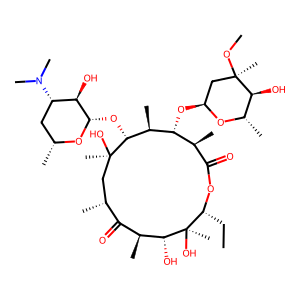

Connectivity Descriptors:
{'Chi0': 38.963, 'Chi1': 23.426, 'mChi1': 0.442, 'Chi2': 23.459, 'Chi3': 19.663, 'Chi4': 14.473, 'Chi5': 10.401, 
'Chi6': 6.887, 'Chi7': 5.066, 'Chi8': 3.318, 'Chi9': 2.256, 'Chi10': 1.546, 'Chi3c': 6.294, 'Chi4c': 0.0, 'Chi4pc':
0.0, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.104, 'knotp': 6.294, 'Chiv0': 32.938, 'Chiv1': 
18.494, 'Chiv2': 16.472, 'Chiv3': 11.822, 'Chiv4': 8.41, 'Chiv5': 4.909, 'Chiv6': 3.111, 'Chiv7': 1.949, 'Chiv8': 
1.183, 'Chiv9': 0.71, 'Chiv10': 0.434, 'dchi0': 6.025, 'dchi1': 4.931, 'dchi2': 6.988, 'dchi3': 7.841, 'dchi4': 
6.063, 'Chiv3c': 3.733, 'Chiv4c': 0.249, 'Chiv4pc': 7.014, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 
'Chiv6ch': 0.06, 'knotpv': 3.281}

Topology Descriptors:
{'W': 8842.0, 'AW': 6.935, 'J': 2.173, 'Tigdi': 5.125, 'Xu': 41.698, 'GMTI': 4.546, 'Pol': 101.0, 'DZ': 115.5, 
'Ipc': 10.43, 'BertzCT': 3.067, 'Thara': 274.062, 'Tsch': 35579.0, 'ZM1': 270, 'ZM2': 324, 'MZM1': 24.687, 'MZM2': 
2.884, 'Qindex': 36.0, 'Platt': 164, 'diametert': 14.0, 'radiust': 8.0, 'petitjeant': 0.429, 'Sito': 13.405, 
'Hato': 1.606, 'Geto': 1.832, 'Arto': 2.078, 'GMTIV': 4.939, 'IDET': 4390.695, 'IDE': 3.724, 'ISIZ': 812.152, 
'IVDE': 89.822, 'TIAC': 164.868, 'Gravto': 180.131, 'Hatov': 2.144, 'Sitov': 50.174, 'Getov': 2.675}

CATS2D Descriptors:
{'CATS_DD0': 0.556, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.111, 'CATS_DD4': 0.0, 'CATS_DD5': 0.0, 
'CATS_DD6': 0.111, 'CATS_DD7': 0.111, 'CATS_DD8': 0.111, 'CATS_DD9': 0.0, 'CATS_DA0': 0.116, 'CATS_DA1': 0.0, 
'CATS_DA2': 0.0, 'CATS_DA3': 0.186, 'CATS_DA4': 0.047, 'CATS_DA5': 0.14, 'CATS_DA6': 0.047, 'CATS_DA7': 0.163, 
'CATS_DA8': 0.07, 'CATS_DA9': 0.233, 'CATS_DP0': 0, 'CATS_DP1': 0, 'CATS_DP2': 0, 'CATS_DP3': 0, 'CATS_DP4': 0, 
'CATS_DP5': 0, 'CATS_DP6': 0, 'CATS_DP7': 0, 'CATS_DP8': 0, 'CATS_DP9': 0, 'CATS_DN0': 0.0, 'CATS_DN1': 0.0, 
'CATS_DN2': 0.0, 'CATS_DN3': 0.0, 'CATS_DN4': 0.2, 'CATS_DN5': 0.2, 'CATS_DN6': 0.2, 'CATS_DN7': 0.0, 'CATS_DN8': 
0.4, 'CATS_DN9': 0.0, 'CATS_DL0': 0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.063, 'CATS_DL3': 0.159, 'CATS_DL4': 0.095, 
'CATS_DL5': 0.143, 'CATS_DL6': 0.143, 'CATS_DL7': 0.159, 'CATS_DL8': 0.127, 'CATS_DL9': 0.111, 'CATS_AA0': 0.175, 
'CATS_AA1': 0.0, 'CATS_AA2': 0.037, 'CATS_AA3': 0.1, 'CATS_AA4': 0.113, 'CATS_AA5': 0.075, 'CATS_AA6': 0.125, 
'CATS_AA7': 0.087, 'CATS_AA8': 0.163, 'CATS_AA9': 0.125, 'CATS_AP0': 0, 'CATS_AP1': 0, 'CATS_AP2': 0, 'CATS_AP3': 
0, 'CATS_AP4': 0, 'CATS_AP5': 0, 'CATS_AP6': 0, 'CATS_AP7': 0, 'CATS_AP8': 0, 'CATS_AP9': 0, 'CATS_AN0': 0.0, 
'CATS_AN1': 0.143, 'CATS_AN2': 0.0, 'CATS_AN3': 0.071, 'CATS_AN4': 0.071, 'CATS_AN5': 0.214, 'CATS_AN6': 0.071, 
'CATS_AN7': 0.214, 'CATS_AN8': 0.143, 'CATS_AN9': 0.071, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 'CATS_AL2': 0.105, 
'CATS_AL3': 0.116, 'CATS_AL4': 0.116, 'CATS_AL5': 0.132, 'CATS_AL6': 0.126, 'CATS_AL7': 0.163, 'CATS_AL8': 0.137, 
'CATS_AL9': 0.105, 'CATS_PP0': 0, 'CATS_PP1': 0, 'CATS_PP2': 0, 'CATS_PP3': 0, 'CATS_PP4': 0, 'CATS_PP5': 0, 
'CATS_PP6': 0, 'CATS_PP7': 0, 'CATS_PP8': 0, 'CATS_PP9': 0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 
'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 
'CATS_PL0': 0, 'CATS_PL1': 0, 'CATS_PL2': 0, 'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 
'CATS_PL7': 0, 'CATS_PL8': 0, 'CATS_PL9': 0, 'CATS_NN0': 1.0, 'CATS_NN1': 0.0, 'CATS_NN2': 0.0, 'CATS_NN3': 0.0, 
'CATS_NN4': 0.0, 'CATS_NN5': 0.0, 'CATS_NN6': 0.0, 'CATS_NN7': 0.0, 'CATS_NN8': 0.0, 'CATS_NN9': 0.0, 'CATS_NL0': 
0.0, 'CATS_NL1': 0.056, 'CATS_NL2': 0.056, 'CATS_NL3': 0.111, 'CATS_NL4': 0.167, 'CATS_NL5': 0.111, 'CATS_NL6': 
0.167, 'CATS_NL7': 0.167, 'CATS_NL8': 0.056, 'CATS_NL9': 0.111, 'CATS_LL0': 0.13, 'CATS_LL1': 0.043, 'CATS_LL2': 
0.043, 'CATS_LL3': 0.072, 'CATS_LL4': 0.109, 'CATS_LL5': 0.094, 'CATS_LL6': 0.145, 'CATS_LL7': 0.174, 'CATS_LL8': 
0.101, 'CATS_LL9': 0.087}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 13, 
'Sfinger8': 0, 'Sfinger9': 4, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 0, 'Sfinger13': 15, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 2, 'Sfinger17': 0, 'Sfinger18': 0, 'Sfinger19': 3, 'Sfinger20': 0, 'Sfinger21': 0, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 0, 'Sfinger30': 1, 'Sfinger31': 0, 'Sfinger32': 0, 'Sfinger33': 0, 'Sfinger34': 5, 'Sfinger35': 2, 
'Sfinger36': 6, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 21.508, 
'S8': 0.0, 'S9': 0.629, 'S10': 0.0, 'S11': 0.0, 'S12': 0.0, 'S13': -14.465, 'S14': 0.0, 'S15': 0.0, 'S16': -1.172, 
'S17': 0.0, 'S18': 0.0, 'S19': -4.839, 'S20': 0.0, 'S21': 0.0, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 0.0, 
'S26': 0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 0.0, 'S30': 1.883, 'S31': 0.0, 'S32': 0.0, 'S33': 0.0, 'S34': 57.61, 
'S35': 27.876, 'S36': 37.054, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 
'S44': 0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 
0.0, 'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 
'S63': 0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 
0.0, 'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 1.868, 'Smax7': 0, 'Smax8': 0.536, 'Smax9': 0, 'Smax10': 
0, 'Smax11': 0, 'Smax12': -0.303, 'Smax13': 0, 'Smax14': 0, 'Smax15': -0.411, 'Smax16': 0, 'Smax17': 0, 'Smax18': 
-1.051, 'Smax19': 0, 'Smax20': 0, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 0, 'Smax25': 0, 'Smax26': 0, 
'Smax27': 0, 'Smax28': 0, 'Smax29': 1.883, 'Smax30': 0, 'Smax31': 0, 'Smax32': 0, 'Smax33': 12.377, 'Smax34': 
14.073, 'Smax35': 6.635, 'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 'Smax42': 0,
'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 0, 'Smax51': 
0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 'Smax59': 0, 
'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 0, 'Smax68': 
0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 'Smax76': 0, 
'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 'Smin6': 1.34, 
'Smin7': 0, 'Smin8': -0.136, 'Smin9': 0, 'Smin10': 0, 'Smin11': 0, 'Smin12': -1.6, 'Smin13': 0, 'Smin14': 0, 
'Smin15': -0.761, 'Smin16': 0, 'Smin17': 0, 'Smin18': -1.994, 'Smin19': 0, 'Smin20': 0, 'Smin21': 0, 'Smin22': 0, 
'Smin23': 0, 'Smin24': 0, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 0, 'Smin29': 1.883, 'Smin30': 0, 
'Smin31': 0, 'Smin32': 0, 'Smin33': 10.87, 'Smin34': 13.803, 'Smin35': 5.693, 'Smin36': 0, 'Smin37': 0, 'Smin38': 
0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 'Smin46': 0, 
'Smin47': 0, 'Smin48': 0, '

========================================

Processing drug with Drug bank ID: DB00684

Drug in SMILES format: 
C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1N)O[C@@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O)N)O)O)O[C@@H]3[C@@H](C[C@@H]([C@H](O
3)CN)O)N)N

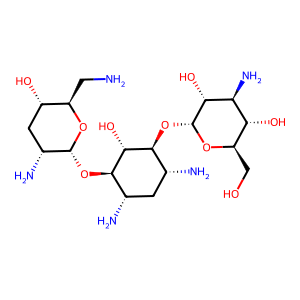

Connectivity Descriptors:
{'Chi0': 23.74, 'Chi1': 15.082, 'mChi1': 0.444, 'Chi2': 13.944, 'Chi3': 12.465, 'Chi4': 9.61, 'Chi5': 7.262, 
'Chi6': 5.41, 'Chi7': 3.539, 'Chi8': 2.437, 'Chi9': 1.522, 'Chi10': 1.133, 'Chi3c': 2.651, 'Chi4c': 0.0, 'Chi4pc': 
0.0, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.146, 'knotp': 2.651, 'Chiv0': 17.667, 'Chiv1': 
10.759, 'Chiv2': 8.785, 'Chiv3': 6.415, 'Chiv4': 4.428, 'Chiv5': 3.016, 'Chiv6': 1.838, 'Chiv7': 1.076, 'Chiv8': 
0.627, 'Chiv9': 0.391, 'Chiv10': 0.243, 'dchi0': 6.073, 'dchi1': 4.323, 'dchi2': 5.159, 'dchi3': 6.05, 'dchi4': 
5.182, 'Chiv3c': 1.344, 'Chiv4c': 0.0, 'Chiv4pc': 2.685, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 'Chiv6ch':
0.104, 'knotpv': 1.342}

Topology Descriptors:
{'W': 2932.0, 'AW': 5.911, 'J': 1.699, 'Tigdi': 4.336, 'Xu': 29.423, 'GMTI': 4.083, 'Pol': 59.0, 'DZ': 75.5, 'Ipc':
6.944, 'BertzCT': 2.783, 'Thara': 132.553, 'Tsch': 12104.0, 'ZM1': 168, 'ZM2': 202, 'MZM1': 13.556, 'MZM2': 1.901, 
'Qindex': 23.0, 'Platt': 100, 'diametert': 14.0, 'radiust': 7.0, 'petitjeant': 0.5, 'Sito': 9.088, 'Hato': 1.714, 
'Geto': 1.923, 'Arto': 2.125, 'GMTIV': 4.567, 'IDET': 1628.806, 'IDE': 3.69, 'ISIZ': 421.488, 'IVDE': 49.478, 
'TIAC': 113.541, 'Gravto': 107.122, 'Hatov': 3.2, 'Sitov': 38.86, 'Getov': 3.368}

CATS2D Descriptors:
{'CATS_DD0': 0.256, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.051, 'CATS_DD4': 0.179, 'CATS_DD5': 0.026, 
'CATS_DD6': 0.154, 'CATS_DD7': 0.051, 'CATS_DD8': 0.256, 'CATS_DD9': 0.026, 'CATS_DA0': 0.081, 'CATS_DA1': 0.0, 
'CATS_DA2': 0.0, 'CATS_DA3': 0.226, 'CATS_DA4': 0.129, 'CATS_DA5': 0.177, 'CATS_DA6': 0.065, 'CATS_DA7': 0.081, 
'CATS_DA8': 0.145, 'CATS_DA9': 0.097, 'CATS_DP0': 0.185, 'CATS_DP1': 0.0, 'CATS_DP2': 0.0, 'CATS_DP3': 0.074, 
'CATS_DP4': 0.185, 'CATS_DP5': 0.037, 'CATS_DP6': 0.148, 'CATS_DP7': 0.074, 'CATS_DP8': 0.259, 'CATS_DP9': 0.037, 
'CATS_DN0': 0, 'CATS_DN1': 0, 'CATS_DN2': 0, 'CATS_DN3': 0, 'CATS_DN4': 0, 'CATS_DN5': 0, 'CATS_DN6': 0, 
'CATS_DN7': 0, 'CATS_DN8': 0, 'CATS_DN9': 0, 'CATS_DL0': 0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.25, 'CATS_DL3': 0.0, 
'CATS_DL4': 0.125, 'CATS_DL5': 0.0, 'CATS_DL6': 0.25, 'CATS_DL7': 0.062, 'CATS_DL8': 0.312, 'CATS_DL9': 0.0, 
'CATS_AA0': 0.231, 'CATS_AA1': 0.0, 'CATS_AA2': 0.051, 'CATS_AA3': 0.179, 'CATS_AA4': 0.077, 'CATS_AA5': 0.128, 
'CATS_AA6': 0.103, 'CATS_AA7': 0.026, 'CATS_AA8': 0.103, 'CATS_AA9': 0.103, 'CATS_AP0': 0.0, 'CATS_AP1': 0.0, 
'CATS_AP2': 0.0, 'CATS_AP3': 0.212, 'CATS_AP4': 0.182, 'CATS_AP5': 0.182, 'CATS_AP6': 0.061, 'CATS_AP7': 0.121, 
'CATS_AP8': 0.182, 'CATS_AP9': 0.061, 'CATS_AN0': 0, 'CATS_AN1': 0, 'CATS_AN2': 0, 'CATS_AN3': 0, 'CATS_AN4': 0, 
'CATS_AN5': 0, 'CATS_AN6': 0, 'CATS_AN7': 0, 'CATS_AN8': 0, 'CATS_AN9': 0, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 
'CATS_AL2': 0.067, 'CATS_AL3': 0.267, 'CATS_AL4': 0.067, 'CATS_AL5': 0.133, 'CATS_AL6': 0.133, 'CATS_AL7': 0.067, 
'CATS_AL8': 0.2, 'CATS_AL9': 0.067, 'CATS_PP0': 0.417, 'CATS_PP1': 0.0, 'CATS_PP2': 0.0, 'CATS_PP3': 0.0, 
'CATS_PP4': 0.083, 'CATS_PP5': 0.0, 'CATS_PP6': 0.167, 'CATS_PP7': 0.083, 'CATS_PP8': 0.167, 'CATS_PP9': 0.083, 
'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 'CATS_PN6': 0, 
'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0.0, 'CATS_PL1': 0.0, 'CATS_PL2': 0.333, 'CATS_PL3': 0.0, 
'CATS_PL4': 0.111, 'CATS_PL5': 0.0, 'CATS_PL6': 0.222, 'CATS_PL7': 0.111, 'CATS_PL8': 0.222, 'CATS_PL9': 0.0, 
'CATS_NN0': 0, 'CATS_NN1': 0, 'CATS_NN2': 0, 'CATS_NN3': 0, 'CATS_NN4': 0, 'CATS_NN5': 0, 'CATS_NN6': 0, 
'CATS_NN7': 0, 'CATS_NN8': 0, 'CATS_NN9': 0, 'CATS_NL0': 0, 'CATS_NL1': 0, 'CATS_NL2': 0, 'CATS_NL3': 0, 
'CATS_NL4': 0, 'CATS_NL5': 0, 'CATS_NL6': 0, 'CATS_NL7': 0, 'CATS_NL8': 0, 'CATS_NL9': 0, 'CATS_LL0': 0.667, 
'CATS_LL1': 0.0, 'CATS_LL2': 0.0, 'CATS_LL3': 0.0, 'CATS_LL4': 0.0, 'CATS_LL5': 0.0, 'CATS_LL6': 0.333, 'CATS_LL7':
0.0, 'CATS_LL8': 0.0, 'CATS_LL9': 0.0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 0, 
'Sfinger8': 0, 'Sfinger9': 4, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 0, 'Sfinger13': 14, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 0, 'Sfinger17': 0, 'Sfinger18': 0, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 5, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 0, 'Sfinger30': 0, 'Sfinger31': 0, 'Sfinger32': 0, 'Sfinger33': 0, 'Sfinger34': 5, 'Sfinger35': 0, 
'Sfinger36': 4, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 0.0, 'S8': 
0.0, 'S9': -0.117, 'S10': 0.0, 'S11': 0.0, 'S12': 0.0, 'S13': -14.412, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 'S17': 
0.0, 'S18': 0.0, 'S19': 0.0, 'S20': 0.0, 'S21': 29.77, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 0.0, 'S26': 0.0, 
'S27': 0.0, 'S28': 0.0, 'S29': 0.0, 'S30': 0.0, 'S31': 0.0, 'S32': 0.0, 'S33': 0.0, 'S34': 50.71, 'S35': 0.0, 
'S36': 22.716, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 'S44': 0.0, 
'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 0.0, 'S54': 
0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 'S63': 0.0, 
'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 0.0, 'S73': 
0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 'Smax2': 0, 
'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 0, 'Smax7': 0, 'Smax8': 0.193, 'Smax9': 0, 'Smax10': 0, 'Smax11': 0, 
'Smax12': -0.68, 'Smax13': 0, 'Smax14': 0, 'Smax15': 0, 'Smax16': 0, 'Smax17': 0, 'Smax18': 0, 'Smax19': 0, 
'Smax20': 6.166, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 0, 'Smax25': 0, 'Smax26': 0, 'Smax27': 0, 
'Smax28': 0, 'Smax29': 0, 'Smax30': 0, 'Smax31': 0, 'Smax32': 0, 'Smax33': 10.972, 'Smax34': 0, 'Smax35': 5.892, 
'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 'Smax42': 0, 'Smax43': 0, 'Smax44': 
0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 0, 'Smax51': 0, 'Smax52': 0, 
'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 'Smax59': 0, 'Smax60': 0, 'Smax61': 
0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 0, 'Smax68': 0, 'Smax69': 0, 
'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 'Smax76': 0, 'Smax77': 0, 'Smax78': 
0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 'Smin6': 0, 'Smin7': 0, 'Smin8': -0.553,
'Smin9': 0, 'Smin10': 0, 'Smin11': 0, 'Smin12': -1.441, 'Smin13': 0, 'Smin14': 0, 'Smin15': 0, 'Smin16': 0, 
'Smin17': 0, 'Smin18': 0, 'Smin19': 0, 'Smin20': 5.615, 'Smin21': 0, 'Smin22': 0, 'Smin23': 0, 'Smin24': 0, 
'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 0, 'Smin29': 0, 'Smin30': 0, 'Smin31': 0, 'Smin32': 0, 'Smin33': 
9.397, 'Smin34': 0, 'Smin35': 5.422, 'Smin36': 0, 'Smin37': 0, 'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 
'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 'Smin46': 0, 'Smin47': 0, 'Smin48': 0, 'Smin49': 0, 'Smin50': 
0, 'Smin51': 0, 'Smin52': 

========================================

Processing drug with Drug bank ID: DB00440

Drug in SMILES format: COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N

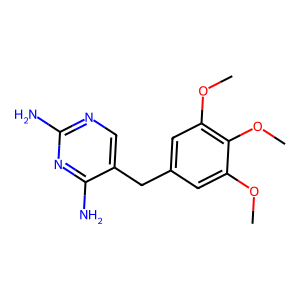

Connectivity Descriptors:
{'Chi0': 15.405, 'Chi1': 10.083, 'mChi1': 0.458, 'Chi2': 8.637, 'Chi3': 7.249, 'Chi4': 5.991, 'Chi5': 4.639, 
'Chi6': 2.861, 'Chi7': 2.061, 'Chi8': 1.342, 'Chi9': 0.857, 'Chi10': 0.519, 'Chi3c': 1.365, 'Chi4c': 0.001, 
'Chi4pc': 0.001, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.124, 'knotp': 1.364, 'Chiv0': 12.213, 
'Chiv1': 6.244, 'Chiv2': 4.349, 'Chiv3': 3.036, 'Chiv4': 2.028, 'Chiv5': 1.358, 'Chiv6': 0.71, 'Chiv7': 0.43, 
'Chiv8': 0.23, 'Chiv9': 0.114, 'Chiv10': 0.052, 'dchi0': 3.192, 'dchi1': 3.839, 'dchi2': 4.288, 'dchi3': 4.213, 
'dchi4': 3.964, 'Chiv3c': 0.511, 'Chiv4c': 0.0, 'Chiv4pc': 0.991, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 
'Chiv6ch': 0.035, 'knotpv': 0.48}

Topology Descriptors:
{'W': 946.0, 'AW': 4.505, 'J': 1.939, 'Tigdi': 3.721, 'Xu': 20.556, 'GMTI': 3.573, 'Pol': 33.0, 'DZ': 47.0, 'Ipc': 
4.718, 'BertzCT': 2.793, 'Thara': 70.181, 'Tsch': 3878.0, 'ZM1': 104, 'ZM2': 121, 'MZM1': 8.028, 'MZM2': 1.433, 
'Qindex': 13.0, 'Platt': 60, 'diametert': 11.0, 'radiust': 6.0, 'petitjeant': 0.455, 'Sito': 6.049, 'Hato': 1.775, 
'Geto': 1.941, 'Arto': 2.095, 'GMTIV': 4.075, 'IDET': 575.74, 'IDE': 3.288, 'ISIZ': 206.131, 'IVDE': 32.448, 
'TIAC': 65.014, 'Gravto': 61.53, 'Hatov': 2.687, 'Sitov': 24.484, 'Getov': 3.209}

CATS2D Descriptors:
{'CATS_DD0': 0.667, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.0, 'CATS_DD4': 0.333, 'CATS_DD5': 0.0, 
'CATS_DD6': 0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.0, 'CATS_DA0': 0.0, 'CATS_DA1': 0.0, 'CATS_DA2': 
0.333, 'CATS_DA3': 0.0, 'CATS_DA4': 0.111, 'CATS_DA5': 0.0, 'CATS_DA6': 0.0, 'CATS_DA7': 0.222, 'CATS_DA8': 0.111, 
'CATS_DA9': 0.222, 'CATS_DP0': 0.667, 'CATS_DP1': 0.0, 'CATS_DP2': 0.0, 'CATS_DP3': 0.0, 'CATS_DP4': 0.333, 
'CATS_DP5': 0.0, 'CATS_DP6': 0.0, 'CATS_DP7': 0.0, 'CATS_DP8': 0.0, 'CATS_DP9': 0.0, 'CATS_DN0': 0, 'CATS_DN1': 0, 
'CATS_DN2': 0, 'CATS_DN3': 0, 'CATS_DN4': 0, 'CATS_DN5': 0, 'CATS_DN6': 0, 'CATS_DN7': 0, 'CATS_DN8': 0, 
'CATS_DN9': 0, 'CATS_DL0': 0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.1, 'CATS_DL3': 0.1, 'CATS_DL4': 0.2, 'CATS_DL5': 
0.3, 'CATS_DL6': 0.1, 'CATS_DL7': 0.2, 'CATS_DL8': 0.0, 'CATS_DL9': 0.0, 'CATS_AA0': 0.333, 'CATS_AA1': 0.0, 
'CATS_AA2': 0.067, 'CATS_AA3': 0.133, 'CATS_AA4': 0.067, 'CATS_AA5': 0.0, 'CATS_AA6': 0.0, 'CATS_AA7': 0.267, 
'CATS_AA8': 0.133, 'CATS_AA9': 0.0, 'CATS_AP0': 0.0, 'CATS_AP1': 0.0, 'CATS_AP2': 0.333, 'CATS_AP3': 0.0, 
'CATS_AP4': 0.111, 'CATS_AP5': 0.0, 'CATS_AP6': 0.0, 'CATS_AP7': 0.222, 'CATS_AP8': 0.111, 'CATS_AP9': 0.222, 
'CATS_AN0': 0, 'CATS_AN1': 0, 'CATS_AN2': 0, 'CATS_AN3': 0, 'CATS_AN4': 0, 'CATS_AN5': 0, 'CATS_AN6': 0, 
'CATS_AN7': 0, 'CATS_AN8': 0, 'CATS_AN9': 0, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 'CATS_AL2': 0.16, 'CATS_AL3': 0.24, 
'CATS_AL4': 0.28, 'CATS_AL5': 0.28, 'CATS_AL6': 0.04, 'CATS_AL7': 0.0, 'CATS_AL8': 0.0, 'CATS_AL9': 0.0, 
'CATS_PP0': 0.667, 'CATS_PP1': 0.0, 'CATS_PP2': 0.0, 'CATS_PP3': 0.0, 'CATS_PP4': 0.333, 'CATS_PP5': 0.0, 
'CATS_PP6': 0.0, 'CATS_PP7': 0.0, 'CATS_PP8': 0.0, 'CATS_PP9': 0.0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 
'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 
'CATS_PL0': 0.0, 'CATS_PL1': 0.0, 'CATS_PL2': 0.1, 'CATS_PL3': 0.1, 'CATS_PL4': 0.2, 'CATS_PL5': 0.3, 'CATS_PL6': 
0.1, 'CATS_PL7': 0.2, 'CATS_PL8': 0.0, 'CATS_PL9': 0.0, 'CATS_NN0': 0, 'CATS_NN1': 0, 'CATS_NN2': 0, 'CATS_NN3': 0,
'CATS_NN4': 0, 'CATS_NN5': 0, 'CATS_NN6': 0, 'CATS_NN7': 0, 'CATS_NN8': 0, 'CATS_NN9': 0, 'CATS_NL0': 0, 
'CATS_NL1': 0, 'CATS_NL2': 0, 'CATS_NL3': 0, 'CATS_NL4': 0, 'CATS_NL5': 0, 'CATS_NL6': 0, 'CATS_NL7': 0, 
'CATS_NL8': 0, 'CATS_NL9': 0, 'CATS_LL0': 0.333, 'CATS_LL1': 0.267, 'CATS_LL2': 0.267, 'CATS_LL3': 0.133, 
'CATS_LL4': 0.0, 'CATS_LL5': 0.0, 'CATS_LL6': 0.0, 'CATS_LL7': 0.0, 'CATS_LL8': 0.0, 'CATS_LL9': 0.0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 3, 
'Sfinger8': 0, 'Sfinger9': 1, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 3, 'Sfinger13': 0, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 0, 'Sfinger17': 7, 'Sfinger18': 0, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 2, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 2, 'Sfinger30': 0, 'Sfinger31': 0, 'Sfinger32': 0, 'Sfinger33': 0, 'Sfinger34': 0, 'Sfinger35': 0, 
'Sfinger36': 3, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 4.704, 
'S8': 0.0, 'S9': 0.531, 'S10': 0.0, 'S11': 0.0, 'S12': 5.329, 'S13': 0.0, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 
'S17': 3.939, 'S18': 0.0, 'S19': 0.0, 'S20': 0.0, 'S21': 11.339, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 0.0, 
'S26': 0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 7.9, 'S30': 0.0, 'S31': 0.0, 'S32': 0.0, 'S33': 0.0, 'S34': 0.0, 'S35': 
0.0, 'S36': 15.925, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 'S44': 0.0,
'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 0.0, 'S54': 
0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 'S63': 0.0, 
'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 0.0, 'S73': 
0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 'Smax2': 0, 
'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 1.571, 'Smax7': 0, 'Smax8': 0.531, 'Smax9': 0, 'Smax10': 0, 'Smax11': 
1.858, 'Smax12': 0, 'Smax13': 0, 'Smax14': 0, 'Smax15': 0, 'Smax16': 0.935, 'Smax17': 0, 'Smax18': 0, 'Smax19': 0, 
'Smax20': 5.848, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 0, 'Smax25': 0, 'Smax26': 0, 'Smax27': 0, 
'Smax28': 3.954, 'Smax29': 0, 'Smax30': 0, 'Smax31': 0, 'Smax32': 0, 'Smax33': 0, 'Smax34': 0, 'Smax35': 5.319, 
'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 'Smax42': 0, 'Smax43': 0, 'Smax44': 
0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 0, 'Smax51': 0, 'Smax52': 0, 
'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 'Smax59': 0, 'Smax60': 0, 'Smax61': 
0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 0, 'Smax68': 0, 'Smax69': 0, 
'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 'Smax76': 0, 'Smax77': 0, 'Smax78': 
0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 'Smin6': 1.561, 'Smin7': 0, 'Smin8': 
0.531, 'Smin9': 0, 'Smin10': 0, 'Smin11': 1.612, 'Smin12': 0, 'Smin13': 0, 'Smin14': 0, 'Smin15': 0, 'Smin16': 
0.154, 'Smin17': 0, 'Smin18': 0, 'Smin19': 0, 'Smin20': 5.491, 'Smin21': 0, 'Smin22': 0, 'Smin23': 0, 'Smin24': 0, 
'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 3.946, 'Smin29': 0, 'Smin30': 0, 'Smin31': 0, 'Smin32': 0, 
'Smin33': 0, 'Smin34': 0, 'Smin35': 5.287, 'Smin36': 0, 'Smin37': 0, 'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 
'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 'Smin46': 0, 'Smin47': 0, 'Smin48': 0, 'Smin49': 
0, 'Smin50': 0, 'Smin51': 0

========================================

Processing drug with Drug bank ID: DB01165

Drug in SMILES format: CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O

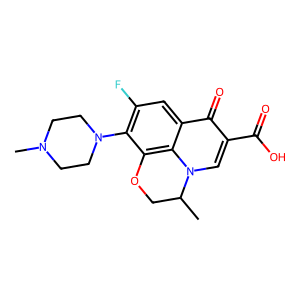

Connectivity Descriptors:
{'Chi0': 18.585, 'Chi1': 12.38, 'mChi1': 0.427, 'Chi2': 11.937, 'Chi3': 10.321, 'Chi4': 8.974, 'Chi5': 7.953, 
'Chi6': 6.24, 'Chi7': 5.146, 'Chi8': 3.552, 'Chi9': 2.656, 'Chi10': 1.797, 'Chi3c': 2.219, 'Chi4c': 0.0, 'Chi4pc': 
0.0, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.23, 'knotp': 2.219, 'Chiv0': 14.659, 'Chiv1': 8.591, 
'Chiv2': 6.967, 'Chiv3': 5.192, 'Chiv4': 3.689, 'Chiv5': 2.868, 'Chiv6': 1.849, 'Chiv7': 1.249, 'Chiv8': 0.754, 
'Chiv9': 0.48, 'Chiv10': 0.293, 'dchi0': 3.926, 'dchi1': 3.789, 'dchi2': 4.97, 'dchi3': 5.129, 'dchi4': 5.285, 
'Chiv3c': 1.051, 'Chiv4c': 0.0, 'Chiv4pc': 2.156, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 'Chiv6ch': 0.103,
'knotpv': 1.105}

Topology Descriptors:
{'W': 1484.0, 'AW': 4.566, 'J': 1.605, 'Tigdi': 4.105, 'Xu': 24.114, 'GMTI': 3.822, 'Pol': 51.0, 'DZ': 59.0, 'Ipc':
5.917, 'BertzCT': 2.984, 'Thara': 104.297, 'Tsch': 6444.0, 'ZM1': 146, 'ZM2': 180, 'MZM1': 9.333, 'MZM2': 1.255, 
'Qindex': 24.0, 'Platt': 88, 'diametert': 12.0, 'radiust': 6.0, 'petitjeant': 0.5, 'Sito': 8.134, 'Hato': 1.857, 
'Geto': 2.055, 'Arto': 2.231, 'GMTIV': 4.304, 'IDET': 919.473, 'IDE': 3.292, 'ISIZ': 254.084, 'IVDE': 39.682, 
'TIAC': 79.832, 'Gravto': 87.196, 'Hatov': 2.907, 'Sitov': 31.611, 'Getov': 3.373}

CATS2D Descriptors:
{'CATS_DD0': 1.0, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.0, 'CATS_DD4': 0.0, 'CATS_DD5': 0.0, 'CATS_DD6': 
0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.0, 'CATS_DA0': 0.167, 'CATS_DA1': 0.0, 'CATS_DA2': 0.167, 
'CATS_DA3': 0.0, 'CATS_DA4': 0.333, 'CATS_DA5': 0.0, 'CATS_DA6': 0.0, 'CATS_DA7': 0.167, 'CATS_DA8': 0.167, 
'CATS_DA9': 0.0, 'CATS_DP0': 0, 'CATS_DP1': 0, 'CATS_DP2': 0, 'CATS_DP3': 0, 'CATS_DP4': 0, 'CATS_DP5': 0, 
'CATS_DP6': 0, 'CATS_DP7': 0, 'CATS_DP8': 0, 'CATS_DP9': 0, 'CATS_DN0': 0.0, 'CATS_DN1': 1.0, 'CATS_DN2': 0.0, 
'CATS_DN3': 0.0, 'CATS_DN4': 0.0, 'CATS_DN5': 0.0, 'CATS_DN6': 0.0, 'CATS_DN7': 0.0, 'CATS_DN8': 0.0, 'CATS_DN9': 
0.0, 'CATS_DL0': 0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.25, 'CATS_DL3': 0.0, 'CATS_DL4': 0.25, 'CATS_DL5': 0.25, 
'CATS_DL6': 0.25, 'CATS_DL7': 0.0, 'CATS_DL8': 0.0, 'CATS_DL9': 0.0, 'CATS_AA0': 0.269, 'CATS_AA1': 0.0, 
'CATS_AA2': 0.038, 'CATS_AA3': 0.115, 'CATS_AA4': 0.231, 'CATS_AA5': 0.038, 'CATS_AA6': 0.077, 'CATS_AA7': 0.115, 
'CATS_AA8': 0.077, 'CATS_AA9': 0.038, 'CATS_AP0': 0, 'CATS_AP1': 0, 'CATS_AP2': 0, 'CATS_AP3': 0, 'CATS_AP4': 0, 
'CATS_AP5': 0, 'CATS_AP6': 0, 'CATS_AP7': 0, 'CATS_AP8': 0, 'CATS_AP9': 0, 'CATS_AN0': 0.0, 'CATS_AN1': 0.333, 
'CATS_AN2': 0.0, 'CATS_AN3': 0.333, 'CATS_AN4': 0.0, 'CATS_AN5': 0.0, 'CATS_AN6': 0.167, 'CATS_AN7': 0.167, 
'CATS_AN8': 0.0, 'CATS_AN9': 0.0, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 'CATS_AL2': 0.25, 'CATS_AL3': 0.179, 
'CATS_AL4': 0.143, 'CATS_AL5': 0.107, 'CATS_AL6': 0.214, 'CATS_AL7': 0.036, 'CATS_AL8': 0.0, 'CATS_AL9': 0.071, 
'CATS_PP0': 0, 'CATS_PP1': 0, 'CATS_PP2': 0, 'CATS_PP3': 0, 'CATS_PP4': 0, 'CATS_PP5': 0, 'CATS_PP6': 0, 
'CATS_PP7': 0, 'CATS_PP8': 0, 'CATS_PP9': 0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 
'CATS_PN4': 0, 'CATS_PN5': 0, 'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0, 
'CATS_PL1': 0, 'CATS_PL2': 0, 'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 'CATS_PL7': 0, 
'CATS_PL8': 0, 'CATS_PL9': 0, 'CATS_NN0': 1.0, 'CATS_NN1': 0.0, 'CATS_NN2': 0.0, 'CATS_NN3': 0.0, 'CATS_NN4': 0.0, 
'CATS_NN5': 0.0, 'CATS_NN6': 0.0, 'CATS_NN7': 0.0, 'CATS_NN8': 0.0, 'CATS_NN9': 0.0, 'CATS_NL0': 0.0, 'CATS_NL1': 
0.25, 'CATS_NL2': 0.0, 'CATS_NL3': 0.25, 'CATS_NL4': 0.25, 'CATS_NL5': 0.25, 'CATS_NL6': 0.0, 'CATS_NL7': 0.0, 
'CATS_NL8': 0.0, 'CATS_NL9': 0.0, 'CATS_LL0': 0.4, 'CATS_LL1': 0.1, 'CATS_LL2': 0.1, 'CATS_LL3': 0.1, 'CATS_LL4': 
0.2, 'CATS_LL5': 0.1, 'CATS_LL6': 0.0, 'CATS_LL7': 0.0, 'CATS_LL8': 0.0, 'CATS_LL9': 0.0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 2, 
'Sfinger8': 0, 'Sfinger9': 5, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 2, 'Sfinger13': 1, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 1, 'Sfinger17': 4, 'Sfinger18': 2, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 0, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 0, 'Sfinger30': 2, 'Sfinger31': 0, 'Sfinger32': 1, 'Sfinger33': 0, 'Sfinger34': 1, 'Sfinger35': 2, 
'Sfinger36': 1, 'Sfinger37': 0, 'Sfinger38': 1, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 3.888, 
'S8': 0.0, 'S9': 3.203, 'S10': 0.0, 'S11': 0.0, 'S12': 2.495, 'S13': -0.158, 'S14': 0.0, 'S15': 0.0, 'S16': -1.315,
'S17': -0.229, 'S18': 0.51, 'S19': 0.0, 'S20': 0.0, 'S21': 0.0, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 0.0, 
'S26': 0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 0.0, 'S30': 4.096, 'S31': 0.0, 'S32': 1.72, 'S33': 0.0, 'S34': 9.32, 
'S35': 23.989, 'S36': 5.853, 'S37': 0.0, 'S38': 14.984, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0,
'S44': 0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 
0.0, 'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 
'S63': 0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 
0.0, 'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 2.015, 'Smax7': 0, 'Smax8': 0.804, 'Smax9': 0, 'Smax10': 
0, 'Smax11': 1.343, 'Smax12': -0.158, 'Smax13': 0, 'Smax14': 0, 'Smax15': -1.315, 'Smax16': 0.355, 'Smax17': 0.467,
'Smax18': 0, 'Smax19': 0, 'Smax20': 0, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 0, 'Smax25': 0, 'Smax26': 
0, 'Smax27': 0, 'Smax28': 0, 'Smax29': 2.166, 'Smax30': 0, 'Smax31': 1.72, 'Smax32': 0, 'Smax33': 9.32, 'Smax34': 
12.567, 'Smax35': 5.853, 'Smax36': 0, 'Smax37': 14.984, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 
'Smax42': 0, 'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 
0, 'Smax51': 0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 
'Smax59': 0, 'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 
0, 'Smax68': 0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 
'Smax76': 0, 'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 
'Smin6': 1.872, 'Smin7': 0, 'Smin8': 0.286, 'Smin9': 0, 'Smin10': 0, 'Smin11': 1.152, 'Smin12': -0.158, 'Smin13': 
0, 'Smin14': 0, 'Smin15': -1.315, 'Smin16': -0.558, 'Smin17': 0.043, 'Smin18': 0, 'Smin19': 0, 'Smin20': 0, 
'Smin21': 0, 'Smin22': 0, 'Smin23': 0, 'Smin24': 0, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 0, 'Smin29': 
1.931, 'Smin30': 0, 'Smin31': 1.72, 'Smin32': 0, 'Smin33': 9.32, 'Smin34': 11.422, 'Smin35': 5.853, 'Smin36': 0, 
'Smin37': 14.984, 'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 
'Smin45': 0, 'Smin46': 0

========================================

Processing drug with Drug bank ID: DB00537

Drug in SMILES format: C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O

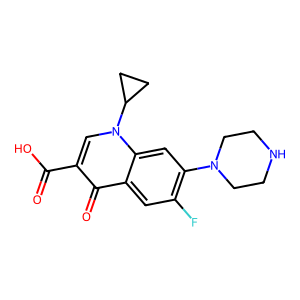

Connectivity Descriptors:
{'Chi0': 16.845, 'Chi1': 11.559, 'mChi1': 0.428, 'Chi2': 10.842, 'Chi3': 9.169, 'Chi4': 7.783, 'Chi5': 6.562, 
'Chi6': 4.99, 'Chi7': 3.938, 'Chi8': 2.712, 'Chi9': 1.859, 'Chi10': 1.083, 'Chi3c': 1.775, 'Chi4c': 0.0, 'Chi4pc': 
0.0, 'Chi3ch': 0.289, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.203, 'knotp': 1.775, 'Chiv0': 13.088, 'Chiv1': 
8.134, 'Chiv2': 6.373, 'Chiv3': 4.645, 'Chiv4': 3.314, 'Chiv5': 2.411, 'Chiv6': 1.481, 'Chiv7': 0.998, 'Chiv8': 
0.609, 'Chiv9': 0.352, 'Chiv10': 0.191, 'dchi0': 3.756, 'dchi1': 3.425, 'dchi2': 4.469, 'dchi3': 4.524, 'dchi4': 
4.47, 'Chiv3c': 0.74, 'Chiv4c': 0.0, 'Chiv4pc': 1.58, 'Chiv3ch': 0.289, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 'Chiv6ch': 
0.093, 'knotpv': 0.84}

Topology Descriptors:
{'W': 1234.0, 'AW': 4.471, 'J': 1.532, 'Tigdi': 3.971, 'Xu': 22.696, 'GMTI': 3.758, 'Pol': 43.0, 'DZ': 54.0, 'Ipc':
5.828, 'BertzCT': 2.946, 'Thara': 90.587, 'Tsch': 5464.0, 'ZM1': 134, 'ZM2': 164, 'MZM1': 7.611, 'MZM2': 1.133, 
'Qindex': 22.0, 'Platt': 80, 'diametert': 11.0, 'radiust': 6.0, 'petitjeant': 0.455, 'Sito': 7.782, 'Hato': 1.946, 
'Geto': 2.11, 'Arto': 2.25, 'GMTIV': 4.228, 'IDET': 760.712, 'IDE': 3.247, 'ISIZ': 226.477, 'IVDE': 35.601, 'TIAC':
72.422, 'Gravto': 76.557, 'Hatov': 3.239, 'Sitov': 30.001, 'Getov': 3.491}

CATS2D Descriptors:
{'CATS_DD0': 1.0, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.0, 'CATS_DD4': 0.0, 'CATS_DD5': 0.0, 'CATS_DD6': 
0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.0, 'CATS_DA0': 0.125, 'CATS_DA1': 0.0, 'CATS_DA2': 0.125, 
'CATS_DA3': 0.125, 'CATS_DA4': 0.25, 'CATS_DA5': 0.0, 'CATS_DA6': 0.0, 'CATS_DA7': 0.125, 'CATS_DA8': 0.125, 
'CATS_DA9': 0.125, 'CATS_DP0': 0, 'CATS_DP1': 0, 'CATS_DP2': 0, 'CATS_DP3': 0, 'CATS_DP4': 0, 'CATS_DP5': 0, 
'CATS_DP6': 0, 'CATS_DP7': 0, 'CATS_DP8': 0, 'CATS_DP9': 0, 'CATS_DN0': 0.0, 'CATS_DN1': 1.0, 'CATS_DN2': 0.0, 
'CATS_DN3': 0.0, 'CATS_DN4': 0.0, 'CATS_DN5': 0.0, 'CATS_DN6': 0.0, 'CATS_DN7': 0.0, 'CATS_DN8': 0.0, 'CATS_DN9': 
0.0, 'CATS_DL0': 0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.083, 'CATS_DL3': 0.0, 'CATS_DL4': 0.083, 'CATS_DL5': 0.167, 
'CATS_DL6': 0.333, 'CATS_DL7': 0.083, 'CATS_DL8': 0.0, 'CATS_DL9': 0.25, 'CATS_AA0': 0.333, 'CATS_AA1': 0.0, 
'CATS_AA2': 0.067, 'CATS_AA3': 0.0, 'CATS_AA4': 0.4, 'CATS_AA5': 0.0, 'CATS_AA6': 0.067, 'CATS_AA7': 0.0, 
'CATS_AA8': 0.133, 'CATS_AA9': 0.0, 'CATS_AP0': 0, 'CATS_AP1': 0, 'CATS_AP2': 0, 'CATS_AP3': 0, 'CATS_AP4': 0, 
'CATS_AP5': 0, 'CATS_AP6': 0, 'CATS_AP7': 0, 'CATS_AP8': 0, 'CATS_AP9': 0, 'CATS_AN0': 0.0, 'CATS_AN1': 0.4, 
'CATS_AN2': 0.0, 'CATS_AN3': 0.4, 'CATS_AN4': 0.0, 'CATS_AN5': 0.0, 'CATS_AN6': 0.0, 'CATS_AN7': 0.2, 'CATS_AN8': 
0.0, 'CATS_AN9': 0.0, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 'CATS_AL2': 0.333, 'CATS_AL3': 0.1, 'CATS_AL4': 0.133, 
'CATS_AL5': 0.067, 'CATS_AL6': 0.367, 'CATS_AL7': 0.0, 'CATS_AL8': 0.0, 'CATS_AL9': 0.0, 'CATS_PP0': 0, 'CATS_PP1':
0, 'CATS_PP2': 0, 'CATS_PP3': 0, 'CATS_PP4': 0, 'CATS_PP5': 0, 'CATS_PP6': 0, 'CATS_PP7': 0, 'CATS_PP8': 0, 
'CATS_PP9': 0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 
'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0, 'CATS_PL1': 0, 'CATS_PL2': 0, 
'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 'CATS_PL7': 0, 'CATS_PL8': 0, 'CATS_PL9': 0, 
'CATS_NN0': 1.0, 'CATS_NN1': 0.0, 'CATS_NN2': 0.0, 'CATS_NN3': 0.0, 'CATS_NN4': 0.0, 'CATS_NN5': 0.0, 'CATS_NN6': 
0.0, 'CATS_NN7': 0.0, 'CATS_NN8': 0.0, 'CATS_NN9': 0.0, 'CATS_NL0': 0.0, 'CATS_NL1': 0.167, 'CATS_NL2': 0.0, 
'CATS_NL3': 0.167, 'CATS_NL4': 0.167, 'CATS_NL5': 0.5, 'CATS_NL6': 0.0, 'CATS_NL7': 0.0, 'CATS_NL8': 0.0, 
'CATS_NL9': 0.0, 'CATS_LL0': 0.286, 'CATS_LL1': 0.095, 'CATS_LL2': 0.095, 'CATS_LL3': 0.095, 'CATS_LL4': 0.333, 
'CATS_LL5': 0.095, 'CATS_LL6': 0.0, 'CATS_LL7': 0.0, 'CATS_LL8': 0.0, 'CATS_LL9': 0.0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 0, 
'Sfinger8': 0, 'Sfinger9': 5, 'Sfinger10': 0, 'Sfinger11': 0, 'Sfinger12': 3, 'Sfinger13': 1, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 1, 'Sfinger17': 3, 'Sfinger18': 2, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 0, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 1, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 0, 'Sfinger30': 1, 'Sfinger31': 0, 'Sfinger32': 1, 'Sfinger33': 0, 'Sfinger34': 1, 'Sfinger35': 2, 
'Sfinger36': 0, 'Sfinger37': 0, 'Sfinger38': 1, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 0.0, 'S8': 
0.0, 'S9': 3.902, 'S10': 0.0, 'S11': 0.0, 'S12': 4.297, 'S13': 0.188, 'S14': 0.0, 'S15': 0.0, 'S16': -1.275, 'S17':
-0.309, 'S18': 0.751, 'S19': 0.0, 'S20': 0.0, 'S21': 0.0, 'S22': 0.0, 'S23': 0.0, 'S24': 3.225, 'S25': 0.0, 'S26': 
0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 0.0, 'S30': 1.956, 'S31': 0.0, 'S32': 1.825, 'S33': 0.0, 'S34': 9.257, 'S35': 
23.758, 'S36': 0.0, 'S37': 0.0, 'S38': 14.608, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 'S44': 
0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 0.0, 
'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 'S63': 
0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 0.0, 
'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 0, 'Smax7': 0, 'Smax8': 0.942, 'Smax9': 0, 'Smax10': 0, 
'Smax11': 1.696, 'Smax12': 0.188, 'Smax13': 0, 'Smax14': 0, 'Smax15': -1.275, 'Smax16': 0.473, 'Smax17': 0.613, 
'Smax18': 0, 'Smax19': 0, 'Smax20': 0, 'Smax21': 0, 'Smax22': 0, 'Smax23': 3.225, 'Smax24': 0, 'Smax25': 0, 
'Smax26': 0, 'Smax27': 0, 'Smax28': 0, 'Smax29': 1.956, 'Smax30': 0, 'Smax31': 1.825, 'Smax32': 0, 'Smax33': 9.257,
'Smax34': 12.421, 'Smax35': 0, 'Smax36': 0, 'Smax37': 14.608, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 
'Smax42': 0, 'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 
0, 'Smax51': 0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 
'Smax59': 0, 'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 
0, 'Smax68': 0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 
'Smax76': 0, 'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 
'Smin6': 0, 'Smin7': 0, 'Smin8': 0.698, 'Smin9': 0, 'Smin10': 0, 'Smin11': 1.195, 'Smin12': 0.188, 'Smin13': 0, 
'Smin14': 0, 'Smin15': -1.275, 'Smin16': -0.48, 'Smin17': 0.137, 'Smin18': 0, 'Smin19': 0, 'Smin20': 0, 'Smin21': 
0, 'Smin22': 0, 'Smin23': 3.225, 'Smin24': 0, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 0, 'Smin29': 1.956, 
'Smin30': 0, 'Smin31': 1.825, 'Smin32': 0, 'Smin33': 9.257, 'Smin34': 11.338, 'Smin35': 0, 'Smin36': 0, 'Smin37': 
14.608, 'Smin38': 0, 'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 
'Smin46': 0, 'Smi

========================================

Processing drug with Drug bank ID: DB00768

Drug in SMILES format: CN(C)CC/C=C\1/C2=CC=CC=C2COC3=C1C=C(C=C3)CC(=O)O

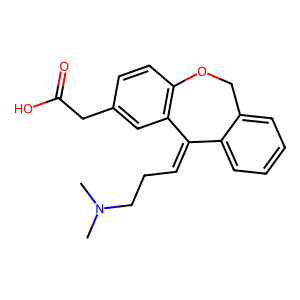

Connectivity Descriptors:
{'Chi0': 17.811, 'Chi1': 12.042, 'mChi1': 0.446, 'Chi2': 11.007, 'Chi3': 8.256, 'Chi4': 7.217, 'Chi5': 6.06, 
'Chi6': 4.694, 'Chi7': 3.841, 'Chi8': 2.96, 'Chi9': 2.111, 'Chi10': 1.47, 'Chi3c': 1.762, 'Chi4c': 0.0, 'Chi4pc': 
0.0, 'Chi3ch': 0.0, 'Chi4ch': 0.0, 'Chi5ch': 0.0, 'Chi6ch': 0.151, 'knotp': 1.762, 'Chiv0': 14.658, 'Chiv1': 8.454,
'Chiv2': 6.557, 'Chiv3': 4.305, 'Chiv4': 3.095, 'Chiv5': 2.187, 'Chiv6': 1.45, 'Chiv7': 0.989, 'Chiv8': 0.639, 
'Chiv9': 0.385, 'Chiv10': 0.218, 'dchi0': 3.153, 'dchi1': 3.588, 'dchi2': 4.45, 'dchi3': 3.951, 'dchi4': 4.122, 
'Chiv3c': 0.876, 'Chiv4c': 0.0, 'Chiv4pc': 1.395, 'Chiv3ch': 0.0, 'Chiv4ch': 0.0, 'Chiv5ch': 0.0, 'Chiv6ch': 0.052,
'knotpv': 0.519}

Topology Descriptors:
{'W': 1448.0, 'AW': 4.827, 'J': 1.72, 'Tigdi': 4.006, 'Xu': 23.737, 'GMTI': 3.784, 'Pol': 41.0, 'DZ': 53.5, 'Ipc': 
5.679, 'BertzCT': 2.908, 'Thara': 92.899, 'Tsch': 6084.0, 'ZM1': 128, 'ZM2': 148, 'MZM1': 8.139, 'MZM2': 1.265, 
'Qindex': 17.0, 'Platt': 74, 'diametert': 11.0, 'radiust': 6.0, 'petitjeant': 0.455, 'Sito': 7.73, 'Hato': 1.899, 
'Geto': 2.038, 'Arto': 2.16, 'GMTIV': 4.199, 'IDET': 856.875, 'IDE': 3.336, 'ISIZ': 268.078, 'IVDE': 35.991, 
'TIAC': 67.043, 'Gravto': 72.742, 'Hatov': 2.732, 'Sitov': 28.068, 'Getov': 3.073}

CATS2D Descriptors:
{'CATS_DD0': 1.0, 'CATS_DD1': 0.0, 'CATS_DD2': 0.0, 'CATS_DD3': 0.0, 'CATS_DD4': 0.0, 'CATS_DD5': 0.0, 'CATS_DD6': 
0.0, 'CATS_DD7': 0.0, 'CATS_DD8': 0.0, 'CATS_DD9': 0.0, 'CATS_DA0': 0.333, 'CATS_DA1': 0.0, 'CATS_DA2': 0.333, 
'CATS_DA3': 0.0, 'CATS_DA4': 0.0, 'CATS_DA5': 0.0, 'CATS_DA6': 0.0, 'CATS_DA7': 0.333, 'CATS_DA8': 0.0, 'CATS_DA9':
0.0, 'CATS_DP0': 0, 'CATS_DP1': 0, 'CATS_DP2': 0, 'CATS_DP3': 0, 'CATS_DP4': 0, 'CATS_DP5': 0, 'CATS_DP6': 0, 
'CATS_DP7': 0, 'CATS_DP8': 0, 'CATS_DP9': 0, 'CATS_DN0': 0.0, 'CATS_DN1': 1.0, 'CATS_DN2': 0.0, 'CATS_DN3': 0.0, 
'CATS_DN4': 0.0, 'CATS_DN5': 0.0, 'CATS_DN6': 0.0, 'CATS_DN7': 0.0, 'CATS_DN8': 0.0, 'CATS_DN9': 0.0, 'CATS_DL0': 
0.0, 'CATS_DL1': 0.0, 'CATS_DL2': 0.071, 'CATS_DL3': 0.071, 'CATS_DL4': 0.143, 'CATS_DL5': 0.143, 'CATS_DL6': 
0.071, 'CATS_DL7': 0.143, 'CATS_DL8': 0.214, 'CATS_DL9': 0.143, 'CATS_AA0': 0.5, 'CATS_AA1': 0.0, 'CATS_AA2': 
0.125, 'CATS_AA3': 0.0, 'CATS_AA4': 0.0, 'CATS_AA5': 0.0, 'CATS_AA6': 0.0, 'CATS_AA7': 0.375, 'CATS_AA8': 0.0, 
'CATS_AA9': 0.0, 'CATS_AP0': 0, 'CATS_AP1': 0, 'CATS_AP2': 0, 'CATS_AP3': 0, 'CATS_AP4': 0, 'CATS_AP5': 0, 
'CATS_AP6': 0, 'CATS_AP7': 0, 'CATS_AP8': 0, 'CATS_AP9': 0, 'CATS_AN0': 0.0, 'CATS_AN1': 0.5, 'CATS_AN2': 0.0, 
'CATS_AN3': 0.0, 'CATS_AN4': 0.0, 'CATS_AN5': 0.0, 'CATS_AN6': 0.25, 'CATS_AN7': 0.0, 'CATS_AN8': 0.0, 'CATS_AN9': 
0.25, 'CATS_AL0': 0.0, 'CATS_AL1': 0.0, 'CATS_AL2': 0.103, 'CATS_AL3': 0.138, 'CATS_AL4': 0.155, 'CATS_AL5': 0.155,
'CATS_AL6': 0.086, 'CATS_AL7': 0.138, 'CATS_AL8': 0.155, 'CATS_AL9': 0.069, 'CATS_PP0': 0, 'CATS_PP1': 0, 
'CATS_PP2': 0, 'CATS_PP3': 0, 'CATS_PP4': 0, 'CATS_PP5': 0, 'CATS_PP6': 0, 'CATS_PP7': 0, 'CATS_PP8': 0, 
'CATS_PP9': 0, 'CATS_PN0': 0, 'CATS_PN1': 0, 'CATS_PN2': 0, 'CATS_PN3': 0, 'CATS_PN4': 0, 'CATS_PN5': 0, 
'CATS_PN6': 0, 'CATS_PN7': 0, 'CATS_PN8': 0, 'CATS_PN9': 0, 'CATS_PL0': 0, 'CATS_PL1': 0, 'CATS_PL2': 0, 
'CATS_PL3': 0, 'CATS_PL4': 0, 'CATS_PL5': 0, 'CATS_PL6': 0, 'CATS_PL7': 0, 'CATS_PL8': 0, 'CATS_PL9': 0, 
'CATS_NN0': 1.0, 'CATS_NN1': 0.0, 'CATS_NN2': 0.0, 'CATS_NN3': 0.0, 'CATS_NN4': 0.0, 'CATS_NN5': 0.0, 'CATS_NN6': 
0.0, 'CATS_NN7': 0.0, 'CATS_NN8': 0.0, 'CATS_NN9': 0.0, 'CATS_NL0': 0.0, 'CATS_NL1': 0.067, 'CATS_NL2': 0.067, 
'CATS_NL3': 0.133, 'CATS_NL4': 0.133, 'CATS_NL5': 0.067, 'CATS_NL6': 0.133, 'CATS_NL7': 0.2, 'CATS_NL8': 0.133, 
'CATS_NL9': 0.067, 'CATS_LL0': 0.125, 'CATS_LL1': 0.125, 'CATS_LL2': 0.158, 'CATS_LL3': 0.158, 'CATS_LL4': 0.142, 
'CATS_LL5': 0.142, 'CATS_LL6': 0.1, 'CATS_LL7': 0.042, 'CATS_LL8': 0.008, 'CATS_LL9': 0.0}

EState Descriptors:
{'Sfinger1': 0, 'Sfinger2': 0, 'Sfinger3': 0, 'Sfinger4': 0, 'Sfinger5': 0, 'Sfinger6': 0, 'Sfinger7': 2, 
'Sfinger8': 0, 'Sfinger9': 4, 'Sfinger10': 0, 'Sfinger11': 1, 'Sfinger12': 7, 'Sfinger13': 0, 'Sfinger14': 0, 
'Sfinger15': 0, 'Sfinger16': 2, 'Sfinger17': 5, 'Sfinger18': 0, 'Sfinger19': 0, 'Sfinger20': 0, 'Sfinger21': 0, 
'Sfinger22': 0, 'Sfinger23': 0, 'Sfinger24': 0, 'Sfinger25': 0, 'Sfinger26': 0, 'Sfinger27': 0, 'Sfinger28': 0, 
'Sfinger29': 0, 'Sfinger30': 1, 'Sfinger31': 0, 'Sfinger32': 0, 'Sfinger33': 0, 'Sfinger34': 1, 'Sfinger35': 1, 
'Sfinger36': 1, 'Sfinger37': 0, 'Sfinger38': 0, 'Sfinger39': 0, 'Sfinger40': 0, 'Sfinger41': 0, 'Sfinger42': 0, 
'Sfinger43': 0, 'Sfinger44': 0, 'Sfinger45': 0, 'Sfinger46': 0, 'Sfinger47': 0, 'Sfinger48': 0, 'Sfinger49': 0, 
'Sfinger50': 0, 'Sfinger51': 0, 'Sfinger52': 0, 'Sfinger53': 0, 'Sfinger54': 0, 'Sfinger55': 0, 'Sfinger56': 0, 
'Sfinger57': 0, 'Sfinger58': 0, 'Sfinger59': 0, 'Sfinger60': 0, 'Sfinger61': 0, 'Sfinger62': 0, 'Sfinger63': 0, 
'Sfinger64': 0, 'Sfinger65': 0, 'Sfinger66': 0, 'Sfinger67': 0, 'Sfinger68': 0, 'Sfinger69': 0, 'Sfinger70': 0, 
'Sfinger71': 0, 'Sfinger72': 0, 'Sfinger73': 0, 'Sfinger74': 0, 'Sfinger75': 0, 'Sfinger76': 0, 'Sfinger77': 0, 
'Sfinger78': 0, 'Sfinger79': 0, 'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.0, 'S5': 0.0, 'S6': 0.0, 'S7': 4.114, 
'S8': 0.0, 'S9': 2.405, 'S10': 0.0, 'S11': 2.233, 'S12': 13.918, 'S13': 0.0, 'S14': 0.0, 'S15': 0.0, 'S16': 0.296, 
'S17': 4.874, 'S18': 0.0, 'S19': 0.0, 'S20': 0.0, 'S21': 0.0, 'S22': 0.0, 'S23': 0.0, 'S24': 0.0, 'S25': 0.0, 
'S26': 0.0, 'S27': 0.0, 'S28': 0.0, 'S29': 0.0, 'S30': 2.151, 'S31': 0.0, 'S32': 0.0, 'S33': 0.0, 'S34': 9.101, 
'S35': 11.08, 'S36': 5.994, 'S37': 0.0, 'S38': 0.0, 'S39': 0.0, 'S40': 0.0, 'S41': 0.0, 'S42': 0.0, 'S43': 0.0, 
'S44': 0.0, 'S45': 0.0, 'S46': 0.0, 'S47': 0.0, 'S48': 0.0, 'S49': 0.0, 'S50': 0.0, 'S51': 0.0, 'S52': 0.0, 'S53': 
0.0, 'S54': 0.0, 'S55': 0.0, 'S56': 0.0, 'S57': 0.0, 'S58': 0.0, 'S59': 0.0, 'S60': 0.0, 'S61': 0.0, 'S62': 0.0, 
'S63': 0.0, 'S64': 0.0, 'S65': 0.0, 'S66': 0.0, 'S67': 0.0, 'S68': 0.0, 'S69': 0.0, 'S70': 0.0, 'S71': 0.0, 'S72': 
0.0, 'S73': 0.0, 'S74': 0.0, 'S75': 0.0, 'S76': 0.0, 'S77': 0.0, 'S78': 0.0, 'S79': 0.0, 'Smax0': 0, 'Smax1': 0, 
'Smax2': 0, 'Smax3': 0, 'Smax4': 0, 'Smax5': 0, 'Smax6': 2.057, 'Smax7': 0, 'Smax8': 0.955, 'Smax9': 0, 'Smax10': 
2.233, 'Smax11': 2.11, 'Smax12': 0, 'Smax13': 0, 'Smax14': 0, 'Smax15': 1.122, 'Smax16': 1.16, 'Smax17': 0, 
'Smax18': 0, 'Smax19': 0, 'Smax20': 0, 'Smax21': 0, 'Smax22': 0, 'Smax23': 0, 'Smax24': 0, 'Smax25': 0, 'Smax26': 
0, 'Smax27': 0, 'Smax28': 0, 'Smax29': 2.151, 'Smax30': 0, 'Smax31': 0, 'Smax32': 0, 'Smax33': 9.101, 'Smax34': 
11.08, 'Smax35': 5.994, 'Smax36': 0, 'Smax37': 0, 'Smax38': 0, 'Smax39': 0, 'Smax40': 0, 'Smax41': 0, 'Smax42': 0, 
'Smax43': 0, 'Smax44': 0, 'Smax45': 0, 'Smax46': 0, 'Smax47': 0, 'Smax48': 0, 'Smax49': 0, 'Smax50': 0, 'Smax51': 
0, 'Smax52': 0, 'Smax53': 0, 'Smax54': 0, 'Smax55': 0, 'Smax56': 0, 'Smax57': 0, 'Smax58': 0, 'Smax59': 0, 
'Smax60': 0, 'Smax61': 0, 'Smax62': 0, 'Smax63': 0, 'Smax64': 0, 'Smax65': 0, 'Smax66': 0, 'Smax67': 0, 'Smax68': 
0, 'Smax69': 0, 'Smax70': 0, 'Smax71': 0, 'Smax72': 0, 'Smax73': 0, 'Smax74': 0, 'Smax75': 0, 'Smax76': 0, 
'Smax77': 0, 'Smax78': 0, 'Smin0': 0, 'Smin1': 0, 'Smin2': 0, 'Smin3': 0, 'Smin4': 0, 'Smin5': 0, 'Smin6': 2.057, 
'Smin7': 0, 'Smin8': 0.014, 'Smin9': 0, 'Smin10': 2.233, 'Smin11': 1.834, 'Smin12': 0, 'Smin13': 0, 'Smin14': 0, 
'Smin15': -0.826, 'Smin16': 0.785, 'Smin17': 0, 'Smin18': 0, 'Smin19': 0, 'Smin20': 0, 'Smin21': 0, 'Smin22': 0, 
'Smin23': 0, 'Smin24': 0, 'Smin25': 0, 'Smin26': 0, 'Smin27': 0, 'Smin28': 0, 'Smin29': 2.151, 'Smin30': 0, 
'Smin31': 0, 'Smin32': 0, 'Smin33': 9.101, 'Smin34': 11.08, 'Smin35': 5.994, 'Smin36': 0, 'Smin37': 0, 'Smin38': 0,
'Smin39': 0, 'Smin40': 0, 'Smin41': 0, 'Smin42': 0, 'Smin43': 0, 'Smin44': 0, 'Smin45': 0, 'Smin46': 0, 'Smin47': 
0, 'Smin48': 0, 'Smin49

All molecular descriptors:

{'LabuteASA': 89.695, 'MTPSA': 119.05, 'TPSA1': 119.05, 'slogPVSA0': 11.293, 'slogPVSA1': 37.839, 'slogPVSA2': 
11.468, 'slogPVSA3': 0.0, 'slogPVSA4': 0.0, 'slogPVSA5': 11.122, 'slogPVSA6': 0.0, 'slogPVSA7': 11.164, 
'slogPVSA8': 0.0, 'slogPVSA9': 5.948, 'slogPVSA10': 0.0, 'slogPVSA11': 0.0, 'MRVSA0': 9.843, 'MRVSA1': 0.0, 
'MRVSA2': 19.519, 'MRVSA3': 0.0, 'MRVSA4': 6.731, 'MRVSA5': 18.947, 'MRVSA6': 16.681, 'MRVSA7': 0.0, 'MRVSA8': 0.0,
'MRVSA9': 17.112, 'PEOEVSA0': 15.577, 'PEOEVSA1': 14.346, 'PEOEVSA2': 4.984, 'PEOEVSA3': 4.984, 'PEOEVSA4': 0.0, 
'PEOEVSA5': 0.0, 'PEOEVSA6': 0.0, 'PEOEVSA7': 0.0, 'PEOEVSA8': 19.541, 'PEOEVSA9': 6.731, 'PEOEVSA10': 11.164, 
'PEOEVSA11': 5.948, 'PEOEVSA12': 5.559, 'PEOEVSA13': 0.0, 'EstateVSA0': 0.0, 'EstateVSA1': 36.969, 'EstateVSA2': 
5.647, 'EstateVSA3': 0.0, 'EstateVSA4': 10.894, 'EstateVSA5': 0.0, 'EstateVSA6': 0.0, 'EstateVSA7': 14.952, 
'EstateVSA8': 15.577, 'EstateVSA9': 4.795, 'EstateVSA10': 0.0, 'VSAEstate0': 6.633, 'VSAEstate1': 21.611, 
'VSAEstate2': 8.556, 'VSAEstate3': 5.604, 'VSAEstate4': 0.029, 'VSAEstate5': 0.0, 'VSAEstate6': 1.434, 
'VSAEstate7': 0.3, 'VSAEstate8': 0.0, 'VSAEstate9': 0.0}

{'LabuteASA': 100.854, 'MTPSA': 139.28, 'TPSA1': 139.28, 'slogPVSA0': 11.293, 'slogPVSA1': 49.05, 'slogPVSA2': 
11.468, 'slogPVSA3': 0.0, 'slogPVSA4': 0.0, 'slogPVSA5': 11.122, 'slogPVSA6': 0.0, 'slogPVSA7': 11.164, 
'slogPVSA8': 0.0, 'slogPVSA9': 5.948, 'slogPVSA10': 0.0, 'slogPVSA11': 0.0, 'MRVSA0': 14.95, 'MRVSA1': 0.0, 
'MRVSA2': 19.519, 'MRVSA3': 0.0, 'MRVSA4': 12.835, 'MRVSA5': 18.947, 'MRVSA6': 16.681, 'MRVSA7': 0.0, 'MRVSA8': 
0.0, 'MRVSA9': 17.112, 'PEOEVSA0': 20.684, 'PEOEVSA1': 14.346, 'PEOEVSA2': 4.984, 'PEOEVSA3': 4.984, 'PEOEVSA4': 
0.0, 'PEOEVSA5': 0.0, 'PEOEVSA6': 0.0, 'PEOEVSA7': 0.0, 'PEOEVSA8': 19.541, 'PEOEVSA9': 12.835, 'PEOEVSA10': 
11.164, 'PEOEVSA11': 5.948, 'PEOEVSA12': 5.559, 'PEOEVSA13': 0.0, 'EstateVSA0': 11.663, 'EstateVSA1': 37.057, 
'EstateVSA2': 0.0, 'EstateVSA3': 0.0, 'EstateVSA4': 10.894, 'EstateVSA5': 0.0, 'EstateVSA6': 0.0, 'EstateVSA7': 
14.952, 'EstateVSA8': 20.684, 'EstateVSA9': 4.795, 'EstateVSA10': 0.0, 'VSAEstate0': 6.66, 'VSAEstate1': 21.648, 
'VSAEstate2': 17.711, 'VSAEstate3': 5.433, 'VSAEstate4': -0.018, 'VSAEstate5': 0.0, 'VSAEstate6': 0.68, 
'VSAEstate7': -0.614, 'VSAEstate8': 0.0, 'VSAEstate9': 0.0}

{'LabuteASA': 303.595, 'MTPSA': 193.91, 'TPSA1': 193.91, 'slogPVSA0': 0.0, 'slogPVSA1': 147.647, 'slogPVSA2': 
38.01, 'slogPVSA3': 23.672, 'slogPVSA4': 94.921, 'slogPVSA5': 0.0, 'slogPVSA6': 0.0, 'slogPVSA7': 0.0, 'slogPVSA8':
0.0, 'slogPVSA9': 0.0, 'slogPVSA10': 0.0, 'slogPVSA11': 0.0, 'MRVSA0': 63.543, 'MRVSA1': 0.0, 'MRVSA2': 4.9, 
'MRVSA3': 23.672, 'MRVSA4': 179.177, 'MRVSA5': 21.205, 'MRVSA6': 0.0, 'MRVSA7': 0.0, 'MRVSA8': 0.0, 'MRVSA9': 
11.753, 'PEOEVSA0': 58.854, 'PEOEVSA1': 9.589, 'PEOEVSA2': 0.0, 'PEOEVSA3': 0.0, 'PEOEVSA4': 0.0, 'PEOEVSA5': 
27.695, 'PEOEVSA6': 74.9, 'PEOEVSA7': 37.326, 'PEOEVSA8': 47.64, 'PEOEVSA9': 29.696, 'PEOEVSA10': 12.58, 
'PEOEVSA11': 0.0, 'PEOEVSA12': 0.0, 'PEOEVSA13': 5.969, 'EstateVSA0': 107.535, 'EstateVSA1': 31.408, 'EstateVSA2': 
6.421, 'EstateVSA3': 0.0, 'EstateVSA4': 27.881, 'EstateVSA5': 41.542, 'EstateVSA6': 25.919, 'EstateVSA7': 0.0, 
'EstateVSA8': 28.421, 'EstateVSA9': 35.122, 'EstateVSA10': 0.0, 'VSAEstate0': 37.054, 'VSAEstate1': 29.759, 
'VSAEstate2': 57.61, 'VSAEstate3': -4.839, 'VSAEstate4': -4.977, 'VSAEstate5': -0.324, 'VSAEstate6': -9.708, 
'VSAEstate7': 16.331, 'VSAEstate8': 5.176, 'VSAEstate9': 0.0}

{'LabuteASA': 185.051, 'MTPSA': 268.17, 'TPSA1': 268.17, 'slogPVSA0': 28.668, 'slogPVSA1': 124.263, 'slogPVSA2': 
18.947, 'slogPVSA3': 0.0, 'slogPVSA4': 12.842, 'slogPVSA5': 0.0, 'slogPVSA6': 0.0, 'slogPVSA7': 0.0, 'slogPVSA8': 
0.0, 'slogPVSA9': 0.0, 'slogPVSA10': 0.0, 'slogPVSA11': 0.0, 'MRVSA0': 44.48, 'MRVSA1': 0.0, 'MRVSA2': 0.0, 
'MRVSA3': 28.668, 'MRVSA4': 98.421, 'MRVSA5': 13.152, 'MRVSA6': 0.0, 'MRVSA7': 0.0, 'MRVSA8': 0.0, 'MRVSA9': 0.0, 
'PEOEVSA0': 73.148, 'PEOEVSA1': 0.0, 'PEOEVSA2': 0.0, 'PEOEVSA3': 0.0, 'PEOEVSA4': 0.0, 'PEOEVSA5': 0.0, 
'PEOEVSA6': 12.842, 'PEOEVSA7': 18.628, 'PEOEVSA8': 30.898, 'PEOEVSA9': 36.624, 'PEOEVSA10': 12.58, 'PEOEVSA11': 
0.0, 'PEOEVSA12': 0.0, 'PEOEVSA13': 0.0, 'EstateVSA0': 92.186, 'EstateVSA1': 19.386, 'EstateVSA2': 0.0, 
'EstateVSA3': 0.0, 'EstateVSA4': 0.0, 'EstateVSA5': 0.0, 'EstateVSA6': 0.0, 'EstateVSA7': 0.0, 'EstateVSA8': 
47.616, 'EstateVSA9': 25.533, 'EstateVSA10': 0.0, 'VSAEstate0': 22.716, 'VSAEstate1': 0.0, 'VSAEstate2': 50.71, 
'VSAEstate3': 29.77, 'VSAEstate4': 0.0, 'VSAEstate5': -3.267, 'VSAEstate6': -10.764, 'VSAEstate7': -0.499, 
'VSAEstate8': 0.0, 'VSAEstate9': 0.0}

{'LabuteASA': 122.408, 'MTPSA': 105.51, 'TPSA1': 105.51, 'slogPVSA0': 25.678, 'slogPVSA1': 31.297, 'slogPVSA2': 
6.421, 'slogPVSA3': 0.0, 'slogPVSA4': 11.127, 'slogPVSA5': 18.33, 'slogPVSA6': 0.0, 'slogPVSA7': 0.0, 'slogPVSA8': 
0.0, 'slogPVSA9': 11.766, 'slogPVSA10': 17.249, 'slogPVSA11': 0.0, 'MRVSA0': 14.211, 'MRVSA1': 0.0, 'MRVSA2': 
9.968, 'MRVSA3': 0.0, 'MRVSA4': 6.421, 'MRVSA5': 32.797, 'MRVSA6': 29.456, 'MRVSA7': 0.0, 'MRVSA8': 17.249, 
'MRVSA9': 11.766, 'PEOEVSA0': 25.678, 'PEOEVSA1': 0.0, 'PEOEVSA2': 4.984, 'PEOEVSA3': 4.984, 'PEOEVSA4': 0.0, 
'PEOEVSA5': 0.0, 'PEOEVSA6': 17.696, 'PEOEVSA7': 18.181, 'PEOEVSA8': 21.329, 'PEOEVSA9': 5.818, 'PEOEVSA10': 
11.499, 'PEOEVSA11': 11.698, 'PEOEVSA12': 0.0, 'PEOEVSA13': 0.0, 'EstateVSA0': 0.0, 'EstateVSA1': 5.948, 
'EstateVSA2': 29.487, 'EstateVSA3': 11.127, 'EstateVSA4': 0.0, 'EstateVSA5': 27.526, 'EstateVSA6': 12.133, 
'EstateVSA7': 9.968, 'EstateVSA8': 25.678, 'EstateVSA9': 0.0, 'EstateVSA10': 0.0, 'VSAEstate0': 15.925, 
'VSAEstate1': 7.9, 'VSAEstate2': 0.0, 'VSAEstate3': 13.051, 'VSAEstate4': 2.228, 'VSAEstate5': 3.717, 'VSAEstate6':
2.143, 'VSAEstate7': 0.0, 'VSAEstate8': 4.704, 'VSAEstate9': 0.0}

{'LabuteASA': 148.732, 'MTPSA': 75.01, 'TPSA1': 75.01, 'slogPVSA0': 15.066, 'slogPVSA1': 60.376, 'slogPVSA2': 0.0, 
'slogPVSA3': 5.817, 'slogPVSA4': 23.324, 'slogPVSA5': 17.058, 'slogPVSA6': 0.0, 'slogPVSA7': 10.903, 'slogPVSA8': 
0.0, 'slogPVSA9': 10.078, 'slogPVSA10': 5.75, 'slogPVSA11': 0.0, 'MRVSA0': 19.028, 'MRVSA1': 0.0, 'MRVSA2': 9.467, 
'MRVSA3': 0.0, 'MRVSA4': 12.966, 'MRVSA5': 44.733, 'MRVSA6': 33.867, 'MRVSA7': 0.0, 'MRVSA8': 5.75, 'MRVSA9': 
22.56, 'PEOEVSA0': 24.21, 'PEOEVSA1': 4.795, 'PEOEVSA2': 9.185, 'PEOEVSA3': 0.0, 'PEOEVSA4': 0.0, 'PEOEVSA5': 0.0, 
'PEOEVSA6': 20.038, 'PEOEVSA7': 32.376, 'PEOEVSA8': 16.945, 'PEOEVSA9': 17.858, 'PEOEVSA10': 11.567, 'PEOEVSA11': 
5.429, 'PEOEVSA12': 0.0, 'PEOEVSA13': 5.969, 'EstateVSA0': 17.215, 'EstateVSA1': 23.598, 'EstateVSA2': 30.043, 
'EstateVSA3': 19.156, 'EstateVSA4': 6.197, 'EstateVSA5': 4.567, 'EstateVSA6': 18.871, 'EstateVSA7': 4.9, 
'EstateVSA8': 4.737, 'EstateVSA9': 19.086, 'EstateVSA10': 0.0, 'VSAEstate0': 22.557, 'VSAEstate1': 28.085, 
'VSAEstate2': 9.363, 'VSAEstate3': -0.224, 'VSAEstate4': -1.543, 'VSAEstate5': 0.994, 'VSAEstate6': 1.343, 
'VSAEstate7': 5.076, 'VSAEstate8': 2.015, 'VSAEstate9': 0.0}

{'LabuteASA': 137.043, 'MTPSA': 74.57, 'TPSA1': 74.57, 'slogPVSA0': 15.645, 'slogPVSA1': 41.822, 'slogPVSA2': 0.0, 
'slogPVSA3': 5.817, 'slogPVSA4': 29.241, 'slogPVSA5': 23.124, 'slogPVSA6': 0.0, 'slogPVSA7': 10.903, 'slogPVSA8': 
0.0, 'slogPVSA9': 10.078, 'slogPVSA10': 0.0, 'slogPVSA11': 0.0, 'MRVSA0': 14.291, 'MRVSA1': 0.0, 'MRVSA2': 9.884, 
'MRVSA3': 0.0, 'MRVSA4': 18.883, 'MRVSA5': 31.079, 'MRVSA6': 39.934, 'MRVSA7': 0.0, 'MRVSA8': 0.0, 'MRVSA9': 22.56,
'PEOEVSA0': 19.89, 'PEOEVSA1': 4.795, 'PEOEVSA2': 9.185, 'PEOEVSA3': 0.0, 'PEOEVSA4': 0.0, 'PEOEVSA5': 0.0, 
'PEOEVSA6': 24.974, 'PEOEVSA7': 43.804, 'PEOEVSA8': 11.204, 'PEOEVSA9': 11.381, 'PEOEVSA10': 0.0, 'PEOEVSA11': 
5.429, 'PEOEVSA12': 0.0, 'PEOEVSA13': 5.969, 'EstateVSA0': 17.215, 'EstateVSA1': 16.992, 'EstateVSA2': 24.294, 
'EstateVSA3': 25.931, 'EstateVSA4': 12.263, 'EstateVSA5': 6.066, 'EstateVSA6': 9.467, 'EstateVSA7': 5.317, 
'EstateVSA8': 0.0, 'EstateVSA9': 19.086, 'EstateVSA10': 0.0, 'VSAEstate0': 16.432, 'VSAEstate1': 25.715, 
'VSAEstate2': 12.62, 'VSAEstate3': 0.159, 'VSAEstate4': -1.755, 'VSAEstate5': 3.078, 'VSAEstate6': 3.291, 
'VSAEstate7': 2.961, 'VSAEstate8': 0.0, 'VSAEstate9': 0.0}

{'LabuteASA': 147.907, 'MTPSA': 49.77, 'TPSA1': 49.77, 'slogPVSA0': 4.737, 'slogPVSA1': 36.616, 'slogPVSA2': 
17.822, 'slogPVSA3': 0.0, 'slogPVSA4': 28.675, 'slogPVSA5': 48.541, 'slogPVSA6': 0.0, 'slogPVSA7': 5.573, 
'slogPVSA8': 0.0, 'slogPVSA9': 0.0, 'slogPVSA10': 5.75, 'slogPVSA11': 0.0, 'MRVSA0': 14.638, 'MRVSA1': 0.0, 
'MRVSA2': 4.9, 'MRVSA3': 0.0, 'MRVSA4': 19.449, 'MRVSA5': 20.64, 'MRVSA6': 70.794, 'MRVSA7': 0.0, 'MRVSA8': 5.75, 
'MRVSA9': 11.542, 'PEOEVSA0': 14.743, 'PEOEVSA1': 4.795, 'PEOEVSA2': 0.0, 'PEOEVSA3': 0.0, 'PEOEVSA4': 0.0, 
'PEOEVSA5': 36.408, 'PEOEVSA6': 54.912, 'PEOEVSA7': 12.108, 'PEOEVSA8': 6.421, 'PEOEVSA9': 12.356, 'PEOEVSA10': 
0.0, 'PEOEVSA11': 0.0, 'PEOEVSA12': 0.0, 'PEOEVSA13': 5.969, 'EstateVSA0': 5.969, 'EstateVSA1': 6.421, 
'EstateVSA2': 6.607, 'EstateVSA3': 46.542, 'EstateVSA4': 0.0, 'EstateVSA5': 0.0, 'EstateVSA6': 30.332, 
'EstateVSA7': 37.204, 'EstateVSA8': 9.843, 'EstateVSA9': 4.795, 'EstateVSA10': 0.0, 'VSAEstate0': 5.994, 
'VSAEstate1': 13.231, 'VSAEstate2': 9.101, 'VSAEstate3': 5.189, 'VSAEstate4': -0.019, 'VSAEstate5': 13.918, 
'VSAEstate6': 3.163, 'VSAEstate7': 1.475, 'VSAEstate8': 4.114, 'VSAEstate9': 0.0}

All data has been saved to output\molecular_descriptors.json

File saved at: C:\biopython\output\molecular_descriptors.json

In [7]:
mols_dec = []

# Directory to save the output file
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, "molecular_descriptors.json")

# Process each DrugBank SMILES and calculate descriptors
for dbid, smiles in smiles_dict.items():
    if "Error" not in smiles:
        console.print("\n\n")
        console.print("[bold blue]=[/bold blue]" * 40)
        console.print(f"\n[bold]Processing drug with Drug bank ID:[/bold] [bold green]{dbid}[/bold green]")
        mol = Chem.MolFromSmiles(smiles)
        console.print(f"Drug in SMILES format: {smiles}")  
        if mol is None:
            console.print(f"[bold red]Error:[/bold red] Could not generate molecule for SMILES {smiles}")
            continue
        
        # Calculate connectivity, topology, and CATS2D descriptors
        connectivity_desc = connectivity.GetConnectivity(mol)
        topology_desc = topology.GetTopology(mol)
        cats_desc = CATS2D(mol, PathLength=10, scale=3)  # CATS2D descriptor calculation
        
        # PyMolecule instance for estate descriptor
        pymol = Pymolecule.PyMolecule()
        pymol.ReadMolFromSmile(smiles)
        estate_desc = pymol.GetEstate()

        # Display molecular structure using RDKit
        display(Draw.MolToImage(mol))
        
        # Print descriptors for each molecule in colored format
        console.print(f"[bold green]Connectivity Descriptors:[/bold green]\n{connectivity_desc}")
        console.print(f"[bold yellow]Topology Descriptors:[/bold yellow]\n{topology_desc}")
        console.print(f"[bold blue]CATS2D Descriptors:[/bold blue]\n{cats_desc}")
        console.print(f"[bold green]EState Descriptors:[/bold green]\n{estate_desc}")

        
        # Calculate MOE descriptors
        mol_des = moe.GetMOE(mol)
        
        # Store all descriptors in a dictionary
        descriptor_data = {
            "drugbank_id": dbid,
            "smiles": smiles,
            "topology_count": len(topology_desc),
            "cats2d": cats_desc,
            "estate_count": len(estate_desc),
            "moe_descriptors": mol_des
        }

        # Append descriptor dictionary to list
        mols_dec.append(mol_des)
        

# Final output of all descriptors in mols_dec
console.print("\n[bold red]All molecular descriptors:[/bold red]")
for desc in mols_dec:
   console.print(f"[bold black]{desc}[/bold black]")

# Save all data to a JSON file
with open(output_path, "w") as file:
    json.dump(mols_dec, file, indent=4)

console.print(f"\n[bold red]All data has been saved to {output_path}[/bold red]")
console.print(f"File saved at: {os.path.abspath(output_path)}")

# Protein Descriptor Calculation Script

In [10]:

seqs = [
    "ELVMTQSPVSLAVTPGEPASISCRSSQSLLFSNGFHYLDWYLQKPGQSPQLLIYLGSSRASGVPDRFSGSGSGSDFTLKISRVEAEDVGVYYCMQALHNPLTFGGGTKLEIKGGSSRSSEVQLVQSGGGLVKPGGSLRLSCVGSGFTFTNAWMSWVRQAPGKGLEWVGRMKSKTYGWTTEFATAVEGRFTMSRDDSKNTLYLQMNSLKTEDTAVYYCSTDDYDFWGQGTMVTVSSASTK",
    "ELVMTQSPVSLAVTPGEPASISCRSSQSLLFSNGFHYLDWYLQKPGQSPQLLIYLGSSRASGVPDRFSGSGSGSDFTLKISRVEAEDVGVYYCMQALHNPLTFGGGTKLEIK",
    "EVQLVQSGGGLVKPGGSLRLSCVGSGFTFTNAWMSWVRQAPGKGLEWVGRMKSKTYGWTTEFATAVEGRFTMSRDDSKNTLYLQMNSLKTEDTAVYYCSTDDYDFWGQGTMVTVSSASTK"
]  # Add more protein sequences as needed

# Directory to save the output file
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, "protein_descriptors.json")

# List to store molecular descriptors for each protein sequence
seqs_dec = []

# Process each protein sequence
for seq in seqs:
    console.print("\n\n")
    console.print("[bold blue]=[/bold blue]" * 40)
    console.print(f"\n[bold green]Processing descriptors for sequence[/bold green]")

    # Calculate AA Composition (AAC)
    AAC = AAComposition.CalculateAAComposition(seq)

    # Calculate CTD (Composition, Transition, Distribution)
    CTD_desc = CTD.CalculateC(seq)

    # Calculate PSEAAC (Pseudo Amino Acid Composition)
    # Add your function for PSEAAC if available, for example:
    # PSEAAC_desc = PseAAC.CalculatePseAAC(seq)

    # Store descriptors in a dictionary
    descriptor_data = {
        "sequence": seq,
        "AAC": AAC,
        "CTD": CTD_desc,
        # Add PSEAAC_desc if implemented
    }

    # Append the descriptor data to the list
    seqs_dec.append(descriptor_data)

    # Print AA composition and CTD descriptors
    console.print(f"[bold cyan]AA Composition:[/bold cyan]\n{AAC}")
    console.print(f"[bold yellow]CTD Descriptors:[/bold yellow]\n{CTD_desc}")
    # console.print(f"[bold green]PSEAAC Descriptors:[/bold green]\n{PSEAAC_desc}")

# Final output of all descriptors in seqs_dec
#console.print("\n[bold red]All protein descriptors:[/bold red]")
#for desc in seqs_dec:
#    console.print(f"[bold black]{desc}[/bold black]")

# Save all data to a JSON file
with open(output_path, "w") as file:
    json.dump(seqs_dec, file, indent=4)

console.print(f"\n[bold red]All data has been saved to {output_path}[/bold red]")
console.print(f"File saved at: {os.path.abspath(output_path)}")


========================================

Processing descriptors for sequence

AA Composition:
{'A': 4.603, 'R': 4.184, 'N': 2.092, 'D': 4.184, 'C': 1.674, 'E': 4.184, 'Q': 4.603, 'G': 11.715, 'H': 0.837, 'I': 
1.674, 'L': 8.787, 'K': 4.603, 'M': 2.929, 'F': 4.184, 'P': 3.766, 'S': 14.226, 'T': 7.95, 'W': 2.51, 'Y': 4.184, 
'V': 7.113}

CTD Descriptors:
{'_PolarizabilityC1': 0.427, '_PolarizabilityC2': 0.339, '_PolarizabilityC3': 0.234, '_SolventAccessibilityC1': 
0.423, '_SolventAccessibilityC2': 0.238, '_SolventAccessibilityC3': 0.339, '_SecondaryStrC1': 0.347, 
'_SecondaryStrC2': 0.293, '_SecondaryStrC3': 0.36, '_ChargeC1': 0.088, '_ChargeC2': 0.828, '_ChargeC3': 0.084, 
'_PolarityC1': 0.331, '_PolarityC2': 0.146, '_PolarityC3': 0.096, '_NormalizedVDWVC1': 0.464, '_NormalizedVDWVC2': 
0.285, '_NormalizedVDWVC3': 0.234, '_HydrophobicityC1': 0.238, '_HydrophobicityC2': 0.473, '_HydrophobicityC3': 
0.289}

========================================

Processing descriptors for sequence

AA Composition:
{'A': 4.464, 'R': 3.571, 'N': 1.786, 'D': 3.571, 'C': 1.786, 'E': 4.464, 'Q': 5.357, 'G': 10.714, 'H': 1.786, 'I': 
3.571, 'L': 11.607, 'K': 3.571, 'M': 1.786, 'F': 4.464, 'P': 6.25, 'S': 15.179, 'T': 4.464, 'W': 0.893, 'Y': 4.464,
'V': 6.25}

CTD Descriptors:
{'_PolarizabilityC1': 0.384, '_PolarizabilityC2': 0.411, '_PolarizabilityC3': 0.205, '_SolventAccessibilityC1': 
0.438, '_SolventAccessibilityC2': 0.223, '_SolventAccessibilityC3': 0.339, '_SecondaryStrC1': 0.366, 
'_SecondaryStrC2': 0.259, '_SecondaryStrC3': 0.375, '_ChargeC1': 0.071, '_ChargeC2': 0.848, '_ChargeC3': 0.08, 
'_PolarityC1': 0.348, '_PolarityC2': 0.179, '_PolarityC3': 0.089, '_NormalizedVDWVC1': 0.446, '_NormalizedVDWVC2': 
0.33, '_NormalizedVDWVC3': 0.205, '_HydrophobicityC1': 0.223, '_HydrophobicityC2': 0.473, '_HydrophobicityC3': 
0.304}

========================================

Processing descriptors for sequence

AA Composition:
{'A': 5.0, 'R': 4.167, 'N': 2.5, 'D': 5.0, 'C': 1.667, 'E': 4.167, 'Q': 4.167, 'G': 11.667, 'H': 0.0, 'I': 0.0, 
'L': 6.667, 'K': 5.833, 'M': 4.167, 'F': 4.167, 'P': 1.667, 'S': 10.833, 'T': 11.667, 'W': 4.167, 'Y': 4.167, 'V': 
8.333}

CTD Descriptors:
{'_PolarizabilityC1': 0.442, '_PolarizabilityC2': 0.292, '_PolarizabilityC3': 0.267, '_SolventAccessibilityC1': 
0.417, '_SolventAccessibilityC2': 0.258, '_SolventAccessibilityC3': 0.325, '_SecondaryStrC1': 0.342, 
'_SecondaryStrC2': 0.342, '_SecondaryStrC3': 0.317, '_ChargeC1': 0.1, '_ChargeC2': 0.808, '_ChargeC3': 0.092, 
'_PolarityC1': 0.333, '_PolarityC2': 0.125, '_PolarityC3': 0.1, '_NormalizedVDWVC1': 0.458, '_NormalizedVDWVC2': 
0.258, '_NormalizedVDWVC3': 0.267, '_HydrophobicityC1': 0.258, '_HydrophobicityC2': 0.45, '_HydrophobicityC3': 
0.292}

All data has been saved to output\protein_descriptors.json

File saved at: C:\biopython\output\protein_descriptors.json

# Interaction Results between Drugs and proteins

In [13]:
# Assuming mols_dec and seqs_dec are already available from previous steps.

interaction_results = []

# Path to save the output PDF
output_pdf_path = "output/interaction_results.pdf"

# Create a PDF canvas
c = canvas.Canvas(output_pdf_path, pagesize=letter)
width, height = letter  # Define the size of the page

# Set up the initial text for the PDF file
c.setFont("Helvetica", 10)
y_position = height - 40  # Starting Y position for writing in the PDF

# Write the header in the PDF
c.drawString(30, y_position, "Interaction Results between Drugs and Proteins")
y_position -= 20


# Loop through the molecular descriptors (drugs)
for mol_desc in mols_dec:
    drug_descriptor = mol_desc  # Assuming mol_desc contains the relevant drug descriptor
    
    # Process each protein sequence
    for seq in seqs_dec:
        protein_descriptor = seq[
        "AAC"]  # Assuming using AAC descriptor, adjust as needed
        
        # Calculate the interaction between the drug and protein descriptors
        interaction_result = CalculateInteraction2(drug_descriptor, protein_descriptor)

        # Store the interaction results
        interaction_data = {
            "drug_descriptor": drug_descriptor,
            "protein_descriptor": protein_descriptor,
            "interaction_result": interaction_result
        }
        
        interaction_results.append(interaction_data)
        console.print("\n\n\n")
        console.print("[bold blue]=[/bold blue]" * 40)
        # Print the interaction result to console
        console.print(f"Interaction result between drug and protein: {interaction_result}")

        # Write interaction result to the PDF
        c.drawString(30, y_position, f"Interaction: {interaction_result}")
        y_position -= 15
        
        if y_position <= 40:  # Check if we need to create a new page
            c.showPage()  # Create a new page
            c.setFont("Helvetica", 10)
            y_position = height - 40  # Reset Y position for the new page

# Save the interaction results to a JSON file
interaction_output_path = "output/interaction_results.json"
with open(interaction_output_path, "w") as file:
    json.dump(interaction_results, file, indent=4)

# Finalize the PDF file
c.save()

# Notify the user that the data has been saved
console.print(f"\n[bold red]Interaction data has been saved to {interaction_output_path}[/bold red]")
console.print(f"PDF file saved at: {os.path.abspath(output_pdf_path)}")


========================================

Interaction result between drug and protein: {'LabuteASA*A': 412.866, 'LabuteASA*R': 375.284, 'LabuteASA*N': 
187.642, 'LabuteASA*D': 375.284, 'LabuteASA*C': 150.149, 'LabuteASA*E': 375.284, 'LabuteASA*Q': 412.866, 
'LabuteASA*G': 1050.777, 'LabuteASA*H': 75.075, 'LabuteASA*I': 150.149, 'LabuteASA*L': 788.15, 'LabuteASA*K': 
412.866, 'LabuteASA*M': 262.717, 'LabuteASA*F': 375.284, 'LabuteASA*P': 337.791, 'LabuteASA*S': 1276.001, 
'LabuteASA*T': 713.075, 'LabuteASA*W': 225.134, 'LabuteASA*Y': 375.284, 'LabuteASA*V': 638.001, 'MTPSA*A': 547.987,
'MTPSA*R': 498.105, 'MTPSA*N': 249.053, 'MTPSA*D': 498.105, 'MTPSA*C': 199.29, 'MTPSA*E': 498.105, 'MTPSA*Q': 
547.987, 'MTPSA*G': 1394.671, 'MTPSA*H': 99.645, 'MTPSA*I': 199.29, 'MTPSA*L': 1046.092, 'MTPSA*K': 547.987, 
'MTPSA*M': 348.697, 'MTPSA*F': 498.105, 'MTPSA*P': 448.342, 'MTPSA*S': 1693.605, 'MTPSA*T': 946.447, 'MTPSA*W': 
298.815, 'MTPSA*Y': 498.105, 'MTPSA*V': 846.803, 'TPSA1*A': 547.987, 'TPSA1*R': 498.105, 'TPSA1*N': 249.053, 
'TPSA1*D': 498.105, 'TPSA1*C': 199.29, 'TPSA1*E': 498.105, 'TPSA1*Q': 547.987, 'TPSA1*G': 1394.671, 'TPSA1*H': 
99.645, 'TPSA1*I': 199.29, 'TPSA1*L': 1046.092, 'TPSA1*K': 547.987, 'TPSA1*M': 348.697, 'TPSA1*F': 498.105, 
'TPSA1*P': 448.342, 'TPSA1*S': 1693.605, 'TPSA1*T': 946.447, 'TPSA1*W': 298.815, 'TPSA1*Y': 498.105, 'TPSA1*V': 
846.803, 'slogPVSA0*A': 51.982, 'slogPVSA0*R': 47.25, 'slogPVSA0*N': 23.625, 'slogPVSA0*D': 47.25, 'slogPVSA0*C': 
18.904, 'slogPVSA0*E': 47.25, 'slogPVSA0*Q': 51.982, 'slogPVSA0*G': 132.297, 'slogPVSA0*H': 9.452, 'slogPVSA0*I': 
18.904, 'slogPVSA0*L': 99.232, 'slogPVSA0*K': 51.982, 'slogPVSA0*M': 33.077, 'slogPVSA0*F': 47.25, 'slogPVSA0*P': 
42.529, 'slogPVSA0*S': 160.654, 'slogPVSA0*T': 89.779, 'slogPVSA0*W': 28.345, 'slogPVSA0*Y': 47.25, 'slogPVSA0*V': 
80.327, 'slogPVSA1*A': 174.173, 'slogPVSA1*R': 158.318, 'slogPVSA1*N': 79.159, 'slogPVSA1*D': 158.318, 
'slogPVSA1*C': 63.342, 'slogPVSA1*E': 158.318, 'slogPVSA1*Q': 174.173, 'slogPVSA1*G': 443.284, 'slogPVSA1*H': 
31.671, 'slogPVSA1*I': 63.342, 'slogPVSA1*L': 332.491, 'slogPVSA1*K': 174.173, 'slogPVSA1*M': 110.83, 
'slogPVSA1*F': 158.318, 'slogPVSA1*P': 142.502, 'slogPVSA1*S': 538.298, 'slogPVSA1*T': 300.82, 'slogPVSA1*W': 
94.976, 'slogPVSA1*Y': 158.318, 'slogPVSA1*V': 269.149, 'slogPVSA2*A': 52.787, 'slogPVSA2*R': 47.982, 
'slogPVSA2*N': 23.991, 'slogPVSA2*D': 47.982, 'slogPVSA2*C': 19.197, 'slogPVSA2*E': 47.982, 'slogPVSA2*Q': 52.787, 
'slogPVSA2*G': 134.348, 'slogPVSA2*H': 9.599, 'slogPVSA2*I': 19.197, 'slogPVSA2*L': 100.769, 'slogPVSA2*K': 52.787,
'slogPVSA2*M': 33.59, 'slogPVSA2*F': 47.982, 'slogPVSA2*P': 43.188, 'slogPVSA2*S': 163.144, 'slogPVSA2*T': 91.171, 
'slogPVSA2*W': 28.785, 'slogPVSA2*Y': 47.982, 'slogPVSA2*V': 81.572, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 
'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 
0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 
'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 
0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 'slogPVSA4*D': 0.0, 
'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 
0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 'slogPVSA4*P': 0.0, 
'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 0.0, 'slogPVSA5*A': 
51.195, 'slogPVSA5*R': 46.534, 'slogPVSA5*N': 23.267, 'slogPVSA5*D': 46.534, 'slogPVSA5*C': 18.618, 'slogPVSA5*E': 
46.534, 'slogPVSA5*Q': 51.195, 'slogPVSA5*G': 130.294, 'slogPVSA5*H': 9.309, 'slogPVSA5*I': 18.618, 'slogPVSA5*L': 
97.729, 'slogPVSA5*K': 51.195, 'slogPVSA5*M': 32.576, 'slogPVSA5*F': 46.534, 'slogPVSA5*P': 41.885, 'slogPVSA5*S': 
158.222, 'slogPVSA5*T': 88.42, 'slogPVSA5*W': 27.916, 'slogPVSA5*Y': 46.534, 'slogPVSA5*V':

========================================

Interaction result between drug and protein: {'LabuteASA*A': 400.398, 'LabuteASA*R': 320.301, 'LabuteASA*N': 
160.195, 'LabuteASA*D': 320.301, 'LabuteASA*C': 160.195, 'LabuteASA*E': 400.398, 'LabuteASA*Q': 480.496, 
'LabuteASA*G': 960.992, 'LabuteASA*H': 160.195, 'LabuteASA*I': 320.301, 'LabuteASA*L': 1041.09, 'LabuteASA*K': 
320.301, 'LabuteASA*M': 160.195, 'LabuteASA*F': 400.398, 'LabuteASA*P': 560.594, 'LabuteASA*S': 1361.48, 
'LabuteASA*T': 400.398, 'LabuteASA*W': 80.098, 'LabuteASA*Y': 400.398, 'LabuteASA*V': 560.594, 'MTPSA*A': 531.439, 
'MTPSA*R': 425.128, 'MTPSA*N': 212.623, 'MTPSA*D': 425.128, 'MTPSA*C': 212.623, 'MTPSA*E': 531.439, 'MTPSA*Q': 
637.751, 'MTPSA*G': 1275.502, 'MTPSA*H': 212.623, 'MTPSA*I': 425.128, 'MTPSA*L': 1381.813, 'MTPSA*K': 425.128, 
'MTPSA*M': 212.623, 'MTPSA*F': 531.439, 'MTPSA*P': 744.062, 'MTPSA*S': 1807.06, 'MTPSA*T': 531.439, 'MTPSA*W': 
106.312, 'MTPSA*Y': 531.439, 'MTPSA*V': 744.062, 'TPSA1*A': 531.439, 'TPSA1*R': 425.128, 'TPSA1*N': 212.623, 
'TPSA1*D': 425.128, 'TPSA1*C': 212.623, 'TPSA1*E': 531.439, 'TPSA1*Q': 637.751, 'TPSA1*G': 1275.502, 'TPSA1*H': 
212.623, 'TPSA1*I': 425.128, 'TPSA1*L': 1381.813, 'TPSA1*K': 425.128, 'TPSA1*M': 212.623, 'TPSA1*F': 531.439, 
'TPSA1*P': 744.062, 'TPSA1*S': 1807.06, 'TPSA1*T': 531.439, 'TPSA1*W': 106.312, 'TPSA1*Y': 531.439, 'TPSA1*V': 
744.062, 'slogPVSA0*A': 50.412, 'slogPVSA0*R': 40.327, 'slogPVSA0*N': 20.169, 'slogPVSA0*D': 40.327, 'slogPVSA0*C':
20.169, 'slogPVSA0*E': 50.412, 'slogPVSA0*Q': 60.497, 'slogPVSA0*G': 120.993, 'slogPVSA0*H': 20.169, 'slogPVSA0*I':
40.327, 'slogPVSA0*L': 131.078, 'slogPVSA0*K': 40.327, 'slogPVSA0*M': 20.169, 'slogPVSA0*F': 50.412, 'slogPVSA0*P':
70.581, 'slogPVSA0*S': 171.416, 'slogPVSA0*T': 50.412, 'slogPVSA0*W': 10.085, 'slogPVSA0*Y': 50.412, 'slogPVSA0*V':
70.581, 'slogPVSA1*A': 168.913, 'slogPVSA1*R': 135.123, 'slogPVSA1*N': 67.58, 'slogPVSA1*D': 135.123, 
'slogPVSA1*C': 67.58, 'slogPVSA1*E': 168.913, 'slogPVSA1*Q': 202.704, 'slogPVSA1*G': 405.407, 'slogPVSA1*H': 67.58,
'slogPVSA1*I': 135.123, 'slogPVSA1*L': 439.197, 'slogPVSA1*K': 135.123, 'slogPVSA1*M': 67.58, 'slogPVSA1*F': 
168.913, 'slogPVSA1*P': 236.494, 'slogPVSA1*S': 574.358, 'slogPVSA1*T': 168.913, 'slogPVSA1*W': 33.79, 
'slogPVSA1*Y': 168.913, 'slogPVSA1*V': 236.494, 'slogPVSA2*A': 51.193, 'slogPVSA2*R': 40.952, 'slogPVSA2*N': 
20.482, 'slogPVSA2*D': 40.952, 'slogPVSA2*C': 20.482, 'slogPVSA2*E': 51.193, 'slogPVSA2*Q': 61.434, 'slogPVSA2*G': 
122.868, 'slogPVSA2*H': 20.482, 'slogPVSA2*I': 40.952, 'slogPVSA2*L': 133.109, 'slogPVSA2*K': 40.952, 
'slogPVSA2*M': 20.482, 'slogPVSA2*F': 51.193, 'slogPVSA2*P': 71.675, 'slogPVSA2*S': 174.073, 'slogPVSA2*T': 51.193,
'slogPVSA2*W': 10.241, 'slogPVSA2*Y': 51.193, 'slogPVSA2*V': 71.675, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 
'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 
0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 
'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 
0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 'slogPVSA4*D': 0.0, 
'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 
0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 'slogPVSA4*P': 0.0, 
'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 0.0, 'slogPVSA5*A': 
49.649, 'slogPVSA5*R': 39.717, 'slogPVSA5*N': 19.864, 'slogPVSA5*D': 39.717, 'slogPVSA5*C': 19.864, 'slogPVSA5*E': 
49.649, 'slogPVSA5*Q': 59.581, 'slogPVSA5*G': 119.161, 'slogPVSA5*H': 19.864, 'slogPVSA5*I': 39.717, 'slogPVSA5*L':
129.093, 'slogPVSA5*K': 39.717, 'slogPVSA5*M': 19.864, 'slogPVSA5*F': 49.649, 'slogPVSA5*P': 69.513, 'slogPVSA5*S':
168.821, 'slogPVSA5*T': 49.649, 'slogPVSA5*W': 9.932, 'slogPVSA5*Y': 49.649, 'slogPVSA

========================================

Interaction result between drug and protein: {'LabuteASA*A': 448.475, 'LabuteASA*R': 373.759, 'LabuteASA*N': 
224.237, 'LabuteASA*D': 448.475, 'LabuteASA*C': 149.522, 'LabuteASA*E': 373.759, 'LabuteASA*Q': 373.759, 
'LabuteASA*G': 1046.472, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 597.997, 'LabuteASA*K': 523.191, 
'LabuteASA*M': 373.759, 'LabuteASA*F': 373.759, 'LabuteASA*P': 149.522, 'LabuteASA*S': 971.666, 'LabuteASA*T': 
1046.472, 'LabuteASA*W': 373.759, 'LabuteASA*Y': 373.759, 'LabuteASA*V': 747.428, 'MTPSA*A': 595.25, 'MTPSA*R': 
496.081, 'MTPSA*N': 297.625, 'MTPSA*D': 595.25, 'MTPSA*C': 198.456, 'MTPSA*E': 496.081, 'MTPSA*Q': 496.081, 
'MTPSA*G': 1388.956, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 793.706, 'MTPSA*K': 694.419, 'MTPSA*M': 496.081, 
'MTPSA*F': 496.081, 'MTPSA*P': 198.456, 'MTPSA*S': 1289.669, 'MTPSA*T': 1388.956, 'MTPSA*W': 496.081, 'MTPSA*Y': 
496.081, 'MTPSA*V': 992.044, 'TPSA1*A': 595.25, 'TPSA1*R': 496.081, 'TPSA1*N': 297.625, 'TPSA1*D': 595.25, 
'TPSA1*C': 198.456, 'TPSA1*E': 496.081, 'TPSA1*Q': 496.081, 'TPSA1*G': 1388.956, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 
'TPSA1*L': 793.706, 'TPSA1*K': 694.419, 'TPSA1*M': 496.081, 'TPSA1*F': 496.081, 'TPSA1*P': 198.456, 'TPSA1*S': 
1289.669, 'TPSA1*T': 1388.956, 'TPSA1*W': 496.081, 'TPSA1*Y': 496.081, 'TPSA1*V': 992.044, 'slogPVSA0*A': 56.465, 
'slogPVSA0*R': 47.058, 'slogPVSA0*N': 28.232, 'slogPVSA0*D': 56.465, 'slogPVSA0*C': 18.825, 'slogPVSA0*E': 47.058, 
'slogPVSA0*Q': 47.058, 'slogPVSA0*G': 131.755, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 75.29, 
'slogPVSA0*K': 65.872, 'slogPVSA0*M': 47.058, 'slogPVSA0*F': 47.058, 'slogPVSA0*P': 18.825, 'slogPVSA0*S': 122.337,
'slogPVSA0*T': 131.755, 'slogPVSA0*W': 47.058, 'slogPVSA0*Y': 47.058, 'slogPVSA0*V': 94.105, 'slogPVSA1*A': 
189.195, 'slogPVSA1*R': 157.675, 'slogPVSA1*N': 94.597, 'slogPVSA1*D': 189.195, 'slogPVSA1*C': 63.078, 
'slogPVSA1*E': 157.675, 'slogPVSA1*Q': 157.675, 'slogPVSA1*G': 441.468, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 
'slogPVSA1*L': 252.273, 'slogPVSA1*K': 220.715, 'slogPVSA1*M': 157.675, 'slogPVSA1*F': 157.675, 'slogPVSA1*P': 
63.078, 'slogPVSA1*S': 409.91, 'slogPVSA1*T': 441.468, 'slogPVSA1*W': 157.675, 'slogPVSA1*Y': 157.675, 
'slogPVSA1*V': 315.312, 'slogPVSA2*A': 57.34, 'slogPVSA2*R': 47.787, 'slogPVSA2*N': 28.67, 'slogPVSA2*D': 57.34, 
'slogPVSA2*C': 19.117, 'slogPVSA2*E': 47.787, 'slogPVSA2*Q': 47.787, 'slogPVSA2*G': 133.797, 'slogPVSA2*H': 0.0, 
'slogPVSA2*I': 0.0, 'slogPVSA2*L': 76.457, 'slogPVSA2*K': 66.893, 'slogPVSA2*M': 47.787, 'slogPVSA2*F': 47.787, 
'slogPVSA2*P': 19.117, 'slogPVSA2*S': 124.233, 'slogPVSA2*T': 133.797, 'slogPVSA2*W': 47.787, 'slogPVSA2*Y': 
47.787, 'slogPVSA2*V': 95.563, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 
'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 
0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 
'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 
0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 'slogPVSA4*D': 0.0, 'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 
'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 
0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 'slogPVSA4*P': 0.0, 'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 
'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 0.0, 'slogPVSA5*A': 55.61, 'slogPVSA5*R': 46.345, 
'slogPVSA5*N': 27.805, 'slogPVSA5*D': 55.61, 'slogPVSA5*C': 18.54, 'slogPVSA5*E': 46.345, 'slogPVSA5*Q': 46.345, 
'slogPVSA5*G': 129.76, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 74.15, 'slogPVSA5*K': 64.875, 
'slogPVSA5*M': 46.345, 'slogPVSA5*F': 46.345, 'slogPVSA5*P': 18.54, 'slogPVSA5*S': 120.485, 'slogPVSA5*T': 129.76, 
'slogPVSA5*W': 46.345, 'slogPVSA5*Y': 46.345, 'slogPVSA5*V': 92.68, 'slogPVSA6*A': 0.0, 'slogPVSA6*R'

========================================

Interaction result between drug and protein: {'LabuteASA*A': 464.231, 'LabuteASA*R': 421.973, 'LabuteASA*N': 
210.987, 'LabuteASA*D': 421.973, 'LabuteASA*C': 168.83, 'LabuteASA*E': 421.973, 'LabuteASA*Q': 464.231, 
'LabuteASA*G': 1181.505, 'LabuteASA*H': 84.415, 'LabuteASA*I': 168.83, 'LabuteASA*L': 886.204, 'LabuteASA*K': 
464.231, 'LabuteASA*M': 295.401, 'LabuteASA*F': 421.973, 'LabuteASA*P': 379.816, 'LabuteASA*S': 1434.749, 
'LabuteASA*T': 801.789, 'LabuteASA*W': 253.144, 'LabuteASA*Y': 421.973, 'LabuteASA*V': 717.375, 'MTPSA*A': 641.106,
'MTPSA*R': 582.748, 'MTPSA*N': 291.374, 'MTPSA*D': 582.748, 'MTPSA*C': 233.155, 'MTPSA*E': 582.748, 'MTPSA*Q': 
641.106, 'MTPSA*G': 1631.665, 'MTPSA*H': 116.577, 'MTPSA*I': 233.155, 'MTPSA*L': 1223.853, 'MTPSA*K': 641.106, 
'MTPSA*M': 407.951, 'MTPSA*F': 582.748, 'MTPSA*P': 524.528, 'MTPSA*S': 1981.397, 'MTPSA*T': 1107.276, 'MTPSA*W': 
349.593, 'MTPSA*Y': 582.748, 'MTPSA*V': 990.699, 'TPSA1*A': 641.106, 'TPSA1*R': 582.748, 'TPSA1*N': 291.374, 
'TPSA1*D': 582.748, 'TPSA1*C': 233.155, 'TPSA1*E': 582.748, 'TPSA1*Q': 641.106, 'TPSA1*G': 1631.665, 'TPSA1*H': 
116.577, 'TPSA1*I': 233.155, 'TPSA1*L': 1223.853, 'TPSA1*K': 641.106, 'TPSA1*M': 407.951, 'TPSA1*F': 582.748, 
'TPSA1*P': 524.528, 'TPSA1*S': 1981.397, 'TPSA1*T': 1107.276, 'TPSA1*W': 349.593, 'TPSA1*Y': 582.748, 'TPSA1*V': 
990.699, 'slogPVSA0*A': 51.982, 'slogPVSA0*R': 47.25, 'slogPVSA0*N': 23.625, 'slogPVSA0*D': 47.25, 'slogPVSA0*C': 
18.904, 'slogPVSA0*E': 47.25, 'slogPVSA0*Q': 51.982, 'slogPVSA0*G': 132.297, 'slogPVSA0*H': 9.452, 'slogPVSA0*I': 
18.904, 'slogPVSA0*L': 99.232, 'slogPVSA0*K': 51.982, 'slogPVSA0*M': 33.077, 'slogPVSA0*F': 47.25, 'slogPVSA0*P': 
42.529, 'slogPVSA0*S': 160.654, 'slogPVSA0*T': 89.779, 'slogPVSA0*W': 28.345, 'slogPVSA0*Y': 47.25, 'slogPVSA0*V': 
80.327, 'slogPVSA1*A': 225.777, 'slogPVSA1*R': 205.225, 'slogPVSA1*N': 102.613, 'slogPVSA1*D': 205.225, 
'slogPVSA1*C': 82.11, 'slogPVSA1*E': 205.225, 'slogPVSA1*Q': 225.777, 'slogPVSA1*G': 574.621, 'slogPVSA1*H': 
41.055, 'slogPVSA1*I': 82.11, 'slogPVSA1*L': 431.002, 'slogPVSA1*K': 225.777, 'slogPVSA1*M': 143.667, 
'slogPVSA1*F': 205.225, 'slogPVSA1*P': 184.722, 'slogPVSA1*S': 697.785, 'slogPVSA1*T': 389.947, 'slogPVSA1*W': 
123.115, 'slogPVSA1*Y': 205.225, 'slogPVSA1*V': 348.893, 'slogPVSA2*A': 52.787, 'slogPVSA2*R': 47.982, 
'slogPVSA2*N': 23.991, 'slogPVSA2*D': 47.982, 'slogPVSA2*C': 19.197, 'slogPVSA2*E': 47.982, 'slogPVSA2*Q': 52.787, 
'slogPVSA2*G': 134.348, 'slogPVSA2*H': 9.599, 'slogPVSA2*I': 19.197, 'slogPVSA2*L': 100.769, 'slogPVSA2*K': 52.787,
'slogPVSA2*M': 33.59, 'slogPVSA2*F': 47.982, 'slogPVSA2*P': 43.188, 'slogPVSA2*S': 163.144, 'slogPVSA2*T': 91.171, 
'slogPVSA2*W': 28.785, 'slogPVSA2*Y': 47.982, 'slogPVSA2*V': 81.572, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 
'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 
0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 
'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 
0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 'slogPVSA4*D': 0.0, 
'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 
0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 'slogPVSA4*P': 0.0, 
'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 0.0, 'slogPVSA5*A': 
51.195, 'slogPVSA5*R': 46.534, 'slogPVSA5*N': 23.267, 'slogPVSA5*D': 46.534, 'slogPVSA5*C': 18.618, 'slogPVSA5*E': 
46.534, 'slogPVSA5*Q': 51.195, 'slogPVSA5*G': 130.294, 'slogPVSA5*H': 9.309, 'slogPVSA5*I': 18.618, 'slogPVSA5*L': 
97.729, 'slogPVSA5*K': 51.195, 'slogPVSA5*M': 32.576, 'slogPVSA5*F': 46.534, 'slogPVSA5*P': 41.885, 'slogPVSA5*S': 
158.222, 'slogPVSA5*T': 88.42, 'slogPVSA5*W': 27.916, 'slogPVSA5*Y': 46.534, 'slog

========================================

Interaction result between drug and protein: {'LabuteASA*A': 450.212, 'LabuteASA*R': 360.15, 'LabuteASA*N': 
180.125, 'LabuteASA*D': 360.15, 'LabuteASA*C': 180.125, 'LabuteASA*E': 450.212, 'LabuteASA*Q': 540.275, 
'LabuteASA*G': 1080.55, 'LabuteASA*H': 180.125, 'LabuteASA*I': 360.15, 'LabuteASA*L': 1170.612, 'LabuteASA*K': 
360.15, 'LabuteASA*M': 180.125, 'LabuteASA*F': 450.212, 'LabuteASA*P': 630.337, 'LabuteASA*S': 1530.863, 
'LabuteASA*T': 450.212, 'LabuteASA*W': 90.063, 'LabuteASA*Y': 450.212, 'LabuteASA*V': 630.337, 'MTPSA*A': 621.746, 
'MTPSA*R': 497.369, 'MTPSA*N': 248.754, 'MTPSA*D': 497.369, 'MTPSA*C': 248.754, 'MTPSA*E': 621.746, 'MTPSA*Q': 
746.123, 'MTPSA*G': 1492.246, 'MTPSA*H': 248.754, 'MTPSA*I': 497.369, 'MTPSA*L': 1616.623, 'MTPSA*K': 497.369, 
'MTPSA*M': 248.754, 'MTPSA*F': 621.746, 'MTPSA*P': 870.5, 'MTPSA*S': 2114.131, 'MTPSA*T': 621.746, 'MTPSA*W': 
124.377, 'MTPSA*Y': 621.746, 'MTPSA*V': 870.5, 'TPSA1*A': 621.746, 'TPSA1*R': 497.369, 'TPSA1*N': 248.754, 
'TPSA1*D': 497.369, 'TPSA1*C': 248.754, 'TPSA1*E': 621.746, 'TPSA1*Q': 746.123, 'TPSA1*G': 1492.246, 'TPSA1*H': 
248.754, 'TPSA1*I': 497.369, 'TPSA1*L': 1616.623, 'TPSA1*K': 497.369, 'TPSA1*M': 248.754, 'TPSA1*F': 621.746, 
'TPSA1*P': 870.5, 'TPSA1*S': 2114.131, 'TPSA1*T': 621.746, 'TPSA1*W': 124.377, 'TPSA1*Y': 621.746, 'TPSA1*V': 
870.5, 'slogPVSA0*A': 50.412, 'slogPVSA0*R': 40.327, 'slogPVSA0*N': 20.169, 'slogPVSA0*D': 40.327, 'slogPVSA0*C': 
20.169, 'slogPVSA0*E': 50.412, 'slogPVSA0*Q': 60.497, 'slogPVSA0*G': 120.993, 'slogPVSA0*H': 20.169, 'slogPVSA0*I':
40.327, 'slogPVSA0*L': 131.078, 'slogPVSA0*K': 40.327, 'slogPVSA0*M': 20.169, 'slogPVSA0*F': 50.412, 'slogPVSA0*P':
70.581, 'slogPVSA0*S': 171.416, 'slogPVSA0*T': 50.412, 'slogPVSA0*W': 10.085, 'slogPVSA0*Y': 50.412, 'slogPVSA0*V':
70.581, 'slogPVSA1*A': 218.959, 'slogPVSA1*R': 175.158, 'slogPVSA1*N': 87.603, 'slogPVSA1*D': 175.158, 
'slogPVSA1*C': 87.603, 'slogPVSA1*E': 218.959, 'slogPVSA1*Q': 262.761, 'slogPVSA1*G': 525.522, 'slogPVSA1*H': 
87.603, 'slogPVSA1*I': 175.158, 'slogPVSA1*L': 569.323, 'slogPVSA1*K': 175.158, 'slogPVSA1*M': 87.603, 
'slogPVSA1*F': 218.959, 'slogPVSA1*P': 306.562, 'slogPVSA1*S': 744.53, 'slogPVSA1*T': 218.959, 'slogPVSA1*W': 
43.802, 'slogPVSA1*Y': 218.959, 'slogPVSA1*V': 306.562, 'slogPVSA2*A': 51.193, 'slogPVSA2*R': 40.952, 
'slogPVSA2*N': 20.482, 'slogPVSA2*D': 40.952, 'slogPVSA2*C': 20.482, 'slogPVSA2*E': 51.193, 'slogPVSA2*Q': 61.434, 
'slogPVSA2*G': 122.868, 'slogPVSA2*H': 20.482, 'slogPVSA2*I': 40.952, 'slogPVSA2*L': 133.109, 'slogPVSA2*K': 
40.952, 'slogPVSA2*M': 20.482, 'slogPVSA2*F': 51.193, 'slogPVSA2*P': 71.675, 'slogPVSA2*S': 174.073, 'slogPVSA2*T':
51.193, 'slogPVSA2*W': 10.241, 'slogPVSA2*Y': 51.193, 'slogPVSA2*V': 71.675, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 
0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 
'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 
0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 
'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 'slogPVSA4*D': 
0.0, 'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 0.0, 
'slogPVSA4*I': 0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 'slogPVSA4*P': 
0.0, 'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 0.0, 
'slogPVSA5*A': 49.649, 'slogPVSA5*R': 39.717, 'slogPVSA5*N': 19.864, 'slogPVSA5*D': 39.717, 'slogPVSA5*C': 19.864, 
'slogPVSA5*E': 49.649, 'slogPVSA5*Q': 59.581, 'slogPVSA5*G': 119.161, 'slogPVSA5*H': 19.864, 'slogPVSA5*I': 39.717,
'slogPVSA5*L': 129.093, 'slogPVSA5*K': 39.717, 'slogPVSA5*M': 19.864, 'slogPVSA5*F': 49.649, 'slogPVSA5*P': 69.513,
'slogPVSA5*S': 168.821, 'slogPVSA5*T': 49.649, 'slogPVSA5*W': 9.932, 'slogPVSA5*Y': 49.649, 'slogPVSA5*

========================================

Interaction result between drug and protein: {'LabuteASA*A': 504.27, 'LabuteASA*R': 420.259, 'LabuteASA*N': 
252.135, 'LabuteASA*D': 504.27, 'LabuteASA*C': 168.124, 'LabuteASA*E': 420.259, 'LabuteASA*Q': 420.259, 
'LabuteASA*G': 1176.664, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 672.394, 'LabuteASA*K': 588.281, 
'LabuteASA*M': 420.259, 'LabuteASA*F': 420.259, 'LabuteASA*P': 168.124, 'LabuteASA*S': 1092.551, 'LabuteASA*T': 
1176.664, 'LabuteASA*W': 420.259, 'LabuteASA*Y': 420.259, 'LabuteASA*V': 840.416, 'MTPSA*A': 696.4, 'MTPSA*R': 
580.38, 'MTPSA*N': 348.2, 'MTPSA*D': 696.4, 'MTPSA*C': 232.18, 'MTPSA*E': 580.38, 'MTPSA*Q': 580.38, 'MTPSA*G': 
1624.98, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 928.58, 'MTPSA*K': 812.42, 'MTPSA*M': 580.38, 'MTPSA*F': 
580.38, 'MTPSA*P': 232.18, 'MTPSA*S': 1508.82, 'MTPSA*T': 1624.98, 'MTPSA*W': 580.38, 'MTPSA*Y': 580.38, 'MTPSA*V':
1160.62, 'TPSA1*A': 696.4, 'TPSA1*R': 580.38, 'TPSA1*N': 348.2, 'TPSA1*D': 696.4, 'TPSA1*C': 232.18, 'TPSA1*E': 
580.38, 'TPSA1*Q': 580.38, 'TPSA1*G': 1624.98, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 'TPSA1*L': 928.58, 'TPSA1*K': 
812.42, 'TPSA1*M': 580.38, 'TPSA1*F': 580.38, 'TPSA1*P': 232.18, 'TPSA1*S': 1508.82, 'TPSA1*T': 1624.98, 'TPSA1*W':
580.38, 'TPSA1*Y': 580.38, 'TPSA1*V': 1160.62, 'slogPVSA0*A': 56.465, 'slogPVSA0*R': 47.058, 'slogPVSA0*N': 28.232,
'slogPVSA0*D': 56.465, 'slogPVSA0*C': 18.825, 'slogPVSA0*E': 47.058, 'slogPVSA0*Q': 47.058, 'slogPVSA0*G': 131.755,
'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 75.29, 'slogPVSA0*K': 65.872, 'slogPVSA0*M': 47.058, 
'slogPVSA0*F': 47.058, 'slogPVSA0*P': 18.825, 'slogPVSA0*S': 122.337, 'slogPVSA0*T': 131.755, 'slogPVSA0*W': 
47.058, 'slogPVSA0*Y': 47.058, 'slogPVSA0*V': 94.105, 'slogPVSA1*A': 245.25, 'slogPVSA1*R': 204.391, 'slogPVSA1*N':
122.625, 'slogPVSA1*D': 245.25, 'slogPVSA1*C': 81.766, 'slogPVSA1*E': 204.391, 'slogPVSA1*Q': 204.391, 
'slogPVSA1*G': 572.266, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 327.016, 'slogPVSA1*K': 286.109, 
'slogPVSA1*M': 204.391, 'slogPVSA1*F': 204.391, 'slogPVSA1*P': 81.766, 'slogPVSA1*S': 531.359, 'slogPVSA1*T': 
572.266, 'slogPVSA1*W': 204.391, 'slogPVSA1*Y': 204.391, 'slogPVSA1*V': 408.734, 'slogPVSA2*A': 57.34, 
'slogPVSA2*R': 47.787, 'slogPVSA2*N': 28.67, 'slogPVSA2*D': 57.34, 'slogPVSA2*C': 19.117, 'slogPVSA2*E': 47.787, 
'slogPVSA2*Q': 47.787, 'slogPVSA2*G': 133.797, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 76.457, 
'slogPVSA2*K': 66.893, 'slogPVSA2*M': 47.787, 'slogPVSA2*F': 47.787, 'slogPVSA2*P': 19.117, 'slogPVSA2*S': 124.233,
'slogPVSA2*T': 133.797, 'slogPVSA2*W': 47.787, 'slogPVSA2*Y': 47.787, 'slogPVSA2*V': 95.563, 'slogPVSA3*A': 0.0, 
'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 
0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 
'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 
0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 0.0, 'slogPVSA4*R': 0.0, 'slogPVSA4*N': 0.0, 
'slogPVSA4*D': 0.0, 'slogPVSA4*C': 0.0, 'slogPVSA4*E': 0.0, 'slogPVSA4*Q': 0.0, 'slogPVSA4*G': 0.0, 'slogPVSA4*H': 
0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 0.0, 'slogPVSA4*K': 0.0, 'slogPVSA4*M': 0.0, 'slogPVSA4*F': 0.0, 
'slogPVSA4*P': 0.0, 'slogPVSA4*S': 0.0, 'slogPVSA4*T': 0.0, 'slogPVSA4*W': 0.0, 'slogPVSA4*Y': 0.0, 'slogPVSA4*V': 
0.0, 'slogPVSA5*A': 55.61, 'slogPVSA5*R': 46.345, 'slogPVSA5*N': 27.805, 'slogPVSA5*D': 55.61, 'slogPVSA5*C': 
18.54, 'slogPVSA5*E': 46.345, 'slogPVSA5*Q': 46.345, 'slogPVSA5*G': 129.76, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0,
'slogPVSA5*L': 74.15, 'slogPVSA5*K': 64.875, 'slogPVSA5*M': 46.345, 'slogPVSA5*F': 46.345, 'slogPVSA5*P': 18.54, 
'slogPVSA5*S': 120.485, 'slogPVSA5*T': 129.76, 'slogPVSA5*W': 46.345, 'slogPVSA5*Y': 46.345, 'slogPVSA5*V': 92.68, 
'slogPVSA6*A': 0.0, 'slogPVSA6*R': 0.0, 'slogPVSA6*N': 0.0, 'slogPVSA6*D': 0

========================================

Interaction result between drug and protein: {'LabuteASA*A': 1397.448, 'LabuteASA*R': 1270.241, 'LabuteASA*N': 
635.121, 'LabuteASA*D': 1270.241, 'LabuteASA*C': 508.218, 'LabuteASA*E': 1270.241, 'LabuteASA*Q': 1397.448, 
'LabuteASA*G': 3556.615, 'LabuteASA*H': 254.109, 'LabuteASA*I': 508.218, 'LabuteASA*L': 2667.689, 'LabuteASA*K': 
1397.448, 'LabuteASA*M': 889.23, 'LabuteASA*F': 1270.241, 'LabuteASA*P': 1143.339, 'LabuteASA*S': 4318.942, 
'LabuteASA*T': 2413.58, 'LabuteASA*W': 762.023, 'LabuteASA*Y': 1270.241, 'LabuteASA*V': 2159.471, 'MTPSA*A': 
892.568, 'MTPSA*R': 811.319, 'MTPSA*N': 405.66, 'MTPSA*D': 811.319, 'MTPSA*C': 324.605, 'MTPSA*E': 811.319, 
'MTPSA*Q': 892.568, 'MTPSA*G': 2271.656, 'MTPSA*H': 162.303, 'MTPSA*I': 324.605, 'MTPSA*L': 1703.887, 'MTPSA*K': 
892.568, 'MTPSA*M': 567.962, 'MTPSA*F': 811.319, 'MTPSA*P': 730.265, 'MTPSA*S': 2758.564, 'MTPSA*T': 1541.584, 
'MTPSA*W': 486.714, 'MTPSA*Y': 811.319, 'MTPSA*V': 1379.282, 'TPSA1*A': 892.568, 'TPSA1*R': 811.319, 'TPSA1*N': 
405.66, 'TPSA1*D': 811.319, 'TPSA1*C': 324.605, 'TPSA1*E': 811.319, 'TPSA1*Q': 892.568, 'TPSA1*G': 2271.656, 
'TPSA1*H': 162.303, 'TPSA1*I': 324.605, 'TPSA1*L': 1703.887, 'TPSA1*K': 892.568, 'TPSA1*M': 567.962, 'TPSA1*F': 
811.319, 'TPSA1*P': 730.265, 'TPSA1*S': 2758.564, 'TPSA1*T': 1541.584, 'TPSA1*W': 486.714, 'TPSA1*Y': 811.319, 
'TPSA1*V': 1379.282, 'slogPVSA0*A': 0.0, 'slogPVSA0*R': 0.0, 'slogPVSA0*N': 0.0, 'slogPVSA0*D': 0.0, 'slogPVSA0*C':
0.0, 'slogPVSA0*E': 0.0, 'slogPVSA0*Q': 0.0, 'slogPVSA0*G': 0.0, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 
'slogPVSA0*L': 0.0, 'slogPVSA0*K': 0.0, 'slogPVSA0*M': 0.0, 'slogPVSA0*F': 0.0, 'slogPVSA0*P': 0.0, 'slogPVSA0*S': 
0.0, 'slogPVSA0*T': 0.0, 'slogPVSA0*W': 0.0, 'slogPVSA0*Y': 0.0, 'slogPVSA0*V': 0.0, 'slogPVSA1*A': 679.619, 
'slogPVSA1*R': 617.755, 'slogPVSA1*N': 308.878, 'slogPVSA1*D': 617.755, 'slogPVSA1*C': 247.161, 'slogPVSA1*E': 
617.755, 'slogPVSA1*Q': 679.619, 'slogPVSA1*G': 1729.685, 'slogPVSA1*H': 123.581, 'slogPVSA1*I': 247.161, 
'slogPVSA1*L': 1297.374, 'slogPVSA1*K': 679.619, 'slogPVSA1*M': 432.458, 'slogPVSA1*F': 617.755, 'slogPVSA1*P': 
556.039, 'slogPVSA1*S': 2100.426, 'slogPVSA1*T': 1173.794, 'slogPVSA1*W': 370.594, 'slogPVSA1*Y': 617.755, 
'slogPVSA1*V': 1050.213, 'slogPVSA2*A': 174.96, 'slogPVSA2*R': 159.034, 'slogPVSA2*N': 79.517, 'slogPVSA2*D': 
159.034, 'slogPVSA2*C': 63.629, 'slogPVSA2*E': 159.034, 'slogPVSA2*Q': 174.96, 'slogPVSA2*G': 445.287, 
'slogPVSA2*H': 31.814, 'slogPVSA2*I': 63.629, 'slogPVSA2*L': 333.994, 'slogPVSA2*K': 174.96, 'slogPVSA2*M': 
111.331, 'slogPVSA2*F': 159.034, 'slogPVSA2*P': 143.146, 'slogPVSA2*S': 540.73, 'slogPVSA2*T': 302.18, 
'slogPVSA2*W': 95.405, 'slogPVSA2*Y': 159.034, 'slogPVSA2*V': 270.365, 'slogPVSA3*A': 108.962, 'slogPVSA3*R': 
99.044, 'slogPVSA3*N': 49.522, 'slogPVSA3*D': 99.044, 'slogPVSA3*C': 39.627, 'slogPVSA3*E': 99.044, 'slogPVSA3*Q': 
108.962, 'slogPVSA3*G': 277.317, 'slogPVSA3*H': 19.813, 'slogPVSA3*I': 39.627, 'slogPVSA3*L': 208.006, 
'slogPVSA3*K': 108.962, 'slogPVSA3*M': 69.335, 'slogPVSA3*F': 99.044, 'slogPVSA3*P': 89.149, 'slogPVSA3*S': 
336.758, 'slogPVSA3*T': 188.192, 'slogPVSA3*W': 59.417, 'slogPVSA3*Y': 99.044, 'slogPVSA3*V': 168.379, 
'slogPVSA4*A': 436.921, 'slogPVSA4*R': 397.149, 'slogPVSA4*N': 198.575, 'slogPVSA4*D': 397.149, 'slogPVSA4*C': 
158.898, 'slogPVSA4*E': 397.149, 'slogPVSA4*Q': 436.921, 'slogPVSA4*G': 1112.0, 'slogPVSA4*H': 79.449, 
'slogPVSA4*I': 158.898, 'slogPVSA4*L': 834.071, 'slogPVSA4*K': 436.921, 'slogPVSA4*M': 278.024, 'slogPVSA4*F': 
397.149, 'slogPVSA4*P': 357.472, 'slogPVSA4*S': 1350.346, 'slogPVSA4*T': 754.622, 'slogPVSA4*W': 238.252, 
'slogPVSA4*Y': 397.149, 'slogPVSA4*V': 675.173, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 0.0, 'slogPVSA5*N': 0.0, 
'slogPVSA5*D': 0.0, 'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 'slogPVSA5*G': 0.0, 'slogPVSA5*H': 
0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 0.0, 'slogPVSA5*F': 0.0, 
'slogPVSA5*P': 0.0, 'slogPVSA5*S': 0.

========================================

Interaction result between drug and protein: {'LabuteASA*A': 1355.248, 'LabuteASA*R': 1084.138, 'LabuteASA*N': 
542.221, 'LabuteASA*D': 1084.138, 'LabuteASA*C': 542.221, 'LabuteASA*E': 1355.248, 'LabuteASA*Q': 1626.358, 
'LabuteASA*G': 3252.717, 'LabuteASA*H': 542.221, 'LabuteASA*I': 1084.138, 'LabuteASA*L': 3523.827, 'LabuteASA*K': 
1084.138, 'LabuteASA*M': 542.221, 'LabuteASA*F': 1355.248, 'LabuteASA*P': 1897.469, 'LabuteASA*S': 4608.269, 
'LabuteASA*T': 1355.248, 'LabuteASA*W': 271.11, 'LabuteASA*Y': 1355.248, 'LabuteASA*V': 1897.469, 'MTPSA*A': 
865.614, 'MTPSA*R': 692.453, 'MTPSA*N': 346.323, 'MTPSA*D': 692.453, 'MTPSA*C': 346.323, 'MTPSA*E': 865.614, 
'MTPSA*Q': 1038.776, 'MTPSA*G': 2077.552, 'MTPSA*H': 346.323, 'MTPSA*I': 692.453, 'MTPSA*L': 2250.713, 'MTPSA*K': 
692.453, 'MTPSA*M': 346.323, 'MTPSA*F': 865.614, 'MTPSA*P': 1211.938, 'MTPSA*S': 2943.36, 'MTPSA*T': 865.614, 
'MTPSA*W': 173.162, 'MTPSA*Y': 865.614, 'MTPSA*V': 1211.938, 'TPSA1*A': 865.614, 'TPSA1*R': 692.453, 'TPSA1*N': 
346.323, 'TPSA1*D': 692.453, 'TPSA1*C': 346.323, 'TPSA1*E': 865.614, 'TPSA1*Q': 1038.776, 'TPSA1*G': 2077.552, 
'TPSA1*H': 346.323, 'TPSA1*I': 692.453, 'TPSA1*L': 2250.713, 'TPSA1*K': 692.453, 'TPSA1*M': 346.323, 'TPSA1*F': 
865.614, 'TPSA1*P': 1211.938, 'TPSA1*S': 2943.36, 'TPSA1*T': 865.614, 'TPSA1*W': 173.162, 'TPSA1*Y': 865.614, 
'TPSA1*V': 1211.938, 'slogPVSA0*A': 0.0, 'slogPVSA0*R': 0.0, 'slogPVSA0*N': 0.0, 'slogPVSA0*D': 0.0, 'slogPVSA0*C':
0.0, 'slogPVSA0*E': 0.0, 'slogPVSA0*Q': 0.0, 'slogPVSA0*G': 0.0, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 
'slogPVSA0*L': 0.0, 'slogPVSA0*K': 0.0, 'slogPVSA0*M': 0.0, 'slogPVSA0*F': 0.0, 'slogPVSA0*P': 0.0, 'slogPVSA0*S': 
0.0, 'slogPVSA0*T': 0.0, 'slogPVSA0*W': 0.0, 'slogPVSA0*Y': 0.0, 'slogPVSA0*V': 0.0, 'slogPVSA1*A': 659.096, 
'slogPVSA1*R': 527.247, 'slogPVSA1*N': 263.698, 'slogPVSA1*D': 527.247, 'slogPVSA1*C': 263.698, 'slogPVSA1*E': 
659.096, 'slogPVSA1*Q': 790.945, 'slogPVSA1*G': 1581.89, 'slogPVSA1*H': 263.698, 'slogPVSA1*I': 527.247, 
'slogPVSA1*L': 1713.739, 'slogPVSA1*K': 527.247, 'slogPVSA1*M': 263.698, 'slogPVSA1*F': 659.096, 'slogPVSA1*P': 
922.794, 'slogPVSA1*S': 2241.134, 'slogPVSA1*T': 659.096, 'slogPVSA1*W': 131.849, 'slogPVSA1*Y': 659.096, 
'slogPVSA1*V': 922.794, 'slogPVSA2*A': 169.677, 'slogPVSA2*R': 135.734, 'slogPVSA2*N': 67.886, 'slogPVSA2*D': 
135.734, 'slogPVSA2*C': 67.886, 'slogPVSA2*E': 169.677, 'slogPVSA2*Q': 203.62, 'slogPVSA2*G': 407.239, 
'slogPVSA2*H': 67.886, 'slogPVSA2*I': 135.734, 'slogPVSA2*L': 441.182, 'slogPVSA2*K': 135.734, 'slogPVSA2*M': 
67.886, 'slogPVSA2*F': 169.677, 'slogPVSA2*P': 237.562, 'slogPVSA2*S': 576.954, 'slogPVSA2*T': 169.677, 
'slogPVSA2*W': 33.943, 'slogPVSA2*Y': 169.677, 'slogPVSA2*V': 237.562, 'slogPVSA3*A': 105.672, 'slogPVSA3*R': 
84.533, 'slogPVSA3*N': 42.278, 'slogPVSA3*D': 84.533, 'slogPVSA3*C': 42.278, 'slogPVSA3*E': 105.672, 'slogPVSA3*Q':
126.811, 'slogPVSA3*G': 253.622, 'slogPVSA3*H': 42.278, 'slogPVSA3*I': 84.533, 'slogPVSA3*L': 274.761, 
'slogPVSA3*K': 84.533, 'slogPVSA3*M': 42.278, 'slogPVSA3*F': 105.672, 'slogPVSA3*P': 147.95, 'slogPVSA3*S': 
359.317, 'slogPVSA3*T': 105.672, 'slogPVSA3*W': 21.139, 'slogPVSA3*Y': 105.672, 'slogPVSA3*V': 147.95, 
'slogPVSA4*A': 423.727, 'slogPVSA4*R': 338.963, 'slogPVSA4*N': 169.529, 'slogPVSA4*D': 338.963, 'slogPVSA4*C': 
169.529, 'slogPVSA4*E': 423.727, 'slogPVSA4*Q': 508.492, 'slogPVSA4*G': 1016.984, 'slogPVSA4*H': 169.529, 
'slogPVSA4*I': 338.963, 'slogPVSA4*L': 1101.748, 'slogPVSA4*K': 338.963, 'slogPVSA4*M': 169.529, 'slogPVSA4*F': 
423.727, 'slogPVSA4*P': 593.256, 'slogPVSA4*S': 1440.806, 'slogPVSA4*T': 423.727, 'slogPVSA4*W': 84.764, 
'slogPVSA4*Y': 423.727, 'slogPVSA4*V': 593.256, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 0.0, 'slogPVSA5*N': 0.0, 
'slogPVSA5*D': 0.0, 'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 'slogPVSA5*G': 0.0, 'slogPVSA5*H': 
0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 0.0, 'slogPVSA5*F': 0.0, 
'slogPVSA5*P': 0.0, 'slogPVSA

========================================

Interaction result between drug and protein: {'LabuteASA*A': 1517.975, 'LabuteASA*R': 1265.08, 'LabuteASA*N': 
758.988, 'LabuteASA*D': 1517.975, 'LabuteASA*C': 506.093, 'LabuteASA*E': 1265.08, 'LabuteASA*Q': 1265.08, 
'LabuteASA*G': 3542.043, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 2024.068, 'LabuteASA*K': 1770.87, 
'LabuteASA*M': 1265.08, 'LabuteASA*F': 1265.08, 'LabuteASA*P': 506.093, 'LabuteASA*S': 3288.845, 'LabuteASA*T': 
3542.043, 'LabuteASA*W': 1265.08, 'LabuteASA*Y': 1265.08, 'LabuteASA*V': 2529.857, 'MTPSA*A': 969.55, 'MTPSA*R': 
808.023, 'MTPSA*N': 484.775, 'MTPSA*D': 969.55, 'MTPSA*C': 323.248, 'MTPSA*E': 808.023, 'MTPSA*Q': 808.023, 
'MTPSA*G': 2262.348, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 1292.798, 'MTPSA*K': 1131.077, 'MTPSA*M': 808.023, 
'MTPSA*F': 808.023, 'MTPSA*P': 323.248, 'MTPSA*S': 2100.627, 'MTPSA*T': 2262.348, 'MTPSA*W': 808.023, 'MTPSA*Y': 
808.023, 'MTPSA*V': 1615.852, 'TPSA1*A': 969.55, 'TPSA1*R': 808.023, 'TPSA1*N': 484.775, 'TPSA1*D': 969.55, 
'TPSA1*C': 323.248, 'TPSA1*E': 808.023, 'TPSA1*Q': 808.023, 'TPSA1*G': 2262.348, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 
'TPSA1*L': 1292.798, 'TPSA1*K': 1131.077, 'TPSA1*M': 808.023, 'TPSA1*F': 808.023, 'TPSA1*P': 323.248, 'TPSA1*S': 
2100.627, 'TPSA1*T': 2262.348, 'TPSA1*W': 808.023, 'TPSA1*Y': 808.023, 'TPSA1*V': 1615.852, 'slogPVSA0*A': 0.0, 
'slogPVSA0*R': 0.0, 'slogPVSA0*N': 0.0, 'slogPVSA0*D': 0.0, 'slogPVSA0*C': 0.0, 'slogPVSA0*E': 0.0, 'slogPVSA0*Q': 
0.0, 'slogPVSA0*G': 0.0, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 0.0, 'slogPVSA0*K': 0.0, 
'slogPVSA0*M': 0.0, 'slogPVSA0*F': 0.0, 'slogPVSA0*P': 0.0, 'slogPVSA0*S': 0.0, 'slogPVSA0*T': 0.0, 'slogPVSA0*W': 
0.0, 'slogPVSA0*Y': 0.0, 'slogPVSA0*V': 0.0, 'slogPVSA1*A': 738.235, 'slogPVSA1*R': 615.245, 'slogPVSA1*N': 
369.117, 'slogPVSA1*D': 738.235, 'slogPVSA1*C': 246.128, 'slogPVSA1*E': 615.245, 'slogPVSA1*Q': 615.245, 
'slogPVSA1*G': 1722.598, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 984.363, 'slogPVSA1*K': 861.225, 
'slogPVSA1*M': 615.245, 'slogPVSA1*F': 615.245, 'slogPVSA1*P': 246.128, 'slogPVSA1*S': 1599.46, 'slogPVSA1*T': 
1722.598, 'slogPVSA1*W': 615.245, 'slogPVSA1*Y': 615.245, 'slogPVSA1*V': 1230.342, 'slogPVSA2*A': 190.05, 
'slogPVSA2*R': 158.388, 'slogPVSA2*N': 95.025, 'slogPVSA2*D': 190.05, 'slogPVSA2*C': 63.363, 'slogPVSA2*E': 
158.388, 'slogPVSA2*Q': 158.388, 'slogPVSA2*G': 443.463, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 
253.413, 'slogPVSA2*K': 221.712, 'slogPVSA2*M': 158.388, 'slogPVSA2*F': 158.388, 'slogPVSA2*P': 63.363, 
'slogPVSA2*S': 411.762, 'slogPVSA2*T': 443.463, 'slogPVSA2*W': 158.388, 'slogPVSA2*Y': 158.388, 'slogPVSA2*V': 
316.737, 'slogPVSA3*A': 118.36, 'slogPVSA3*R': 98.641, 'slogPVSA3*N': 59.18, 'slogPVSA3*D': 118.36, 'slogPVSA3*C': 
39.461, 'slogPVSA3*E': 98.641, 'slogPVSA3*Q': 98.641, 'slogPVSA3*G': 276.181, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 
0.0, 'slogPVSA3*L': 157.821, 'slogPVSA3*K': 138.079, 'slogPVSA3*M': 98.641, 'slogPVSA3*F': 98.641, 'slogPVSA3*P': 
39.461, 'slogPVSA3*S': 256.439, 'slogPVSA3*T': 276.181, 'slogPVSA3*W': 98.641, 'slogPVSA3*Y': 98.641, 
'slogPVSA3*V': 197.259, 'slogPVSA4*A': 474.605, 'slogPVSA4*R': 395.536, 'slogPVSA4*N': 237.303, 'slogPVSA4*D': 
474.605, 'slogPVSA4*C': 158.233, 'slogPVSA4*E': 395.536, 'slogPVSA4*Q': 395.536, 'slogPVSA4*G': 1107.443, 
'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 632.838, 'slogPVSA4*K': 553.674, 'slogPVSA4*M': 395.536, 
'slogPVSA4*F': 395.536, 'slogPVSA4*P': 158.233, 'slogPVSA4*S': 1028.279, 'slogPVSA4*T': 1107.443, 'slogPVSA4*W': 
395.536, 'slogPVSA4*Y': 395.536, 'slogPVSA4*V': 790.977, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 0.0, 'slogPVSA5*N': 
0.0, 'slogPVSA5*D': 0.0, 'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 'slogPVSA5*G': 0.0, 
'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 0.0, 'slogPVSA5*F': 
0.0, 'slogPVSA5*P': 0.0, 'slogPVSA5*S': 0.0, 'slogPVSA5*T': 0.0, 'slogPVSA5*W': 0.0, 'slogPVSA5*Y

========================================

Interaction result between drug and protein: {'LabuteASA*A': 851.79, 'LabuteASA*R': 774.253, 'LabuteASA*N': 
387.127, 'LabuteASA*D': 774.253, 'LabuteASA*C': 309.775, 'LabuteASA*E': 774.253, 'LabuteASA*Q': 851.79, 
'LabuteASA*G': 2167.872, 'LabuteASA*H': 154.888, 'LabuteASA*I': 309.775, 'LabuteASA*L': 1626.043, 'LabuteASA*K': 
851.79, 'LabuteASA*M': 542.014, 'LabuteASA*F': 774.253, 'LabuteASA*P': 696.902, 'LabuteASA*S': 2632.536, 
'LabuteASA*T': 1471.155, 'LabuteASA*W': 464.478, 'LabuteASA*Y': 774.253, 'LabuteASA*V': 1316.268, 'MTPSA*A': 
1234.387, 'MTPSA*R': 1122.023, 'MTPSA*N': 561.012, 'MTPSA*D': 1122.023, 'MTPSA*C': 448.917, 'MTPSA*E': 1122.023, 
'MTPSA*Q': 1234.387, 'MTPSA*G': 3141.612, 'MTPSA*H': 224.458, 'MTPSA*I': 448.917, 'MTPSA*L': 2356.41, 'MTPSA*K': 
1234.387, 'MTPSA*M': 785.47, 'MTPSA*F': 1122.023, 'MTPSA*P': 1009.928, 'MTPSA*S': 3814.986, 'MTPSA*T': 2131.952, 
'MTPSA*W': 673.107, 'MTPSA*Y': 1122.023, 'MTPSA*V': 1907.493, 'TPSA1*A': 1234.387, 'TPSA1*R': 1122.023, 'TPSA1*N': 
561.012, 'TPSA1*D': 1122.023, 'TPSA1*C': 448.917, 'TPSA1*E': 1122.023, 'TPSA1*Q': 1234.387, 'TPSA1*G': 3141.612, 
'TPSA1*H': 224.458, 'TPSA1*I': 448.917, 'TPSA1*L': 2356.41, 'TPSA1*K': 1234.387, 'TPSA1*M': 785.47, 'TPSA1*F': 
1122.023, 'TPSA1*P': 1009.928, 'TPSA1*S': 3814.986, 'TPSA1*T': 2131.952, 'TPSA1*W': 673.107, 'TPSA1*Y': 1122.023, 
'TPSA1*V': 1907.493, 'slogPVSA0*A': 131.959, 'slogPVSA0*R': 119.947, 'slogPVSA0*N': 59.973, 'slogPVSA0*D': 119.947,
'slogPVSA0*C': 47.99, 'slogPVSA0*E': 119.947, 'slogPVSA0*Q': 131.959, 'slogPVSA0*G': 335.846, 'slogPVSA0*H': 
23.995, 'slogPVSA0*I': 47.99, 'slogPVSA0*L': 251.906, 'slogPVSA0*K': 131.959, 'slogPVSA0*M': 83.969, 'slogPVSA0*F':
119.947, 'slogPVSA0*P': 107.964, 'slogPVSA0*S': 407.831, 'slogPVSA0*T': 227.911, 'slogPVSA0*W': 71.957, 
'slogPVSA0*Y': 119.947, 'slogPVSA0*V': 203.915, 'slogPVSA1*A': 571.983, 'slogPVSA1*R': 519.916, 'slogPVSA1*N': 
259.958, 'slogPVSA1*D': 519.916, 'slogPVSA1*C': 208.016, 'slogPVSA1*E': 519.916, 'slogPVSA1*Q': 571.983, 
'slogPVSA1*G': 1455.741, 'slogPVSA1*H': 104.008, 'slogPVSA1*I': 208.016, 'slogPVSA1*L': 1091.899, 'slogPVSA1*K': 
571.983, 'slogPVSA1*M': 363.966, 'slogPVSA1*F': 519.916, 'slogPVSA1*P': 467.974, 'slogPVSA1*S': 1767.765, 
'slogPVSA1*T': 987.891, 'slogPVSA1*W': 311.9, 'slogPVSA1*Y': 519.916, 'slogPVSA1*V': 883.883, 'slogPVSA2*A': 
87.213, 'slogPVSA2*R': 79.274, 'slogPVSA2*N': 39.637, 'slogPVSA2*D': 79.274, 'slogPVSA2*C': 31.717, 'slogPVSA2*E': 
79.274, 'slogPVSA2*Q': 87.213, 'slogPVSA2*G': 221.964, 'slogPVSA2*H': 15.859, 'slogPVSA2*I': 31.717, 'slogPVSA2*L':
166.487, 'slogPVSA2*K': 87.213, 'slogPVSA2*M': 55.496, 'slogPVSA2*F': 79.274, 'slogPVSA2*P': 71.354, 'slogPVSA2*S':
269.54, 'slogPVSA2*T': 150.629, 'slogPVSA2*W': 47.557, 'slogPVSA2*Y': 79.274, 'slogPVSA2*V': 134.77, 'slogPVSA3*A':
0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 
'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 
0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 
'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 59.112, 'slogPVSA4*R': 53.731, 
'slogPVSA4*N': 26.865, 'slogPVSA4*D': 53.731, 'slogPVSA4*C': 21.498, 'slogPVSA4*E': 53.731, 'slogPVSA4*Q': 59.112, 
'slogPVSA4*G': 150.444, 'slogPVSA4*H': 10.749, 'slogPVSA4*I': 21.498, 'slogPVSA4*L': 112.843, 'slogPVSA4*K': 
59.112, 'slogPVSA4*M': 37.614, 'slogPVSA4*F': 53.731, 'slogPVSA4*P': 48.363, 'slogPVSA4*S': 182.69, 'slogPVSA4*T': 
102.094, 'slogPVSA4*W': 32.233, 'slogPVSA4*Y': 53.731, 'slogPVSA4*V': 91.345, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 
0.0, 'slogPVSA5*N': 0.0, 'slogPVSA5*D': 0.0, 'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 
'slogPVSA5*G': 0.0, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 
0.0, 'slogPVSA5*F': 0.0, 'slogPVSA5*P': 0.0, 'slogPVSA5*S': 0.0, 'slogPVSA5*T': 0.0,

========================================

Interaction result between drug and protein: {'LabuteASA*A': 826.068, 'LabuteASA*R': 660.817, 'LabuteASA*N': 
330.501, 'LabuteASA*D': 660.817, 'LabuteASA*C': 330.501, 'LabuteASA*E': 826.068, 'LabuteASA*Q': 991.318, 
'LabuteASA*G': 1982.636, 'LabuteASA*H': 330.501, 'LabuteASA*I': 660.817, 'LabuteASA*L': 2147.887, 'LabuteASA*K': 
660.817, 'LabuteASA*M': 330.501, 'LabuteASA*F': 826.068, 'LabuteASA*P': 1156.569, 'LabuteASA*S': 2808.889, 
'LabuteASA*T': 826.068, 'LabuteASA*W': 165.251, 'LabuteASA*Y': 826.068, 'LabuteASA*V': 1156.569, 'MTPSA*A': 
1197.111, 'MTPSA*R': 957.635, 'MTPSA*N': 478.952, 'MTPSA*D': 957.635, 'MTPSA*C': 478.952, 'MTPSA*E': 1197.111, 
'MTPSA*Q': 1436.587, 'MTPSA*G': 2873.173, 'MTPSA*H': 478.952, 'MTPSA*I': 957.635, 'MTPSA*L': 3112.649, 'MTPSA*K': 
957.635, 'MTPSA*M': 478.952, 'MTPSA*F': 1197.111, 'MTPSA*P': 1676.062, 'MTPSA*S': 4070.552, 'MTPSA*T': 1197.111, 
'MTPSA*W': 239.476, 'MTPSA*Y': 1197.111, 'MTPSA*V': 1676.062, 'TPSA1*A': 1197.111, 'TPSA1*R': 957.635, 'TPSA1*N': 
478.952, 'TPSA1*D': 957.635, 'TPSA1*C': 478.952, 'TPSA1*E': 1197.111, 'TPSA1*Q': 1436.587, 'TPSA1*G': 2873.173, 
'TPSA1*H': 478.952, 'TPSA1*I': 957.635, 'TPSA1*L': 3112.649, 'TPSA1*K': 957.635, 'TPSA1*M': 478.952, 'TPSA1*F': 
1197.111, 'TPSA1*P': 1676.062, 'TPSA1*S': 4070.552, 'TPSA1*T': 1197.111, 'TPSA1*W': 239.476, 'TPSA1*Y': 1197.111, 
'TPSA1*V': 1676.062, 'slogPVSA0*A': 127.974, 'slogPVSA0*R': 102.373, 'slogPVSA0*N': 51.201, 'slogPVSA0*D': 102.373,
'slogPVSA0*C': 51.201, 'slogPVSA0*E': 127.974, 'slogPVSA0*Q': 153.574, 'slogPVSA0*G': 307.149, 'slogPVSA0*H': 
51.201, 'slogPVSA0*I': 102.373, 'slogPVSA0*L': 332.749, 'slogPVSA0*K': 102.373, 'slogPVSA0*M': 51.201, 
'slogPVSA0*F': 127.974, 'slogPVSA0*P': 179.175, 'slogPVSA0*S': 435.152, 'slogPVSA0*T': 127.974, 'slogPVSA0*W': 
25.601, 'slogPVSA0*Y': 127.974, 'slogPVSA0*V': 179.175, 'slogPVSA1*A': 554.71, 'slogPVSA1*R': 443.743, 
'slogPVSA1*N': 221.934, 'slogPVSA1*D': 443.743, 'slogPVSA1*C': 221.934, 'slogPVSA1*E': 554.71, 'slogPVSA1*Q': 
665.677, 'slogPVSA1*G': 1331.354, 'slogPVSA1*H': 221.934, 'slogPVSA1*I': 443.743, 'slogPVSA1*L': 1442.321, 
'slogPVSA1*K': 443.743, 'slogPVSA1*M': 221.934, 'slogPVSA1*F': 554.71, 'slogPVSA1*P': 776.644, 'slogPVSA1*S': 
1886.188, 'slogPVSA1*T': 554.71, 'slogPVSA1*W': 110.967, 'slogPVSA1*Y': 554.71, 'slogPVSA1*V': 776.644, 
'slogPVSA2*A': 84.579, 'slogPVSA2*R': 67.66, 'slogPVSA2*N': 33.839, 'slogPVSA2*D': 67.66, 'slogPVSA2*C': 33.839, 
'slogPVSA2*E': 84.579, 'slogPVSA2*Q': 101.499, 'slogPVSA2*G': 202.998, 'slogPVSA2*H': 33.839, 'slogPVSA2*I': 67.66,
'slogPVSA2*L': 219.918, 'slogPVSA2*K': 67.66, 'slogPVSA2*M': 33.839, 'slogPVSA2*F': 84.579, 'slogPVSA2*P': 118.419,
'slogPVSA2*S': 287.597, 'slogPVSA2*T': 84.579, 'slogPVSA2*W': 16.92, 'slogPVSA2*Y': 84.579, 'slogPVSA2*V': 118.419,
'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 
0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 
'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 
0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 57.327, 'slogPVSA4*R': 45.859, 
'slogPVSA4*N': 22.936, 'slogPVSA4*D': 45.859, 'slogPVSA4*C': 22.936, 'slogPVSA4*E': 57.327, 'slogPVSA4*Q': 68.795, 
'slogPVSA4*G': 137.589, 'slogPVSA4*H': 22.936, 'slogPVSA4*I': 45.859, 'slogPVSA4*L': 149.057, 'slogPVSA4*K': 
45.859, 'slogPVSA4*M': 22.936, 'slogPVSA4*F': 57.327, 'slogPVSA4*P': 80.263, 'slogPVSA4*S': 194.929, 'slogPVSA4*T':
57.327, 'slogPVSA4*W': 11.468, 'slogPVSA4*Y': 57.327, 'slogPVSA4*V': 80.263, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 
0.0, 'slogPVSA5*N': 0.0, 'slogPVSA5*D': 0.0, 'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 
'slogPVSA5*G': 0.0, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 
0.0, 'slogPVSA5*F': 0.0, 'slogPVSA5*P': 0.0, 'slogPVSA5*S': 0.0, 'slogPVSA5*T': 0.0, 

========================================

Interaction result between drug and protein: {'LabuteASA*A': 925.255, 'LabuteASA*R': 771.108, 'LabuteASA*N': 
462.627, 'LabuteASA*D': 925.255, 'LabuteASA*C': 308.48, 'LabuteASA*E': 771.108, 'LabuteASA*Q': 771.108, 
'LabuteASA*G': 2158.99, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 1233.735, 'LabuteASA*K': 1079.402, 
'LabuteASA*M': 771.108, 'LabuteASA*F': 771.108, 'LabuteASA*P': 308.48, 'LabuteASA*S': 2004.657, 'LabuteASA*T': 
2158.99, 'LabuteASA*W': 771.108, 'LabuteASA*Y': 771.108, 'LabuteASA*V': 1542.03, 'MTPSA*A': 1340.85, 'MTPSA*R': 
1117.464, 'MTPSA*N': 670.425, 'MTPSA*D': 1340.85, 'MTPSA*C': 447.039, 'MTPSA*E': 1117.464, 'MTPSA*Q': 1117.464, 
'MTPSA*G': 3128.739, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 1787.889, 'MTPSA*K': 1564.236, 'MTPSA*M': 1117.464,
'MTPSA*F': 1117.464, 'MTPSA*P': 447.039, 'MTPSA*S': 2905.086, 'MTPSA*T': 3128.739, 'MTPSA*W': 1117.464, 'MTPSA*Y': 
1117.464, 'MTPSA*V': 2234.661, 'TPSA1*A': 1340.85, 'TPSA1*R': 1117.464, 'TPSA1*N': 670.425, 'TPSA1*D': 1340.85, 
'TPSA1*C': 447.039, 'TPSA1*E': 1117.464, 'TPSA1*Q': 1117.464, 'TPSA1*G': 3128.739, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 
'TPSA1*L': 1787.889, 'TPSA1*K': 1564.236, 'TPSA1*M': 1117.464, 'TPSA1*F': 1117.464, 'TPSA1*P': 447.039, 'TPSA1*S': 
2905.086, 'TPSA1*T': 3128.739, 'TPSA1*W': 1117.464, 'TPSA1*Y': 1117.464, 'TPSA1*V': 2234.661, 'slogPVSA0*A': 
143.34, 'slogPVSA0*R': 119.46, 'slogPVSA0*N': 71.67, 'slogPVSA0*D': 143.34, 'slogPVSA0*C': 47.79, 'slogPVSA0*E': 
119.46, 'slogPVSA0*Q': 119.46, 'slogPVSA0*G': 334.47, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 
191.13, 'slogPVSA0*K': 167.22, 'slogPVSA0*M': 119.46, 'slogPVSA0*F': 119.46, 'slogPVSA0*P': 47.79, 'slogPVSA0*S': 
310.56, 'slogPVSA0*T': 334.47, 'slogPVSA0*W': 119.46, 'slogPVSA0*Y': 119.46, 'slogPVSA0*V': 238.89, 'slogPVSA1*A': 
621.315, 'slogPVSA1*R': 517.804, 'slogPVSA1*N': 310.658, 'slogPVSA1*D': 621.315, 'slogPVSA1*C': 207.146, 
'slogPVSA1*E': 517.804, 'slogPVSA1*Q': 517.804, 'slogPVSA1*G': 1449.776, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 
'slogPVSA1*L': 828.461, 'slogPVSA1*K': 724.826, 'slogPVSA1*M': 517.804, 'slogPVSA1*F': 517.804, 'slogPVSA1*P': 
207.146, 'slogPVSA1*S': 1346.141, 'slogPVSA1*T': 1449.776, 'slogPVSA1*W': 517.804, 'slogPVSA1*Y': 517.804, 
'slogPVSA1*V': 1035.484, 'slogPVSA2*A': 94.735, 'slogPVSA2*R': 78.952, 'slogPVSA2*N': 47.367, 'slogPVSA2*D': 
94.735, 'slogPVSA2*C': 31.585, 'slogPVSA2*E': 78.952, 'slogPVSA2*Q': 78.952, 'slogPVSA2*G': 221.055, 'slogPVSA2*H':
0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 126.32, 'slogPVSA2*K': 110.518, 'slogPVSA2*M': 78.952, 'slogPVSA2*F': 
78.952, 'slogPVSA2*P': 31.585, 'slogPVSA2*S': 205.253, 'slogPVSA2*T': 221.055, 'slogPVSA2*W': 78.952, 
'slogPVSA2*Y': 78.952, 'slogPVSA2*V': 157.885, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 
'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 
0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 
'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 
0.0, 'slogPVSA4*A': 64.21, 'slogPVSA4*R': 53.513, 'slogPVSA4*N': 32.105, 'slogPVSA4*D': 64.21, 'slogPVSA4*C': 
21.408, 'slogPVSA4*E': 53.513, 'slogPVSA4*Q': 53.513, 'slogPVSA4*G': 149.828, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 
0.0, 'slogPVSA4*L': 85.618, 'slogPVSA4*K': 74.907, 'slogPVSA4*M': 53.513, 'slogPVSA4*F': 53.513, 'slogPVSA4*P': 
21.408, 'slogPVSA4*S': 139.117, 'slogPVSA4*T': 149.828, 'slogPVSA4*W': 53.513, 'slogPVSA4*Y': 53.513, 
'slogPVSA4*V': 107.012, 'slogPVSA5*A': 0.0, 'slogPVSA5*R': 0.0, 'slogPVSA5*N': 0.0, 'slogPVSA5*D': 0.0, 
'slogPVSA5*C': 0.0, 'slogPVSA5*E': 0.0, 'slogPVSA5*Q': 0.0, 'slogPVSA5*G': 0.0, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 
0.0, 'slogPVSA5*L': 0.0, 'slogPVSA5*K': 0.0, 'slogPVSA5*M': 0.0, 'slogPVSA5*F': 0.0, 'slogPVSA5*P': 0.0, 
'slogPVSA5*S': 0.0, 'slogPVSA5*T': 0.0, 'slogPVSA5*W': 0.0, 'slogPVSA5*Y': 0.0, 'slogPVSA5*V': 0

========================================

Interaction result between drug and protein: {'LabuteASA*A': 563.444, 'LabuteASA*R': 512.155, 'LabuteASA*N': 
256.078, 'LabuteASA*D': 512.155, 'LabuteASA*C': 204.911, 'LabuteASA*E': 512.155, 'LabuteASA*Q': 563.444, 
'LabuteASA*G': 1434.01, 'LabuteASA*H': 102.455, 'LabuteASA*I': 204.911, 'LabuteASA*L': 1075.599, 'LabuteASA*K': 
563.444, 'LabuteASA*M': 358.533, 'LabuteASA*F': 512.155, 'LabuteASA*P': 460.989, 'LabuteASA*S': 1741.376, 
'LabuteASA*T': 973.144, 'LabuteASA*W': 307.244, 'LabuteASA*Y': 512.155, 'LabuteASA*V': 870.688, 'MTPSA*A': 485.663,
'MTPSA*R': 441.454, 'MTPSA*N': 220.727, 'MTPSA*D': 441.454, 'MTPSA*C': 176.624, 'MTPSA*E': 441.454, 'MTPSA*Q': 
485.663, 'MTPSA*G': 1236.05, 'MTPSA*H': 88.312, 'MTPSA*I': 176.624, 'MTPSA*L': 927.116, 'MTPSA*K': 485.663, 
'MTPSA*M': 309.039, 'MTPSA*F': 441.454, 'MTPSA*P': 397.351, 'MTPSA*S': 1500.985, 'MTPSA*T': 838.805, 'MTPSA*W': 
264.83, 'MTPSA*Y': 441.454, 'MTPSA*V': 750.493, 'TPSA1*A': 485.663, 'TPSA1*R': 441.454, 'TPSA1*N': 220.727, 
'TPSA1*D': 441.454, 'TPSA1*C': 176.624, 'TPSA1*E': 441.454, 'TPSA1*Q': 485.663, 'TPSA1*G': 1236.05, 'TPSA1*H': 
88.312, 'TPSA1*I': 176.624, 'TPSA1*L': 927.116, 'TPSA1*K': 485.663, 'TPSA1*M': 309.039, 'TPSA1*F': 441.454, 
'TPSA1*P': 397.351, 'TPSA1*S': 1500.985, 'TPSA1*T': 838.805, 'TPSA1*W': 264.83, 'TPSA1*Y': 441.454, 'TPSA1*V': 
750.493, 'slogPVSA0*A': 118.196, 'slogPVSA0*R': 107.437, 'slogPVSA0*N': 53.718, 'slogPVSA0*D': 107.437, 
'slogPVSA0*C': 42.985, 'slogPVSA0*E': 107.437, 'slogPVSA0*Q': 118.196, 'slogPVSA0*G': 300.818, 'slogPVSA0*H': 
21.492, 'slogPVSA0*I': 42.985, 'slogPVSA0*L': 225.633, 'slogPVSA0*K': 118.196, 'slogPVSA0*M': 75.211, 
'slogPVSA0*F': 107.437, 'slogPVSA0*P': 96.703, 'slogPVSA0*S': 365.295, 'slogPVSA0*T': 204.14, 'slogPVSA0*W': 
64.452, 'slogPVSA0*Y': 107.437, 'slogPVSA0*V': 182.648, 'slogPVSA1*A': 144.06, 'slogPVSA1*R': 130.947, 
'slogPVSA1*N': 65.473, 'slogPVSA1*D': 130.947, 'slogPVSA1*C': 52.391, 'slogPVSA1*E': 130.947, 'slogPVSA1*Q': 
144.06, 'slogPVSA1*G': 366.644, 'slogPVSA1*H': 26.196, 'slogPVSA1*I': 52.391, 'slogPVSA1*L': 275.007, 
'slogPVSA1*K': 144.06, 'slogPVSA1*M': 91.669, 'slogPVSA1*F': 130.947, 'slogPVSA1*P': 117.865, 'slogPVSA1*S': 
445.231, 'slogPVSA1*T': 248.811, 'slogPVSA1*W': 78.555, 'slogPVSA1*Y': 130.947, 'slogPVSA1*V': 222.616, 
'slogPVSA2*A': 29.556, 'slogPVSA2*R': 26.865, 'slogPVSA2*N': 13.433, 'slogPVSA2*D': 26.865, 'slogPVSA2*C': 10.749, 
'slogPVSA2*E': 26.865, 'slogPVSA2*Q': 29.556, 'slogPVSA2*G': 75.222, 'slogPVSA2*H': 5.374, 'slogPVSA2*I': 10.749, 
'slogPVSA2*L': 56.421, 'slogPVSA2*K': 29.556, 'slogPVSA2*M': 18.807, 'slogPVSA2*F': 26.865, 'slogPVSA2*P': 24.181, 
'slogPVSA2*S': 91.345, 'slogPVSA2*T': 51.047, 'slogPVSA2*W': 16.117, 'slogPVSA2*Y': 26.865, 'slogPVSA2*V': 45.673, 
'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 
0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 
'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 
0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 51.218, 'slogPVSA4*R': 46.555, 
'slogPVSA4*N': 23.278, 'slogPVSA4*D': 46.555, 'slogPVSA4*C': 18.627, 'slogPVSA4*E': 46.555, 'slogPVSA4*Q': 51.218, 
'slogPVSA4*G': 130.353, 'slogPVSA4*H': 9.313, 'slogPVSA4*I': 18.627, 'slogPVSA4*L': 97.773, 'slogPVSA4*K': 51.218, 
'slogPVSA4*M': 32.591, 'slogPVSA4*F': 46.555, 'slogPVSA4*P': 41.904, 'slogPVSA4*S': 158.293, 'slogPVSA4*T': 88.46, 
'slogPVSA4*W': 27.929, 'slogPVSA4*Y': 46.555, 'slogPVSA4*V': 79.146, 'slogPVSA5*A': 84.373, 'slogPVSA5*R': 76.693, 
'slogPVSA5*N': 38.346, 'slogPVSA5*D': 76.693, 'slogPVSA5*C': 30.684, 'slogPVSA5*E': 76.693, 'slogPVSA5*Q': 84.373, 
'slogPVSA5*G': 214.736, 'slogPVSA5*H': 15.342, 'slogPVSA5*I': 30.684, 'slogPVSA5*L': 161.066, 'slogPVSA5*K': 
84.373, 'slogPVSA5*M': 53.689, 'slogPVSA5*F': 76.693, 'slogPVSA5*P': 69.031, 'slogPVSA5*S': 260.763, 'slogPV

========================================

Interaction result between drug and protein: {'LabuteASA*A': 546.429, 'LabuteASA*R': 437.119, 'LabuteASA*N': 
218.621, 'LabuteASA*D': 437.119, 'LabuteASA*C': 218.621, 'LabuteASA*E': 546.429, 'LabuteASA*Q': 655.74, 
'LabuteASA*G': 1311.479, 'LabuteASA*H': 218.621, 'LabuteASA*I': 437.119, 'LabuteASA*L': 1420.79, 'LabuteASA*K': 
437.119, 'LabuteASA*M': 218.621, 'LabuteASA*F': 546.429, 'LabuteASA*P': 765.05, 'LabuteASA*S': 1858.031, 
'LabuteASA*T': 546.429, 'LabuteASA*W': 109.31, 'LabuteASA*Y': 546.429, 'LabuteASA*V': 765.05, 'MTPSA*A': 470.997, 
'MTPSA*R': 376.776, 'MTPSA*N': 188.441, 'MTPSA*D': 376.776, 'MTPSA*C': 188.441, 'MTPSA*E': 470.997, 'MTPSA*Q': 
565.217, 'MTPSA*G': 1130.434, 'MTPSA*H': 188.441, 'MTPSA*I': 376.776, 'MTPSA*L': 1224.655, 'MTPSA*K': 376.776, 
'MTPSA*M': 188.441, 'MTPSA*F': 470.997, 'MTPSA*P': 659.438, 'MTPSA*S': 1601.536, 'MTPSA*T': 470.997, 'MTPSA*W': 
94.22, 'MTPSA*Y': 470.997, 'MTPSA*V': 659.438, 'TPSA1*A': 470.997, 'TPSA1*R': 376.776, 'TPSA1*N': 188.441, 
'TPSA1*D': 376.776, 'TPSA1*C': 188.441, 'TPSA1*E': 470.997, 'TPSA1*Q': 565.217, 'TPSA1*G': 1130.434, 'TPSA1*H': 
188.441, 'TPSA1*I': 376.776, 'TPSA1*L': 1224.655, 'TPSA1*K': 376.776, 'TPSA1*M': 188.441, 'TPSA1*F': 470.997, 
'TPSA1*P': 659.438, 'TPSA1*S': 1601.536, 'TPSA1*T': 470.997, 'TPSA1*W': 94.22, 'TPSA1*Y': 470.997, 'TPSA1*V': 
659.438, 'slogPVSA0*A': 114.627, 'slogPVSA0*R': 91.696, 'slogPVSA0*N': 45.861, 'slogPVSA0*D': 91.696, 
'slogPVSA0*C': 45.861, 'slogPVSA0*E': 114.627, 'slogPVSA0*Q': 137.557, 'slogPVSA0*G': 275.114, 'slogPVSA0*H': 
45.861, 'slogPVSA0*I': 91.696, 'slogPVSA0*L': 298.045, 'slogPVSA0*K': 91.696, 'slogPVSA0*M': 45.861, 'slogPVSA0*F':
114.627, 'slogPVSA0*P': 160.488, 'slogPVSA0*S': 389.766, 'slogPVSA0*T': 114.627, 'slogPVSA0*W': 22.93, 
'slogPVSA0*Y': 114.627, 'slogPVSA0*V': 160.488, 'slogPVSA1*A': 139.71, 'slogPVSA1*R': 111.762, 'slogPVSA1*N': 
55.896, 'slogPVSA1*D': 111.762, 'slogPVSA1*C': 55.896, 'slogPVSA1*E': 139.71, 'slogPVSA1*Q': 167.658, 
'slogPVSA1*G': 335.316, 'slogPVSA1*H': 55.896, 'slogPVSA1*I': 111.762, 'slogPVSA1*L': 363.264, 'slogPVSA1*K': 
111.762, 'slogPVSA1*M': 55.896, 'slogPVSA1*F': 139.71, 'slogPVSA1*P': 195.606, 'slogPVSA1*S': 475.057, 
'slogPVSA1*T': 139.71, 'slogPVSA1*W': 27.948, 'slogPVSA1*Y': 139.71, 'slogPVSA1*V': 195.606, 'slogPVSA2*A': 28.663,
'slogPVSA2*R': 22.929, 'slogPVSA2*N': 11.468, 'slogPVSA2*D': 22.929, 'slogPVSA2*C': 11.468, 'slogPVSA2*E': 28.663, 
'slogPVSA2*Q': 34.397, 'slogPVSA2*G': 68.795, 'slogPVSA2*H': 11.468, 'slogPVSA2*I': 22.929, 'slogPVSA2*L': 74.529, 
'slogPVSA2*K': 22.929, 'slogPVSA2*M': 11.468, 'slogPVSA2*F': 28.663, 'slogPVSA2*P': 40.131, 'slogPVSA2*S': 97.464, 
'slogPVSA2*T': 28.663, 'slogPVSA2*W': 5.734, 'slogPVSA2*Y': 28.663, 'slogPVSA2*V': 40.131, 'slogPVSA3*A': 0.0, 
'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 
0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 
'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 
0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 49.671, 'slogPVSA4*R': 39.735, 'slogPVSA4*N': 19.873, 
'slogPVSA4*D': 39.735, 'slogPVSA4*C': 19.873, 'slogPVSA4*E': 49.671, 'slogPVSA4*Q': 59.607, 'slogPVSA4*G': 119.215,
'slogPVSA4*H': 19.873, 'slogPVSA4*I': 39.735, 'slogPVSA4*L': 129.151, 'slogPVSA4*K': 39.735, 'slogPVSA4*M': 19.873,
'slogPVSA4*F': 49.671, 'slogPVSA4*P': 69.544, 'slogPVSA4*S': 168.897, 'slogPVSA4*T': 49.671, 'slogPVSA4*W': 9.936, 
'slogPVSA4*Y': 49.671, 'slogPVSA4*V': 69.544, 'slogPVSA5*A': 81.825, 'slogPVSA5*R': 65.456, 'slogPVSA5*N': 32.737, 
'slogPVSA5*D': 65.456, 'slogPVSA5*C': 32.737, 'slogPVSA5*E': 81.825, 'slogPVSA5*Q': 98.194, 'slogPVSA5*G': 196.388,
'slogPVSA5*H': 32.737, 'slogPVSA5*I': 65.456, 'slogPVSA5*L': 212.756, 'slogPVSA5*K': 65.456, 'slogPVSA5*M': 32.737,
'slogPVSA5*F': 81.825, 'slogPVSA5*P': 114.562, 'slogPVSA5*S': 278.231, 'slogPVSA5*T

========================================

Interaction result between drug and protein: {'LabuteASA*A': 612.04, 'LabuteASA*R': 510.074, 'LabuteASA*N': 306.02,
'LabuteASA*D': 612.04, 'LabuteASA*C': 204.054, 'LabuteASA*E': 510.074, 'LabuteASA*Q': 510.074, 'LabuteASA*G': 
1428.134, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 816.094, 'LabuteASA*K': 714.006, 'LabuteASA*M': 
510.074, 'LabuteASA*F': 510.074, 'LabuteASA*P': 204.054, 'LabuteASA*S': 1326.046, 'LabuteASA*T': 1428.134, 
'LabuteASA*W': 510.074, 'LabuteASA*Y': 510.074, 'LabuteASA*V': 1020.026, 'MTPSA*A': 527.55, 'MTPSA*R': 439.66, 
'MTPSA*N': 263.775, 'MTPSA*D': 527.55, 'MTPSA*C': 175.885, 'MTPSA*E': 439.66, 'MTPSA*Q': 439.66, 'MTPSA*G': 
1230.985, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 703.435, 'MTPSA*K': 615.44, 'MTPSA*M': 439.66, 'MTPSA*F': 
439.66, 'MTPSA*P': 175.885, 'MTPSA*S': 1142.99, 'MTPSA*T': 1230.985, 'MTPSA*W': 439.66, 'MTPSA*Y': 439.66, 
'MTPSA*V': 879.215, 'TPSA1*A': 527.55, 'TPSA1*R': 439.66, 'TPSA1*N': 263.775, 'TPSA1*D': 527.55, 'TPSA1*C': 
175.885, 'TPSA1*E': 439.66, 'TPSA1*Q': 439.66, 'TPSA1*G': 1230.985, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 'TPSA1*L': 
703.435, 'TPSA1*K': 615.44, 'TPSA1*M': 439.66, 'TPSA1*F': 439.66, 'TPSA1*P': 175.885, 'TPSA1*S': 1142.99, 
'TPSA1*T': 1230.985, 'TPSA1*W': 439.66, 'TPSA1*Y': 439.66, 'TPSA1*V': 879.215, 'slogPVSA0*A': 128.39, 
'slogPVSA0*R': 107.0, 'slogPVSA0*N': 64.195, 'slogPVSA0*D': 128.39, 'slogPVSA0*C': 42.805, 'slogPVSA0*E': 107.0, 
'slogPVSA0*Q': 107.0, 'slogPVSA0*G': 299.585, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 171.195, 
'slogPVSA0*K': 149.78, 'slogPVSA0*M': 107.0, 'slogPVSA0*F': 107.0, 'slogPVSA0*P': 42.805, 'slogPVSA0*S': 278.17, 
'slogPVSA0*T': 299.585, 'slogPVSA0*W': 107.0, 'slogPVSA0*Y': 107.0, 'slogPVSA0*V': 213.975, 'slogPVSA1*A': 156.485,
'slogPVSA1*R': 130.415, 'slogPVSA1*N': 78.243, 'slogPVSA1*D': 156.485, 'slogPVSA1*C': 52.172, 'slogPVSA1*E': 
130.415, 'slogPVSA1*Q': 130.415, 'slogPVSA1*G': 365.142, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 
208.657, 'slogPVSA1*K': 182.555, 'slogPVSA1*M': 130.415, 'slogPVSA1*F': 130.415, 'slogPVSA1*P': 52.172, 
'slogPVSA1*S': 339.04, 'slogPVSA1*T': 365.142, 'slogPVSA1*W': 130.415, 'slogPVSA1*Y': 130.415, 'slogPVSA1*V': 
260.798, 'slogPVSA2*A': 32.105, 'slogPVSA2*R': 26.756, 'slogPVSA2*N': 16.053, 'slogPVSA2*D': 32.105, 'slogPVSA2*C':
10.704, 'slogPVSA2*E': 26.756, 'slogPVSA2*Q': 26.756, 'slogPVSA2*G': 74.914, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 
0.0, 'slogPVSA2*L': 42.809, 'slogPVSA2*K': 37.454, 'slogPVSA2*M': 26.756, 'slogPVSA2*F': 26.756, 'slogPVSA2*P': 
10.704, 'slogPVSA2*S': 69.559, 'slogPVSA2*T': 74.914, 'slogPVSA2*W': 26.756, 'slogPVSA2*Y': 26.756, 'slogPVSA2*V': 
53.506, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 
'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 
0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 
'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 55.635, 
'slogPVSA4*R': 46.366, 'slogPVSA4*N': 27.818, 'slogPVSA4*D': 55.635, 'slogPVSA4*C': 18.549, 'slogPVSA4*E': 46.366, 
'slogPVSA4*Q': 46.366, 'slogPVSA4*G': 129.819, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 74.184, 
'slogPVSA4*K': 64.904, 'slogPVSA4*M': 46.366, 'slogPVSA4*F': 46.366, 'slogPVSA4*P': 18.549, 'slogPVSA4*S': 120.539,
'slogPVSA4*T': 129.819, 'slogPVSA4*W': 46.366, 'slogPVSA4*Y': 46.366, 'slogPVSA4*V': 92.721, 'slogPVSA5*A': 91.65, 
'slogPVSA5*R': 76.381, 'slogPVSA5*N': 45.825, 'slogPVSA5*D': 91.65, 'slogPVSA5*C': 30.556, 'slogPVSA5*E': 76.381, 
'slogPVSA5*Q': 76.381, 'slogPVSA5*G': 213.856, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 122.206, 
'slogPVSA5*K': 106.919, 'slogPVSA5*M': 76.381, 'slogPVSA5*F': 76.381, 'slogPVSA5*P': 30.556, 'slogPVSA5*S': 
198.569, 'slogPVSA5*T': 213.856, 'slogPVSA5*W': 76.381, 'slogPVSA5*Y': 76.381, 'slogPVSA5*V': 152

========================================

Interaction result between drug and protein: {'LabuteASA*A': 684.613, 'LabuteASA*R': 622.295, 'LabuteASA*N': 
311.147, 'LabuteASA*D': 622.295, 'LabuteASA*C': 248.977, 'LabuteASA*E': 622.295, 'LabuteASA*Q': 684.613, 
'LabuteASA*G': 1742.395, 'LabuteASA*H': 124.489, 'LabuteASA*I': 248.977, 'LabuteASA*L': 1306.908, 'LabuteASA*K': 
684.613, 'LabuteASA*M': 435.636, 'LabuteASA*F': 622.295, 'LabuteASA*P': 560.125, 'LabuteASA*S': 2115.861, 
'LabuteASA*T': 1182.419, 'LabuteASA*W': 373.317, 'LabuteASA*Y': 622.295, 'LabuteASA*V': 1057.931, 'MTPSA*A': 
345.271, 'MTPSA*R': 313.842, 'MTPSA*N': 156.921, 'MTPSA*D': 313.842, 'MTPSA*C': 125.567, 'MTPSA*E': 313.842, 
'MTPSA*Q': 345.271, 'MTPSA*G': 878.742, 'MTPSA*H': 62.783, 'MTPSA*I': 125.567, 'MTPSA*L': 659.113, 'MTPSA*K': 
345.271, 'MTPSA*M': 219.704, 'MTPSA*F': 313.842, 'MTPSA*P': 282.488, 'MTPSA*S': 1067.092, 'MTPSA*T': 596.33, 
'MTPSA*W': 188.275, 'MTPSA*Y': 313.842, 'MTPSA*V': 533.546, 'TPSA1*A': 345.271, 'TPSA1*R': 313.842, 'TPSA1*N': 
156.921, 'TPSA1*D': 313.842, 'TPSA1*C': 125.567, 'TPSA1*E': 313.842, 'TPSA1*Q': 345.271, 'TPSA1*G': 878.742, 
'TPSA1*H': 62.783, 'TPSA1*I': 125.567, 'TPSA1*L': 659.113, 'TPSA1*K': 345.271, 'TPSA1*M': 219.704, 'TPSA1*F': 
313.842, 'TPSA1*P': 282.488, 'TPSA1*S': 1067.092, 'TPSA1*T': 596.33, 'TPSA1*W': 188.275, 'TPSA1*Y': 313.842, 
'TPSA1*V': 533.546, 'slogPVSA0*A': 69.349, 'slogPVSA0*R': 63.036, 'slogPVSA0*N': 31.518, 'slogPVSA0*D': 63.036, 
'slogPVSA0*C': 25.22, 'slogPVSA0*E': 63.036, 'slogPVSA0*Q': 69.349, 'slogPVSA0*G': 176.498, 'slogPVSA0*H': 12.61, 
'slogPVSA0*I': 25.22, 'slogPVSA0*L': 132.385, 'slogPVSA0*K': 69.349, 'slogPVSA0*M': 44.128, 'slogPVSA0*F': 63.036, 
'slogPVSA0*P': 56.739, 'slogPVSA0*S': 214.329, 'slogPVSA0*T': 119.775, 'slogPVSA0*W': 37.816, 'slogPVSA0*Y': 
63.036, 'slogPVSA0*V': 107.164, 'slogPVSA1*A': 277.911, 'slogPVSA1*R': 252.613, 'slogPVSA1*N': 126.307, 
'slogPVSA1*D': 252.613, 'slogPVSA1*C': 101.069, 'slogPVSA1*E': 252.613, 'slogPVSA1*Q': 277.911, 'slogPVSA1*G': 
707.305, 'slogPVSA1*H': 50.535, 'slogPVSA1*I': 101.069, 'slogPVSA1*L': 530.524, 'slogPVSA1*K': 277.911, 
'slogPVSA1*M': 176.841, 'slogPVSA1*F': 252.613, 'slogPVSA1*P': 227.376, 'slogPVSA1*S': 858.909, 'slogPVSA1*T': 
479.989, 'slogPVSA1*W': 151.544, 'slogPVSA1*Y': 252.613, 'slogPVSA1*V': 429.454, 'slogPVSA2*A': 0.0, 'slogPVSA2*R':
0.0, 'slogPVSA2*N': 0.0, 'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 
'slogPVSA2*G': 0.0, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 
0.0, 'slogPVSA2*F': 0.0, 'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 
'slogPVSA2*Y': 0.0, 'slogPVSA2*V': 0.0, 'slogPVSA3*A': 26.776, 'slogPVSA3*R': 24.338, 'slogPVSA3*N': 12.169, 
'slogPVSA3*D': 24.338, 'slogPVSA3*C': 9.738, 'slogPVSA3*E': 24.338, 'slogPVSA3*Q': 26.776, 'slogPVSA3*G': 68.146, 
'slogPVSA3*H': 4.869, 'slogPVSA3*I': 9.738, 'slogPVSA3*L': 51.114, 'slogPVSA3*K': 26.776, 'slogPVSA3*M': 17.038, 
'slogPVSA3*F': 24.338, 'slogPVSA3*P': 21.907, 'slogPVSA3*S': 82.753, 'slogPVSA3*T': 46.245, 'slogPVSA3*W': 14.601, 
'slogPVSA3*Y': 24.338, 'slogPVSA3*V': 41.376, 'slogPVSA4*A': 107.36, 'slogPVSA4*R': 97.588, 'slogPVSA4*N': 48.794, 
'slogPVSA4*D': 97.588, 'slogPVSA4*C': 39.044, 'slogPVSA4*E': 97.588, 'slogPVSA4*Q': 107.36, 'slogPVSA4*G': 273.241,
'slogPVSA4*H': 19.522, 'slogPVSA4*I': 39.044, 'slogPVSA4*L': 204.948, 'slogPVSA4*K': 107.36, 'slogPVSA4*M': 68.316,
'slogPVSA4*F': 97.588, 'slogPVSA4*P': 87.838, 'slogPVSA4*S': 331.807, 'slogPVSA4*T': 185.426, 'slogPVSA4*W': 
58.543, 'slogPVSA4*Y': 97.588, 'slogPVSA4*V': 165.904, 'slogPVSA5*A': 78.518, 'slogPVSA5*R': 71.371, 'slogPVSA5*N':
35.685, 'slogPVSA5*D': 71.371, 'slogPVSA5*C': 28.555, 'slogPVSA5*E': 71.371, 'slogPVSA5*Q': 78.518, 'slogPVSA5*G': 
199.834, 'slogPVSA5*H': 14.278, 'slogPVSA5*I': 28.555, 'slogPVSA5*L': 149.889, 'slogPVSA5*K': 78.518, 
'slogPVSA5*M': 49.963, 'slogPVSA5*F': 71.371, 'slogPVSA5*P': 64.24, 'slogPVSA5*S': 242.667, 'slogPV

========================================

Interaction result between drug and protein: {'LabuteASA*A': 663.94, 'LabuteASA*R': 531.122, 'LabuteASA*N': 
265.635, 'LabuteASA*D': 531.122, 'LabuteASA*C': 265.635, 'LabuteASA*E': 663.94, 'LabuteASA*Q': 796.757, 
'LabuteASA*G': 1593.515, 'LabuteASA*H': 265.635, 'LabuteASA*I': 531.122, 'LabuteASA*L': 1726.332, 'LabuteASA*K': 
531.122, 'LabuteASA*M': 265.635, 'LabuteASA*F': 663.94, 'LabuteASA*P': 929.575, 'LabuteASA*S': 2257.603, 
'LabuteASA*T': 663.94, 'LabuteASA*W': 132.818, 'LabuteASA*Y': 663.94, 'LabuteASA*V': 929.575, 'MTPSA*A': 334.845, 
'MTPSA*R': 267.861, 'MTPSA*N': 133.968, 'MTPSA*D': 267.861, 'MTPSA*C': 133.968, 'MTPSA*E': 334.845, 'MTPSA*Q': 
401.829, 'MTPSA*G': 803.657, 'MTPSA*H': 133.968, 'MTPSA*I': 267.861, 'MTPSA*L': 870.641, 'MTPSA*K': 267.861, 
'MTPSA*M': 133.968, 'MTPSA*F': 334.845, 'MTPSA*P': 468.813, 'MTPSA*S': 1138.577, 'MTPSA*T': 334.845, 'MTPSA*W': 
66.984, 'MTPSA*Y': 334.845, 'MTPSA*V': 468.813, 'TPSA1*A': 334.845, 'TPSA1*R': 267.861, 'TPSA1*N': 133.968, 
'TPSA1*D': 267.861, 'TPSA1*C': 133.968, 'TPSA1*E': 334.845, 'TPSA1*Q': 401.829, 'TPSA1*G': 803.657, 'TPSA1*H': 
133.968, 'TPSA1*I': 267.861, 'TPSA1*L': 870.641, 'TPSA1*K': 267.861, 'TPSA1*M': 133.968, 'TPSA1*F': 334.845, 
'TPSA1*P': 468.813, 'TPSA1*S': 1138.577, 'TPSA1*T': 334.845, 'TPSA1*W': 66.984, 'TPSA1*Y': 334.845, 'TPSA1*V': 
468.813, 'slogPVSA0*A': 67.255, 'slogPVSA0*R': 53.801, 'slogPVSA0*N': 26.908, 'slogPVSA0*D': 53.801, 'slogPVSA0*C':
26.908, 'slogPVSA0*E': 67.255, 'slogPVSA0*Q': 80.709, 'slogPVSA0*G': 161.417, 'slogPVSA0*H': 26.908, 'slogPVSA0*I':
53.801, 'slogPVSA0*L': 174.871, 'slogPVSA0*K': 53.801, 'slogPVSA0*M': 26.908, 'slogPVSA0*F': 67.255, 'slogPVSA0*P':
94.163, 'slogPVSA0*S': 228.687, 'slogPVSA0*T': 67.255, 'slogPVSA0*W': 13.454, 'slogPVSA0*Y': 67.255, 'slogPVSA0*V':
94.163, 'slogPVSA1*A': 269.518, 'slogPVSA1*R': 215.603, 'slogPVSA1*N': 107.832, 'slogPVSA1*D': 215.603, 
'slogPVSA1*C': 107.832, 'slogPVSA1*E': 269.518, 'slogPVSA1*Q': 323.434, 'slogPVSA1*G': 646.868, 'slogPVSA1*H': 
107.832, 'slogPVSA1*I': 215.603, 'slogPVSA1*L': 700.784, 'slogPVSA1*K': 215.603, 'slogPVSA1*M': 107.832, 
'slogPVSA1*F': 269.518, 'slogPVSA1*P': 377.35, 'slogPVSA1*S': 916.447, 'slogPVSA1*T': 269.518, 'slogPVSA1*W': 
53.916, 'slogPVSA1*Y': 269.518, 'slogPVSA1*V': 377.35, 'slogPVSA2*A': 0.0, 'slogPVSA2*R': 0.0, 'slogPVSA2*N': 0.0, 
'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 'slogPVSA2*G': 0.0, 'slogPVSA2*H': 
0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 0.0, 'slogPVSA2*F': 0.0, 
'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 'slogPVSA2*Y': 0.0, 'slogPVSA2*V': 
0.0, 'slogPVSA3*A': 25.967, 'slogPVSA3*R': 20.773, 'slogPVSA3*N': 10.389, 'slogPVSA3*D': 20.773, 'slogPVSA3*C': 
10.389, 'slogPVSA3*E': 25.967, 'slogPVSA3*Q': 31.162, 'slogPVSA3*G': 62.323, 'slogPVSA3*H': 10.389, 'slogPVSA3*I': 
20.773, 'slogPVSA3*L': 67.518, 'slogPVSA3*K': 20.773, 'slogPVSA3*M': 10.389, 'slogPVSA3*F': 25.967, 'slogPVSA3*P': 
36.356, 'slogPVSA3*S': 88.296, 'slogPVSA3*T': 25.967, 'slogPVSA3*W': 5.195, 'slogPVSA3*Y': 25.967, 'slogPVSA3*V': 
36.356, 'slogPVSA4*A': 104.118, 'slogPVSA4*R': 83.29, 'slogPVSA4*N': 41.657, 'slogPVSA4*D': 83.29, 'slogPVSA4*C': 
41.657, 'slogPVSA4*E': 104.118, 'slogPVSA4*Q': 124.947, 'slogPVSA4*G': 249.893, 'slogPVSA4*H': 41.657, 
'slogPVSA4*I': 83.29, 'slogPVSA4*L': 270.722, 'slogPVSA4*K': 83.29, 'slogPVSA4*M': 41.657, 'slogPVSA4*F': 104.118, 
'slogPVSA4*P': 145.775, 'slogPVSA4*S': 354.035, 'slogPVSA4*T': 104.118, 'slogPVSA4*W': 20.828, 'slogPVSA4*Y': 
104.118, 'slogPVSA4*V': 145.775, 'slogPVSA5*A': 76.147, 'slogPVSA5*R': 60.914, 'slogPVSA5*N': 30.466, 
'slogPVSA5*D': 60.914, 'slogPVSA5*C': 30.466, 'slogPVSA5*E': 76.147, 'slogPVSA5*Q': 91.38, 'slogPVSA5*G': 182.759, 
'slogPVSA5*H': 30.466, 'slogPVSA5*I': 60.914, 'slogPVSA5*L': 197.992, 'slogPVSA5*K': 60.914, 'slogPVSA5*M': 30.466,
'slogPVSA5*F': 76.147, 'slogPVSA5*P': 106.612, 'slogPVSA5*S': 258.923, 'slogPVSA

========================================

Interaction result between drug and protein: {'LabuteASA*A': 743.66, 'LabuteASA*R': 619.766, 'LabuteASA*N': 371.83,
'LabuteASA*D': 743.66, 'LabuteASA*C': 247.936, 'LabuteASA*E': 619.766, 'LabuteASA*Q': 619.766, 'LabuteASA*G': 
1735.256, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 991.596, 'LabuteASA*K': 867.554, 'LabuteASA*M': 
619.766, 'LabuteASA*F': 619.766, 'LabuteASA*P': 247.936, 'LabuteASA*S': 1611.214, 'LabuteASA*T': 1735.256, 
'LabuteASA*W': 619.766, 'LabuteASA*Y': 619.766, 'LabuteASA*V': 1239.384, 'MTPSA*A': 375.05, 'MTPSA*R': 312.567, 
'MTPSA*N': 187.525, 'MTPSA*D': 375.05, 'MTPSA*C': 125.042, 'MTPSA*E': 312.567, 'MTPSA*Q': 312.567, 'MTPSA*G': 
875.142, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 500.092, 'MTPSA*K': 437.533, 'MTPSA*M': 312.567, 'MTPSA*F': 
312.567, 'MTPSA*P': 125.042, 'MTPSA*S': 812.583, 'MTPSA*T': 875.142, 'MTPSA*W': 312.567, 'MTPSA*Y': 312.567, 
'MTPSA*V': 625.058, 'TPSA1*A': 375.05, 'TPSA1*R': 312.567, 'TPSA1*N': 187.525, 'TPSA1*D': 375.05, 'TPSA1*C': 
125.042, 'TPSA1*E': 312.567, 'TPSA1*Q': 312.567, 'TPSA1*G': 875.142, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 'TPSA1*L': 
500.092, 'TPSA1*K': 437.533, 'TPSA1*M': 312.567, 'TPSA1*F': 312.567, 'TPSA1*P': 125.042, 'TPSA1*S': 812.583, 
'TPSA1*T': 875.142, 'TPSA1*W': 312.567, 'TPSA1*Y': 312.567, 'TPSA1*V': 625.058, 'slogPVSA0*A': 75.33, 
'slogPVSA0*R': 62.78, 'slogPVSA0*N': 37.665, 'slogPVSA0*D': 75.33, 'slogPVSA0*C': 25.115, 'slogPVSA0*E': 62.78, 
'slogPVSA0*Q': 62.78, 'slogPVSA0*G': 175.775, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 100.445, 
'slogPVSA0*K': 87.88, 'slogPVSA0*M': 62.78, 'slogPVSA0*F': 62.78, 'slogPVSA0*P': 25.115, 'slogPVSA0*S': 163.21, 
'slogPVSA0*T': 175.775, 'slogPVSA0*W': 62.78, 'slogPVSA0*Y': 62.78, 'slogPVSA0*V': 125.545, 'slogPVSA1*A': 301.88, 
'slogPVSA1*R': 251.587, 'slogPVSA1*N': 150.94, 'slogPVSA1*D': 301.88, 'slogPVSA1*C': 100.647, 'slogPVSA1*E': 
251.587, 'slogPVSA1*Q': 251.587, 'slogPVSA1*G': 704.407, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 
402.527, 'slogPVSA1*K': 352.173, 'slogPVSA1*M': 251.587, 'slogPVSA1*F': 251.587, 'slogPVSA1*P': 100.647, 
'slogPVSA1*S': 654.053, 'slogPVSA1*T': 704.407, 'slogPVSA1*W': 251.587, 'slogPVSA1*Y': 251.587, 'slogPVSA1*V': 
503.113, 'slogPVSA2*A': 0.0, 'slogPVSA2*R': 0.0, 'slogPVSA2*N': 0.0, 'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 
'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 'slogPVSA2*G': 0.0, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 
0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 0.0, 'slogPVSA2*F': 0.0, 'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 
'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 'slogPVSA2*Y': 0.0, 'slogPVSA2*V': 0.0, 'slogPVSA3*A': 29.085, 
'slogPVSA3*R': 24.239, 'slogPVSA3*N': 14.543, 'slogPVSA3*D': 29.085, 'slogPVSA3*C': 9.697, 'slogPVSA3*E': 24.239, 
'slogPVSA3*Q': 24.239, 'slogPVSA3*G': 67.867, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 38.782, 
'slogPVSA3*K': 33.931, 'slogPVSA3*M': 24.239, 'slogPVSA3*F': 24.239, 'slogPVSA3*P': 9.697, 'slogPVSA3*S': 63.016, 
'slogPVSA3*T': 67.867, 'slogPVSA3*W': 24.239, 'slogPVSA3*Y': 24.239, 'slogPVSA3*V': 48.473, 'slogPVSA4*A': 116.62, 
'slogPVSA4*R': 97.191, 'slogPVSA4*N': 58.31, 'slogPVSA4*D': 116.62, 'slogPVSA4*C': 38.881, 'slogPVSA4*E': 97.191, 
'slogPVSA4*Q': 97.191, 'slogPVSA4*G': 272.121, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 155.501, 
'slogPVSA4*K': 136.049, 'slogPVSA4*M': 97.191, 'slogPVSA4*F': 97.191, 'slogPVSA4*P': 38.881, 'slogPVSA4*S': 
252.669, 'slogPVSA4*T': 272.121, 'slogPVSA4*W': 97.191, 'slogPVSA4*Y': 97.191, 'slogPVSA4*V': 194.359, 
'slogPVSA5*A': 85.29, 'slogPVSA5*R': 71.081, 'slogPVSA5*N': 42.645, 'slogPVSA5*D': 85.29, 'slogPVSA5*C': 28.436, 
'slogPVSA5*E': 71.081, 'slogPVSA5*Q': 71.081, 'slogPVSA5*G': 199.016, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 
'slogPVSA5*L': 113.726, 'slogPVSA5*K': 99.499, 'slogPVSA5*M': 71.081, 'slogPVSA5*F': 71.081, 'slogPVSA5*P': 28.436,
'slogPVSA5*S': 184.789, 'slogPVSA5*T': 199.016, 'slogPVSA5*W': 71.081, 'slogPVSA5*Y': 71.081, 'slogPV

========================================

Interaction result between drug and protein: {'LabuteASA*A': 630.809, 'LabuteASA*R': 573.388, 'LabuteASA*N': 
286.694, 'LabuteASA*D': 573.388, 'LabuteASA*C': 229.41, 'LabuteASA*E': 573.388, 'LabuteASA*Q': 630.809, 
'LabuteASA*G': 1605.459, 'LabuteASA*H': 114.705, 'LabuteASA*I': 229.41, 'LabuteASA*L': 1204.197, 'LabuteASA*K': 
630.809, 'LabuteASA*M': 401.399, 'LabuteASA*F': 573.388, 'LabuteASA*P': 516.104, 'LabuteASA*S': 1949.574, 
'LabuteASA*T': 1089.492, 'LabuteASA*W': 343.978, 'LabuteASA*Y': 573.388, 'LabuteASA*V': 974.787, 'MTPSA*A': 
343.246, 'MTPSA*R': 312.001, 'MTPSA*N': 156.0, 'MTPSA*D': 312.001, 'MTPSA*C': 124.83, 'MTPSA*E': 312.001, 
'MTPSA*Q': 343.246, 'MTPSA*G': 873.588, 'MTPSA*H': 62.415, 'MTPSA*I': 124.83, 'MTPSA*L': 655.247, 'MTPSA*K': 
343.246, 'MTPSA*M': 218.416, 'MTPSA*F': 312.001, 'MTPSA*P': 280.831, 'MTPSA*S': 1060.833, 'MTPSA*T': 592.832, 
'MTPSA*W': 187.171, 'MTPSA*Y': 312.001, 'MTPSA*V': 530.416, 'TPSA1*A': 343.246, 'TPSA1*R': 312.001, 'TPSA1*N': 
156.0, 'TPSA1*D': 312.001, 'TPSA1*C': 124.83, 'TPSA1*E': 312.001, 'TPSA1*Q': 343.246, 'TPSA1*G': 873.588, 
'TPSA1*H': 62.415, 'TPSA1*I': 124.83, 'TPSA1*L': 655.247, 'TPSA1*K': 343.246, 'TPSA1*M': 218.416, 'TPSA1*F': 
312.001, 'TPSA1*P': 280.831, 'TPSA1*S': 1060.833, 'TPSA1*T': 592.832, 'TPSA1*W': 187.171, 'TPSA1*Y': 312.001, 
'TPSA1*V': 530.416, 'slogPVSA0*A': 72.014, 'slogPVSA0*R': 65.459, 'slogPVSA0*N': 32.729, 'slogPVSA0*D': 65.459, 
'slogPVSA0*C': 26.19, 'slogPVSA0*E': 65.459, 'slogPVSA0*Q': 72.014, 'slogPVSA0*G': 183.281, 'slogPVSA0*H': 13.095, 
'slogPVSA0*I': 26.19, 'slogPVSA0*L': 137.473, 'slogPVSA0*K': 72.014, 'slogPVSA0*M': 45.824, 'slogPVSA0*F': 65.459, 
'slogPVSA0*P': 58.919, 'slogPVSA0*S': 222.566, 'slogPVSA0*T': 124.378, 'slogPVSA0*W': 39.269, 'slogPVSA0*Y': 
65.459, 'slogPVSA0*V': 111.283, 'slogPVSA1*A': 192.507, 'slogPVSA1*R': 174.983, 'slogPVSA1*N': 87.492, 
'slogPVSA1*D': 174.983, 'slogPVSA1*C': 70.01, 'slogPVSA1*E': 174.983, 'slogPVSA1*Q': 192.507, 'slogPVSA1*G': 
489.945, 'slogPVSA1*H': 35.005, 'slogPVSA1*I': 70.01, 'slogPVSA1*L': 367.49, 'slogPVSA1*K': 192.507, 'slogPVSA1*M':
122.497, 'slogPVSA1*F': 174.983, 'slogPVSA1*P': 157.502, 'slogPVSA1*S': 594.96, 'slogPVSA1*T': 332.485, 
'slogPVSA1*W': 104.973, 'slogPVSA1*Y': 174.983, 'slogPVSA1*V': 297.48, 'slogPVSA2*A': 0.0, 'slogPVSA2*R': 0.0, 
'slogPVSA2*N': 0.0, 'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 'slogPVSA2*G': 
0.0, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 0.0, 
'slogPVSA2*F': 0.0, 'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 'slogPVSA2*Y': 
0.0, 'slogPVSA2*V': 0.0, 'slogPVSA3*A': 26.776, 'slogPVSA3*R': 24.338, 'slogPVSA3*N': 12.169, 'slogPVSA3*D': 
24.338, 'slogPVSA3*C': 9.738, 'slogPVSA3*E': 24.338, 'slogPVSA3*Q': 26.776, 'slogPVSA3*G': 68.146, 'slogPVSA3*H': 
4.869, 'slogPVSA3*I': 9.738, 'slogPVSA3*L': 51.114, 'slogPVSA3*K': 26.776, 'slogPVSA3*M': 17.038, 'slogPVSA3*F': 
24.338, 'slogPVSA3*P': 21.907, 'slogPVSA3*S': 82.753, 'slogPVSA3*T': 46.245, 'slogPVSA3*W': 14.601, 'slogPVSA3*Y': 
24.338, 'slogPVSA3*V': 41.376, 'slogPVSA4*A': 134.596, 'slogPVSA4*R': 122.344, 'slogPVSA4*N': 61.172, 
'slogPVSA4*D': 122.344, 'slogPVSA4*C': 48.949, 'slogPVSA4*E': 122.344, 'slogPVSA4*Q': 134.596, 'slogPVSA4*G': 
342.558, 'slogPVSA4*H': 24.475, 'slogPVSA4*I': 48.949, 'slogPVSA4*L': 256.941, 'slogPVSA4*K': 134.596, 
'slogPVSA4*M': 85.647, 'slogPVSA4*F': 122.344, 'slogPVSA4*P': 110.122, 'slogPVSA4*S': 415.982, 'slogPVSA4*T': 
232.466, 'slogPVSA4*W': 73.395, 'slogPVSA4*Y': 122.344, 'slogPVSA4*V': 207.991, 'slogPVSA5*A': 106.44, 
'slogPVSA5*R': 96.751, 'slogPVSA5*N': 48.375, 'slogPVSA5*D': 96.751, 'slogPVSA5*C': 38.71, 'slogPVSA5*E': 96.751, 
'slogPVSA5*Q': 106.44, 'slogPVSA5*G': 270.898, 'slogPVSA5*H': 19.355, 'slogPVSA5*I': 38.71, 'slogPVSA5*L': 203.191,
'slogPVSA5*K': 106.44, 'slogPVSA5*M': 67.73, 'slogPVSA5*F': 96.751, 'slogPVSA5*P': 87.085, 'slogPVSA5*S': 328.962, 
'slogPVSA5*T'

========================================

Interaction result between drug and protein: {'LabuteASA*A': 611.76, 'LabuteASA*R': 489.381, 'LabuteASA*N': 
244.759, 'LabuteASA*D': 489.381, 'LabuteASA*C': 244.759, 'LabuteASA*E': 611.76, 'LabuteASA*Q': 734.139, 
'LabuteASA*G': 1468.279, 'LabuteASA*H': 244.759, 'LabuteASA*I': 489.381, 'LabuteASA*L': 1590.658, 'LabuteASA*K': 
489.381, 'LabuteASA*M': 244.759, 'LabuteASA*F': 611.76, 'LabuteASA*P': 856.519, 'LabuteASA*S': 2080.176, 
'LabuteASA*T': 611.76, 'LabuteASA*W': 122.379, 'LabuteASA*Y': 611.76, 'LabuteASA*V': 856.519, 'MTPSA*A': 332.88, 
'MTPSA*R': 266.289, 'MTPSA*N': 133.182, 'MTPSA*D': 266.289, 'MTPSA*C': 133.182, 'MTPSA*E': 332.88, 'MTPSA*Q': 
399.471, 'MTPSA*G': 798.943, 'MTPSA*H': 133.182, 'MTPSA*I': 266.289, 'MTPSA*L': 865.534, 'MTPSA*K': 266.289, 
'MTPSA*M': 133.182, 'MTPSA*F': 332.88, 'MTPSA*P': 466.062, 'MTPSA*S': 1131.898, 'MTPSA*T': 332.88, 'MTPSA*W': 
66.591, 'MTPSA*Y': 332.88, 'MTPSA*V': 466.062, 'TPSA1*A': 332.88, 'TPSA1*R': 266.289, 'TPSA1*N': 133.182, 
'TPSA1*D': 266.289, 'TPSA1*C': 133.182, 'TPSA1*E': 332.88, 'TPSA1*Q': 399.471, 'TPSA1*G': 798.943, 'TPSA1*H': 
133.182, 'TPSA1*I': 266.289, 'TPSA1*L': 865.534, 'TPSA1*K': 266.289, 'TPSA1*M': 133.182, 'TPSA1*F': 332.88, 
'TPSA1*P': 466.062, 'TPSA1*S': 1131.898, 'TPSA1*T': 332.88, 'TPSA1*W': 66.591, 'TPSA1*Y': 332.88, 'TPSA1*V': 
466.062, 'slogPVSA0*A': 69.839, 'slogPVSA0*R': 55.868, 'slogPVSA0*N': 27.942, 'slogPVSA0*D': 55.868, 'slogPVSA0*C':
27.942, 'slogPVSA0*E': 69.839, 'slogPVSA0*Q': 83.81, 'slogPVSA0*G': 167.621, 'slogPVSA0*H': 27.942, 'slogPVSA0*I': 
55.868, 'slogPVSA0*L': 181.592, 'slogPVSA0*K': 55.868, 'slogPVSA0*M': 27.942, 'slogPVSA0*F': 69.839, 'slogPVSA0*P':
97.781, 'slogPVSA0*S': 237.475, 'slogPVSA0*T': 69.839, 'slogPVSA0*W': 13.971, 'slogPVSA0*Y': 69.839, 'slogPVSA0*V':
97.781, 'slogPVSA1*A': 186.693, 'slogPVSA1*R': 149.346, 'slogPVSA1*N': 74.694, 'slogPVSA1*D': 149.346, 
'slogPVSA1*C': 74.694, 'slogPVSA1*E': 186.693, 'slogPVSA1*Q': 224.04, 'slogPVSA1*G': 448.081, 'slogPVSA1*H': 
74.694, 'slogPVSA1*I': 149.346, 'slogPVSA1*L': 485.428, 'slogPVSA1*K': 149.346, 'slogPVSA1*M': 74.694, 
'slogPVSA1*F': 186.693, 'slogPVSA1*P': 261.388, 'slogPVSA1*S': 634.816, 'slogPVSA1*T': 186.693, 'slogPVSA1*W': 
37.347, 'slogPVSA1*Y': 186.693, 'slogPVSA1*V': 261.388, 'slogPVSA2*A': 0.0, 'slogPVSA2*R': 0.0, 'slogPVSA2*N': 0.0,
'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 'slogPVSA2*G': 0.0, 'slogPVSA2*H': 
0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 0.0, 'slogPVSA2*F': 0.0, 
'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 'slogPVSA2*Y': 0.0, 'slogPVSA2*V': 
0.0, 'slogPVSA3*A': 25.967, 'slogPVSA3*R': 20.773, 'slogPVSA3*N': 10.389, 'slogPVSA3*D': 20.773, 'slogPVSA3*C': 
10.389, 'slogPVSA3*E': 25.967, 'slogPVSA3*Q': 31.162, 'slogPVSA3*G': 62.323, 'slogPVSA3*H': 10.389, 'slogPVSA3*I': 
20.773, 'slogPVSA3*L': 67.518, 'slogPVSA3*K': 20.773, 'slogPVSA3*M': 10.389, 'slogPVSA3*F': 25.967, 'slogPVSA3*P': 
36.356, 'slogPVSA3*S': 88.296, 'slogPVSA3*T': 25.967, 'slogPVSA3*W': 5.195, 'slogPVSA3*Y': 25.967, 'slogPVSA3*V': 
36.356, 'slogPVSA4*A': 130.532, 'slogPVSA4*R': 104.42, 'slogPVSA4*N': 52.224, 'slogPVSA4*D': 104.42, 'slogPVSA4*C':
52.224, 'slogPVSA4*E': 130.532, 'slogPVSA4*Q': 156.644, 'slogPVSA4*G': 313.288, 'slogPVSA4*H': 52.224, 
'slogPVSA4*I': 104.42, 'slogPVSA4*L': 339.4, 'slogPVSA4*K': 104.42, 'slogPVSA4*M': 52.224, 'slogPVSA4*F': 130.532, 
'slogPVSA4*P': 182.756, 'slogPVSA4*S': 443.849, 'slogPVSA4*T': 130.532, 'slogPVSA4*W': 26.112, 'slogPVSA4*Y': 
130.532, 'slogPVSA4*V': 182.756, 'slogPVSA5*A': 103.226, 'slogPVSA5*R': 82.576, 'slogPVSA5*N': 41.299, 
'slogPVSA5*D': 82.576, 'slogPVSA5*C': 41.299, 'slogPVSA5*E': 103.226, 'slogPVSA5*Q': 123.875, 'slogPVSA5*G': 
247.751, 'slogPVSA5*H': 41.299, 'slogPVSA5*I': 82.576, 'slogPVSA5*L': 268.4, 'slogPVSA5*K': 82.576, 'slogPVSA5*M': 
41.299, 'slogPVSA5*F': 103.226, 'slogPVSA5*P': 144.525, 'slogPVSA5*S': 350.999, 'slogPVSA5*T': 103

========================================

Interaction result between drug and protein: {'LabuteASA*A': 685.215, 'LabuteASA*R': 571.058, 'LabuteASA*N': 
342.608, 'LabuteASA*D': 685.215, 'LabuteASA*C': 228.451, 'LabuteASA*E': 571.058, 'LabuteASA*Q': 571.058, 
'LabuteASA*G': 1598.881, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 913.666, 'LabuteASA*K': 799.372, 
'LabuteASA*M': 571.058, 'LabuteASA*F': 571.058, 'LabuteASA*P': 228.451, 'LabuteASA*S': 1484.587, 'LabuteASA*T': 
1598.881, 'LabuteASA*W': 571.058, 'LabuteASA*Y': 571.058, 'LabuteASA*V': 1141.979, 'MTPSA*A': 372.85, 'MTPSA*R': 
310.733, 'MTPSA*N': 186.425, 'MTPSA*D': 372.85, 'MTPSA*C': 124.308, 'MTPSA*E': 310.733, 'MTPSA*Q': 310.733, 
'MTPSA*G': 870.008, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 497.158, 'MTPSA*K': 434.967, 'MTPSA*M': 310.733, 
'MTPSA*F': 310.733, 'MTPSA*P': 124.308, 'MTPSA*S': 807.817, 'MTPSA*T': 870.008, 'MTPSA*W': 310.733, 'MTPSA*Y': 
310.733, 'MTPSA*V': 621.392, 'TPSA1*A': 372.85, 'TPSA1*R': 310.733, 'TPSA1*N': 186.425, 'TPSA1*D': 372.85, 
'TPSA1*C': 124.308, 'TPSA1*E': 310.733, 'TPSA1*Q': 310.733, 'TPSA1*G': 870.008, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 
'TPSA1*L': 497.158, 'TPSA1*K': 434.967, 'TPSA1*M': 310.733, 'TPSA1*F': 310.733, 'TPSA1*P': 124.308, 'TPSA1*S': 
807.817, 'TPSA1*T': 870.008, 'TPSA1*W': 310.733, 'TPSA1*Y': 310.733, 'TPSA1*V': 621.392, 'slogPVSA0*A': 78.225, 
'slogPVSA0*R': 65.193, 'slogPVSA0*N': 39.112, 'slogPVSA0*D': 78.225, 'slogPVSA0*C': 26.08, 'slogPVSA0*E': 65.193, 
'slogPVSA0*Q': 65.193, 'slogPVSA0*G': 182.53, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 104.305, 
'slogPVSA0*K': 91.257, 'slogPVSA0*M': 65.193, 'slogPVSA0*F': 65.193, 'slogPVSA0*P': 26.08, 'slogPVSA0*S': 169.482, 
'slogPVSA0*T': 182.53, 'slogPVSA0*W': 65.193, 'slogPVSA0*Y': 65.193, 'slogPVSA0*V': 130.37, 'slogPVSA1*A': 209.11, 
'slogPVSA1*R': 174.272, 'slogPVSA1*N': 104.555, 'slogPVSA1*D': 209.11, 'slogPVSA1*C': 69.717, 'slogPVSA1*E': 
174.272, 'slogPVSA1*Q': 174.272, 'slogPVSA1*G': 487.937, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 
278.827, 'slogPVSA1*K': 243.948, 'slogPVSA1*M': 174.272, 'slogPVSA1*F': 174.272, 'slogPVSA1*P': 69.717, 
'slogPVSA1*S': 453.058, 'slogPVSA1*T': 487.937, 'slogPVSA1*W': 174.272, 'slogPVSA1*Y': 174.272, 'slogPVSA1*V': 
348.503, 'slogPVSA2*A': 0.0, 'slogPVSA2*R': 0.0, 'slogPVSA2*N': 0.0, 'slogPVSA2*D': 0.0, 'slogPVSA2*C': 0.0, 
'slogPVSA2*E': 0.0, 'slogPVSA2*Q': 0.0, 'slogPVSA2*G': 0.0, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 'slogPVSA2*L': 
0.0, 'slogPVSA2*K': 0.0, 'slogPVSA2*M': 0.0, 'slogPVSA2*F': 0.0, 'slogPVSA2*P': 0.0, 'slogPVSA2*S': 0.0, 
'slogPVSA2*T': 0.0, 'slogPVSA2*W': 0.0, 'slogPVSA2*Y': 0.0, 'slogPVSA2*V': 0.0, 'slogPVSA3*A': 29.085, 
'slogPVSA3*R': 24.239, 'slogPVSA3*N': 14.543, 'slogPVSA3*D': 29.085, 'slogPVSA3*C': 9.697, 'slogPVSA3*E': 24.239, 
'slogPVSA3*Q': 24.239, 'slogPVSA3*G': 67.867, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 38.782, 
'slogPVSA3*K': 33.931, 'slogPVSA3*M': 24.239, 'slogPVSA3*F': 24.239, 'slogPVSA3*P': 9.697, 'slogPVSA3*S': 63.016, 
'slogPVSA3*T': 67.867, 'slogPVSA3*W': 24.239, 'slogPVSA3*Y': 24.239, 'slogPVSA3*V': 48.473, 'slogPVSA4*A': 146.205,
'slogPVSA4*R': 121.847, 'slogPVSA4*N': 73.102, 'slogPVSA4*D': 146.205, 'slogPVSA4*C': 48.745, 'slogPVSA4*E': 
121.847, 'slogPVSA4*Q': 121.847, 'slogPVSA4*G': 341.155, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 'slogPVSA4*L': 
194.95, 'slogPVSA4*K': 170.563, 'slogPVSA4*M': 121.847, 'slogPVSA4*F': 121.847, 'slogPVSA4*P': 48.745, 
'slogPVSA4*S': 316.768, 'slogPVSA4*T': 341.155, 'slogPVSA4*W': 121.847, 'slogPVSA4*Y': 121.847, 'slogPVSA4*V': 
243.665, 'slogPVSA5*A': 115.62, 'slogPVSA5*R': 96.358, 'slogPVSA5*N': 57.81, 'slogPVSA5*D': 115.62, 'slogPVSA5*C': 
38.548, 'slogPVSA5*E': 96.358, 'slogPVSA5*Q': 96.358, 'slogPVSA5*G': 269.788, 'slogPVSA5*H': 0.0, 'slogPVSA5*I': 
0.0, 'slogPVSA5*L': 154.168, 'slogPVSA5*K': 134.882, 'slogPVSA5*M': 96.358, 'slogPVSA5*F': 96.358, 'slogPVSA5*P': 
38.548, 'slogPVSA5*S': 250.502, 'slogPVSA5*T': 269.788, 'slogPVSA5*W': 96.358, 'slogPVSA5

========================================

Interaction result between drug and protein: {'LabuteASA*A': 680.816, 'LabuteASA*R': 618.843, 'LabuteASA*N': 
309.421, 'LabuteASA*D': 618.843, 'LabuteASA*C': 247.596, 'LabuteASA*E': 618.843, 'LabuteASA*Q': 680.816, 
'LabuteASA*G': 1732.731, 'LabuteASA*H': 123.798, 'LabuteASA*I': 247.596, 'LabuteASA*L': 1299.659, 'LabuteASA*K': 
680.816, 'LabuteASA*M': 433.22, 'LabuteASA*F': 618.843, 'LabuteASA*P': 557.018, 'LabuteASA*S': 2104.125, 
'LabuteASA*T': 1175.861, 'LabuteASA*W': 371.247, 'LabuteASA*Y': 618.843, 'LabuteASA*V': 1052.062, 'MTPSA*A': 
229.091, 'MTPSA*R': 208.238, 'MTPSA*N': 104.119, 'MTPSA*D': 208.238, 'MTPSA*C': 83.315, 'MTPSA*E': 208.238, 
'MTPSA*Q': 229.091, 'MTPSA*G': 583.056, 'MTPSA*H': 41.657, 'MTPSA*I': 83.315, 'MTPSA*L': 437.329, 'MTPSA*K': 
229.091, 'MTPSA*M': 145.776, 'MTPSA*F': 208.238, 'MTPSA*P': 187.434, 'MTPSA*S': 708.028, 'MTPSA*T': 395.672, 
'MTPSA*W': 124.923, 'MTPSA*Y': 208.238, 'MTPSA*V': 354.014, 'TPSA1*A': 229.091, 'TPSA1*R': 208.238, 'TPSA1*N': 
104.119, 'TPSA1*D': 208.238, 'TPSA1*C': 83.315, 'TPSA1*E': 208.238, 'TPSA1*Q': 229.091, 'TPSA1*G': 583.056, 
'TPSA1*H': 41.657, 'TPSA1*I': 83.315, 'TPSA1*L': 437.329, 'TPSA1*K': 229.091, 'TPSA1*M': 145.776, 'TPSA1*F': 
208.238, 'TPSA1*P': 187.434, 'TPSA1*S': 708.028, 'TPSA1*T': 395.672, 'TPSA1*W': 124.923, 'TPSA1*Y': 208.238, 
'TPSA1*V': 354.014, 'slogPVSA0*A': 21.804, 'slogPVSA0*R': 19.82, 'slogPVSA0*N': 9.91, 'slogPVSA0*D': 19.82, 
'slogPVSA0*C': 7.93, 'slogPVSA0*E': 19.82, 'slogPVSA0*Q': 21.804, 'slogPVSA0*G': 55.494, 'slogPVSA0*H': 3.965, 
'slogPVSA0*I': 7.93, 'slogPVSA0*L': 41.624, 'slogPVSA0*K': 21.804, 'slogPVSA0*M': 13.875, 'slogPVSA0*F': 19.82, 
'slogPVSA0*P': 17.84, 'slogPVSA0*S': 67.389, 'slogPVSA0*T': 37.659, 'slogPVSA0*W': 11.89, 'slogPVSA0*Y': 19.82, 
'slogPVSA0*V': 33.694, 'slogPVSA1*A': 168.543, 'slogPVSA1*R': 153.201, 'slogPVSA1*N': 76.601, 'slogPVSA1*D': 
153.201, 'slogPVSA1*C': 61.295, 'slogPVSA1*E': 153.201, 'slogPVSA1*Q': 168.543, 'slogPVSA1*G': 428.956, 
'slogPVSA1*H': 30.648, 'slogPVSA1*I': 61.295, 'slogPVSA1*L': 321.745, 'slogPVSA1*K': 168.543, 'slogPVSA1*M': 
107.248, 'slogPVSA1*F': 153.201, 'slogPVSA1*P': 137.896, 'slogPVSA1*S': 520.899, 'slogPVSA1*T': 291.097, 
'slogPVSA1*W': 91.906, 'slogPVSA1*Y': 153.201, 'slogPVSA1*V': 260.45, 'slogPVSA2*A': 82.035, 'slogPVSA2*R': 74.567,
'slogPVSA2*N': 37.284, 'slogPVSA2*D': 74.567, 'slogPVSA2*C': 29.834, 'slogPVSA2*E': 74.567, 'slogPVSA2*Q': 82.035, 
'slogPVSA2*G': 208.785, 'slogPVSA2*H': 14.917, 'slogPVSA2*I': 29.834, 'slogPVSA2*L': 156.602, 'slogPVSA2*K': 
82.035, 'slogPVSA2*M': 52.201, 'slogPVSA2*F': 74.567, 'slogPVSA2*P': 67.118, 'slogPVSA2*S': 253.536, 'slogPVSA2*T':
141.685, 'slogPVSA2*W': 44.733, 'slogPVSA2*Y': 74.567, 'slogPVSA2*V': 126.768, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 
0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 
'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 
0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 
'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 131.991, 'slogPVSA4*R': 119.976, 'slogPVSA4*N': 59.988, 
'slogPVSA4*D': 119.976, 'slogPVSA4*C': 48.002, 'slogPVSA4*E': 119.976, 'slogPVSA4*Q': 131.991, 'slogPVSA4*G': 
335.928, 'slogPVSA4*H': 24.001, 'slogPVSA4*I': 48.002, 'slogPVSA4*L': 251.967, 'slogPVSA4*K': 131.991, 
'slogPVSA4*M': 83.989, 'slogPVSA4*F': 119.976, 'slogPVSA4*P': 107.99, 'slogPVSA4*S': 407.931, 'slogPVSA4*T': 
227.966, 'slogPVSA4*W': 71.974, 'slogPVSA4*Y': 119.976, 'slogPVSA4*V': 203.965, 'slogPVSA5*A': 223.434, 
'slogPVSA5*R': 203.096, 'slogPVSA5*N': 101.548, 'slogPVSA5*D': 203.096, 'slogPVSA5*C': 81.258, 'slogPVSA5*E': 
203.096, 'slogPVSA5*Q': 223.434, 'slogPVSA5*G': 568.658, 'slogPVSA5*H': 40.629, 'slogPVSA5*I': 81.258, 
'slogPVSA5*L': 426.53, 'slogPVSA5*K': 223.434, 'slogPVSA5*M': 142.177, 'slogPVSA5*F': 203.096, 'slogPVSA5*P': 
182.805, 'slogPVSA5*S': 690.544, 'slo

========================================

Interaction result between drug and protein: {'LabuteASA*A': 660.257, 'LabuteASA*R': 528.176, 'LabuteASA*N': 
264.162, 'LabuteASA*D': 528.176, 'LabuteASA*C': 264.162, 'LabuteASA*E': 660.257, 'LabuteASA*Q': 792.338, 
'LabuteASA*G': 1584.676, 'LabuteASA*H': 264.162, 'LabuteASA*I': 528.176, 'LabuteASA*L': 1716.757, 'LabuteASA*K': 
528.176, 'LabuteASA*M': 264.162, 'LabuteASA*F': 660.257, 'LabuteASA*P': 924.419, 'LabuteASA*S': 2245.08, 
'LabuteASA*T': 660.257, 'LabuteASA*W': 132.081, 'LabuteASA*Y': 660.257, 'LabuteASA*V': 924.419, 'MTPSA*A': 222.173,
'MTPSA*R': 177.729, 'MTPSA*N': 88.889, 'MTPSA*D': 177.729, 'MTPSA*C': 88.889, 'MTPSA*E': 222.173, 'MTPSA*Q': 
266.618, 'MTPSA*G': 533.236, 'MTPSA*H': 88.889, 'MTPSA*I': 177.729, 'MTPSA*L': 577.68, 'MTPSA*K': 177.729, 
'MTPSA*M': 88.889, 'MTPSA*F': 222.173, 'MTPSA*P': 311.062, 'MTPSA*S': 755.459, 'MTPSA*T': 222.173, 'MTPSA*W': 
44.445, 'MTPSA*Y': 222.173, 'MTPSA*V': 311.062, 'TPSA1*A': 222.173, 'TPSA1*R': 177.729, 'TPSA1*N': 88.889, 
'TPSA1*D': 177.729, 'TPSA1*C': 88.889, 'TPSA1*E': 222.173, 'TPSA1*Q': 266.618, 'TPSA1*G': 533.236, 'TPSA1*H': 
88.889, 'TPSA1*I': 177.729, 'TPSA1*L': 577.68, 'TPSA1*K': 177.729, 'TPSA1*M': 88.889, 'TPSA1*F': 222.173, 
'TPSA1*P': 311.062, 'TPSA1*S': 755.459, 'TPSA1*T': 222.173, 'TPSA1*W': 44.445, 'TPSA1*Y': 222.173, 'TPSA1*V': 
311.062, 'slogPVSA0*A': 21.146, 'slogPVSA0*R': 16.916, 'slogPVSA0*N': 8.46, 'slogPVSA0*D': 16.916, 'slogPVSA0*C': 
8.46, 'slogPVSA0*E': 21.146, 'slogPVSA0*Q': 25.376, 'slogPVSA0*G': 50.752, 'slogPVSA0*H': 8.46, 'slogPVSA0*I': 
16.916, 'slogPVSA0*L': 54.982, 'slogPVSA0*K': 16.916, 'slogPVSA0*M': 8.46, 'slogPVSA0*F': 21.146, 'slogPVSA0*P': 
29.606, 'slogPVSA0*S': 71.903, 'slogPVSA0*T': 21.146, 'slogPVSA0*W': 4.23, 'slogPVSA0*Y': 21.146, 'slogPVSA0*V': 
29.606, 'slogPVSA1*A': 163.454, 'slogPVSA1*R': 130.756, 'slogPVSA1*N': 65.396, 'slogPVSA1*D': 130.756, 
'slogPVSA1*C': 65.396, 'slogPVSA1*E': 163.454, 'slogPVSA1*Q': 196.152, 'slogPVSA1*G': 392.304, 'slogPVSA1*H': 
65.396, 'slogPVSA1*I': 130.756, 'slogPVSA1*L': 425.002, 'slogPVSA1*K': 130.756, 'slogPVSA1*M': 65.396, 
'slogPVSA1*F': 163.454, 'slogPVSA1*P': 228.85, 'slogPVSA1*S': 555.794, 'slogPVSA1*T': 163.454, 'slogPVSA1*W': 
32.698, 'slogPVSA1*Y': 163.454, 'slogPVSA1*V': 228.85, 'slogPVSA2*A': 79.557, 'slogPVSA2*R': 63.642, 'slogPVSA2*N':
31.83, 'slogPVSA2*D': 63.642, 'slogPVSA2*C': 31.83, 'slogPVSA2*E': 79.557, 'slogPVSA2*Q': 95.472, 'slogPVSA2*G': 
190.945, 'slogPVSA2*H': 31.83, 'slogPVSA2*I': 63.642, 'slogPVSA2*L': 206.86, 'slogPVSA2*K': 63.642, 'slogPVSA2*M': 
31.83, 'slogPVSA2*F': 79.557, 'slogPVSA2*P': 111.387, 'slogPVSA2*S': 270.52, 'slogPVSA2*T': 79.557, 'slogPVSA2*W': 
15.915, 'slogPVSA2*Y': 79.557, 'slogPVSA2*V': 111.387, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 
'slogPVSA3*D': 0.0, 'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 
0.0, 'slogPVSA3*I': 0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 
'slogPVSA3*P': 0.0, 'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 
0.0, 'slogPVSA4*A': 128.005, 'slogPVSA4*R': 102.398, 'slogPVSA4*N': 51.214, 'slogPVSA4*D': 102.398, 'slogPVSA4*C': 
51.214, 'slogPVSA4*E': 128.005, 'slogPVSA4*Q': 153.612, 'slogPVSA4*G': 307.224, 'slogPVSA4*H': 51.214, 
'slogPVSA4*I': 102.398, 'slogPVSA4*L': 332.831, 'slogPVSA4*K': 102.398, 'slogPVSA4*M': 51.214, 'slogPVSA4*F': 
128.005, 'slogPVSA4*P': 179.219, 'slogPVSA4*S': 435.258, 'slogPVSA4*T': 128.005, 'slogPVSA4*W': 25.607, 
'slogPVSA4*Y': 128.005, 'slogPVSA4*V': 179.219, 'slogPVSA5*A': 216.687, 'slogPVSA5*R': 173.34, 'slogPVSA5*N': 
86.694, 'slogPVSA5*D': 173.34, 'slogPVSA5*C': 86.694, 'slogPVSA5*E': 216.687, 'slogPVSA5*Q': 260.034, 
'slogPVSA5*G': 520.068, 'slogPVSA5*H': 86.694, 'slogPVSA5*I': 173.34, 'slogPVSA5*L': 563.415, 'slogPVSA5*K': 
173.34, 'slogPVSA5*M': 86.694, 'slogPVSA5*F': 216.687, 'slogPVSA5*P': 303.381, 'slogPVSA5*S': 736.804, 
'slogPVSA5*T': 21

========================================

Interaction result between drug and protein: {'LabuteASA*A': 739.535, 'LabuteASA*R': 616.328, 'LabuteASA*N': 
369.768, 'LabuteASA*D': 739.535, 'LabuteASA*C': 246.561, 'LabuteASA*E': 616.328, 'LabuteASA*Q': 616.328, 
'LabuteASA*G': 1725.631, 'LabuteASA*H': 0.0, 'LabuteASA*I': 0.0, 'LabuteASA*L': 986.096, 'LabuteASA*K': 862.742, 
'LabuteASA*M': 616.328, 'LabuteASA*F': 616.328, 'LabuteASA*P': 246.561, 'LabuteASA*S': 1602.277, 'LabuteASA*T': 
1725.631, 'LabuteASA*W': 616.328, 'LabuteASA*Y': 616.328, 'LabuteASA*V': 1232.509, 'MTPSA*A': 248.85, 'MTPSA*R': 
207.392, 'MTPSA*N': 124.425, 'MTPSA*D': 248.85, 'MTPSA*C': 82.967, 'MTPSA*E': 207.392, 'MTPSA*Q': 207.392, 
'MTPSA*G': 580.667, 'MTPSA*H': 0.0, 'MTPSA*I': 0.0, 'MTPSA*L': 331.817, 'MTPSA*K': 290.308, 'MTPSA*M': 207.392, 
'MTPSA*F': 207.392, 'MTPSA*P': 82.967, 'MTPSA*S': 539.158, 'MTPSA*T': 580.667, 'MTPSA*W': 207.392, 'MTPSA*Y': 
207.392, 'MTPSA*V': 414.733, 'TPSA1*A': 248.85, 'TPSA1*R': 207.392, 'TPSA1*N': 124.425, 'TPSA1*D': 248.85, 
'TPSA1*C': 82.967, 'TPSA1*E': 207.392, 'TPSA1*Q': 207.392, 'TPSA1*G': 580.667, 'TPSA1*H': 0.0, 'TPSA1*I': 0.0, 
'TPSA1*L': 331.817, 'TPSA1*K': 290.308, 'TPSA1*M': 207.392, 'TPSA1*F': 207.392, 'TPSA1*P': 82.967, 'TPSA1*S': 
539.158, 'TPSA1*T': 580.667, 'TPSA1*W': 207.392, 'TPSA1*Y': 207.392, 'TPSA1*V': 414.733, 'slogPVSA0*A': 23.685, 
'slogPVSA0*R': 19.739, 'slogPVSA0*N': 11.843, 'slogPVSA0*D': 23.685, 'slogPVSA0*C': 7.897, 'slogPVSA0*E': 19.739, 
'slogPVSA0*Q': 19.739, 'slogPVSA0*G': 55.267, 'slogPVSA0*H': 0.0, 'slogPVSA0*I': 0.0, 'slogPVSA0*L': 31.582, 
'slogPVSA0*K': 27.631, 'slogPVSA0*M': 19.739, 'slogPVSA0*F': 19.739, 'slogPVSA0*P': 7.897, 'slogPVSA0*S': 51.316, 
'slogPVSA0*T': 55.267, 'slogPVSA0*W': 19.739, 'slogPVSA0*Y': 19.739, 'slogPVSA0*V': 39.473, 'slogPVSA1*A': 183.08, 
'slogPVSA1*R': 152.579, 'slogPVSA1*N': 91.54, 'slogPVSA1*D': 183.08, 'slogPVSA1*C': 61.039, 'slogPVSA1*E': 152.579,
'slogPVSA1*Q': 152.579, 'slogPVSA1*G': 427.199, 'slogPVSA1*H': 0.0, 'slogPVSA1*I': 0.0, 'slogPVSA1*L': 244.119, 
'slogPVSA1*K': 213.581, 'slogPVSA1*M': 152.579, 'slogPVSA1*F': 152.579, 'slogPVSA1*P': 61.039, 'slogPVSA1*S': 
396.661, 'slogPVSA1*T': 427.199, 'slogPVSA1*W': 152.579, 'slogPVSA1*Y': 152.579, 'slogPVSA1*V': 305.121, 
'slogPVSA2*A': 89.11, 'slogPVSA2*R': 74.264, 'slogPVSA2*N': 44.555, 'slogPVSA2*D': 89.11, 'slogPVSA2*C': 29.709, 
'slogPVSA2*E': 74.264, 'slogPVSA2*Q': 74.264, 'slogPVSA2*G': 207.929, 'slogPVSA2*H': 0.0, 'slogPVSA2*I': 0.0, 
'slogPVSA2*L': 118.819, 'slogPVSA2*K': 103.956, 'slogPVSA2*M': 74.264, 'slogPVSA2*F': 74.264, 'slogPVSA2*P': 
29.709, 'slogPVSA2*S': 193.066, 'slogPVSA2*T': 207.929, 'slogPVSA2*W': 74.264, 'slogPVSA2*Y': 74.264, 
'slogPVSA2*V': 148.511, 'slogPVSA3*A': 0.0, 'slogPVSA3*R': 0.0, 'slogPVSA3*N': 0.0, 'slogPVSA3*D': 0.0, 
'slogPVSA3*C': 0.0, 'slogPVSA3*E': 0.0, 'slogPVSA3*Q': 0.0, 'slogPVSA3*G': 0.0, 'slogPVSA3*H': 0.0, 'slogPVSA3*I': 
0.0, 'slogPVSA3*L': 0.0, 'slogPVSA3*K': 0.0, 'slogPVSA3*M': 0.0, 'slogPVSA3*F': 0.0, 'slogPVSA3*P': 0.0, 
'slogPVSA3*S': 0.0, 'slogPVSA3*T': 0.0, 'slogPVSA3*W': 0.0, 'slogPVSA3*Y': 0.0, 'slogPVSA3*V': 0.0, 'slogPVSA4*A': 
143.375, 'slogPVSA4*R': 119.489, 'slogPVSA4*N': 71.688, 'slogPVSA4*D': 143.375, 'slogPVSA4*C': 47.801, 
'slogPVSA4*E': 119.489, 'slogPVSA4*Q': 119.489, 'slogPVSA4*G': 334.551, 'slogPVSA4*H': 0.0, 'slogPVSA4*I': 0.0, 
'slogPVSA4*L': 191.176, 'slogPVSA4*K': 167.261, 'slogPVSA4*M': 119.489, 'slogPVSA4*F': 119.489, 'slogPVSA4*P': 
47.801, 'slogPVSA4*S': 310.636, 'slogPVSA4*T': 334.551, 'slogPVSA4*W': 119.489, 'slogPVSA4*Y': 119.489, 
'slogPVSA4*V': 238.949, 'slogPVSA5*A': 242.705, 'slogPVSA5*R': 202.27, 'slogPVSA5*N': 121.352, 'slogPVSA5*D': 
242.705, 'slogPVSA5*C': 80.918, 'slogPVSA5*E': 202.27, 'slogPVSA5*Q': 202.27, 'slogPVSA5*G': 566.328, 
'slogPVSA5*H': 0.0, 'slogPVSA5*I': 0.0, 'slogPVSA5*L': 323.623, 'slogPVSA5*K': 283.14, 'slogPVSA5*M': 202.27, 
'slogPVSA5*F': 202.27, 'slogPVSA5*P': 80.918, 'slogPVSA5*S': 525.845, 'slogPVSA5*T': 566.328, 'slogPVSA5*W': 
202.27, 'slogPV

Interaction data has been saved to output/interaction_results.json

PDF file saved at: C:\biopython\output\interaction_results.pdf

In [15]:
# Sample molecular descriptors (placeholders for 'mols_dec' from the notebook)
mols_dec = [
    [0.1, 0.2, 0.3],  # Drug 1
    [0.2, 0.1, 0.4],  # Drug 2
    [0.4, 0.3, 0.2],  # Drug 3
    [0.3, 0.4, 0.1],  # Drug 4
    [0.1, 0.3, 0.2],  # Drug 5
    [0.3, 0.2, 0.4],  # Drug 6
    [0.4, 0.1, 0.3],  # Drug 7
    [0.2, 0.4, 0.1]   # Drug 8
]

# Protein sequence descriptors (example for 3 sequences)
seqs_dec = [
    {"AAC": [0.3, 0.2, 0.1]},  # Protein 1
    {"AAC": [0.4, 0.1, 0.2]},  # Protein 2
    {"AAC": [0.2, 0.3, 0.1]}   # Protein 3
]

# Function to calculate interaction score (dot product of descriptors)
def CalculateInteraction2(drug_descriptor, protein_descriptor):
    """
    Example interaction function: Dot product of drug and protein descriptors.
    Replace with actual logic as needed.
    """
    return sum(d * p for d, p in zip(drug_descriptor, protein_descriptor))

# Calculate interaction scores for each protein-drug pair
interaction_scores = []
for protein in seqs_dec:
    scores = []
    for drug in mols_dec:
        scores.append(CalculateInteraction2(drug, protein["AAC"]))
    interaction_scores.append(scores)

# Function to calculate interaction percentages based on scores
def calculate_interaction_percentage(scores):
    """
    Normalize interaction scores to percentages.
    """
    max_score = max(max(row) for row in scores)
    return [[(score / max_score) * 100 for score in row] for row in scores]

# Calculate interaction percentages
interaction_percentages = calculate_interaction_percentage(interaction_scores)

# Display the interaction percentages with colored output
for i, seq_percentages in enumerate(interaction_percentages, 1):
    console.print(f"[bold green]Interaction Percentages for Sequence {i}:[/bold green]")
    for idx, percent in enumerate(seq_percentages):
        if percent > 75:
            console.print(f"  [bold green]Drug {idx + 1}: {percent:.2f}%[/bold green]")
        elif percent > 50:
            console.print(f"  [bold yellow]Drug {idx + 1}: {percent:.2f}%[/bold yellow]")
        else:
            console.print(f"  [bold red]Drug {idx + 1}: {percent:.2f}%[/bold red]")
    console.print("\n")


Interaction Percentages for Sequence 1:

Drug 1: 43.48%

Drug 2: 52.17%

Drug 3: 86.96%

Drug 4: 78.26%

Drug 5: 47.83%

Drug 6: 73.91%

Drug 7: 73.91%

Drug 8: 65.22%

Interaction Percentages for Sequence 2:

Drug 1: 52.17%

Drug 2: 73.91%

Drug 3: 100.00%

Drug 4: 78.26%

Drug 5: 47.83%

Drug 6: 95.65%

Drug 7: 100.00%

Drug 8: 60.87%

Interaction Percentages for Sequence 3:

Drug 1: 47.83%

Drug 2: 47.83%

Drug 3: 82.61%

Drug 4: 82.61%

Drug 5: 56.52%

Drug 6: 69.57%

Drug 7: 60.87%

Drug 8: 73.91%

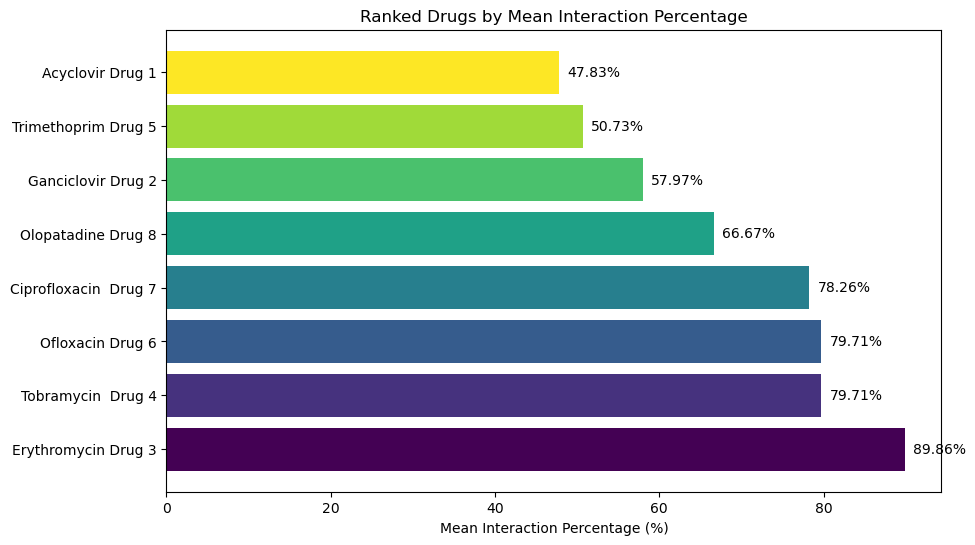


Ranked Drugs (based on mean interaction percentage):
1. Erythromycin Drug 3: 89.86%
2. Tobramycin  Drug 4: 79.71%
3. Ofloxacin Drug 6: 79.71%
4. Ciprofloxacin  Drug 7: 78.26%
5. Olopatadine Drug 8: 66.67%
6. Ganciclovir Drug 2: 57.97%
7. Trimethoprim Drug 5: 50.73%
8. Acyclovir Drug 1: 47.83%


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Interaction percentages for each drug in each sequence
interaction_data = {
    "Acyclovir Drug 1": [43.48, 52.17, 47.83],
    "Ganciclovir Drug 2": [52.17, 73.91, 47.83],
    "Erythromycin Drug 3": [86.96, 100.00, 82.61],
    "Tobramycin  Drug 4": [78.26, 78.26, 82.61],
    "Trimethoprim Drug 5": [47.83, 47.83, 56.52],
    "Ofloxacin Drug 6": [73.91, 95.65, 69.57],
    "Ciprofloxacin  Drug 7": [73.91, 100.00, 60.87],
    "Olopatadine Drug 8": [65.22, 60.87, 73.91]
}

# Function to calculate mean interaction percentage for each drug
def calculate_mean_percentage(data):
    mean_percentages = {}
    for drug, percentages in data.items():
        mean_percentages[drug] = np.mean(percentages)
    return mean_percentages

# Function to sort drugs based on their mean interaction percentages
def rank_drugs(mean_percentages):
    # Sort the drugs by mean interaction percentage in descending order
    ranked_drugs = sorted(mean_percentages.items(), key=lambda x: x[1], reverse=True)
    return ranked_drugs

# Calculate mean interaction percentages
mean_percentages = calculate_mean_percentage(interaction_data)

# Rank drugs based on mean interaction percentages
ranked_drugs = rank_drugs(mean_percentages)

# Plotting the ranked drugs with color
fig, ax = plt.subplots(figsize=(10, 6))
drug_names = [drug for drug, _ in ranked_drugs]
mean_values = [mean for _, mean in ranked_drugs]

# Use a colormap to color the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(ranked_drugs)))

ax.barh(drug_names, mean_values, color=colors)
ax.set_xlabel('Mean Interaction Percentage (%)')
ax.set_title('Ranked Drugs by Mean Interaction Percentage')

# Display the mean interaction percentage on each bar
for i, v in enumerate(mean_values):
    ax.text(v + 1, i, f'{v:.2f}%', va='center', color='black')

plt.show()

# Display the results in text with color-coded output for drug names
print("\nRanked Drugs (based on mean interaction percentage):")
for rank, (drug, mean) in enumerate(ranked_drugs, 1):
    # Color coding drug names based on mean percentage
    if mean >= 80:
        print(f"\033[38;5;10m{rank}. {drug}: {mean:.2f}%\033[39m")  # Green
    elif mean >= 60:
        print(f"\033[38;5;214m{rank}. {drug}: {mean:.2f}%\033[39m")  # Orange
    else:
        print(f"\033[38;5;196m{rank}. {drug}: {mean:.2f}%\033[39m")  # Red
